In [1]:
import numpy as np
import pandas as pd 
import dateutil
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


from sklearn.linear_model import LinearRegression
import datetime as dt

In [2]:
# WHO data
def import_dataWHO(index = 'Tunisia'):
    #importing global data
    url="https://covid19.who.int/WHO-COVID-19-global-data.csv"
    data = pd.read_csv(url, error_bad_lines=False)
   

    
    who_tn_data=data.loc[data.Country==index]
    who_tn_data.drop(["Country","Country_code","WHO_region"],axis=1,inplace=True)
    
    who_tn_data.Date_reported=pd.to_datetime(who_tn_data.Date_reported)    
    who_tn_data.rename(columns={"Date_reported":"date"},inplace=True)

    who_tn_data.set_index("date",inplace=True,drop=True)
    who_tn_data=who_tn_data.reindex(dti)
    
    return who_tn_data

In [3]:
#moyenne mouvente sur 7 jours
from astropy.convolution import convolve, Box1DKernel

def dataFit(data, N=6,m=6):
    #tn['fittedNewCases1']=tn.New_cases.rolling(window=4).mean()
    ddata=data 
    for i in np.arange(m):
        smooth_dataNewCase1=convolve(ddata,kernel=Box1DKernel(N), boundary='extend')
        ddata=smooth_dataNewCase1
    

    fig, ax = plt.subplots(figsize=(15,7))
    plt.plot(data)
    plt.plot(ddata, color='red', label='fitted data')
    #plt.plot(np.arange(len(ddata)),pd.DataFrame.rolling(tn.newCase[:todayDate],7).mean(),color='green')
    plt.plot(ddata,label='raw data')
    plt.ylabel('New cases')
    ax.legend()
    return ddata


In [4]:
PopNumber=1e5/11818619
# Début et fin de l'étude 

#today=dt.datetime.today().strftime('%Y-%m-%d')

todayDate=dt.datetime.today()-pd.Timedelta(1, unit='d') # les donnees ont tj un jour de retard 
beginDate=pd.to_datetime('2020-1-1')
endDate=pd.to_datetime('2022-7-1')
#typ="IntensiteConf"

dti = pd.date_range(start=beginDate, end=endDate, freq='D')



# Case and death database

In [5]:
tn= import_dataWHO('Tunisia')
tn.head()


C:\Users\amrou\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\amrou\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\amrou\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
2020-01-01        NaN               NaN         NaN                NaN
2020-01-02        NaN               NaN         NaN                NaN
2020-01-03        0.0               0.0         0.0                0.0
2020-01-04        0.0               0.0         0.0                0.0
2020-01-05        0.0               0.0         0.0                0.0

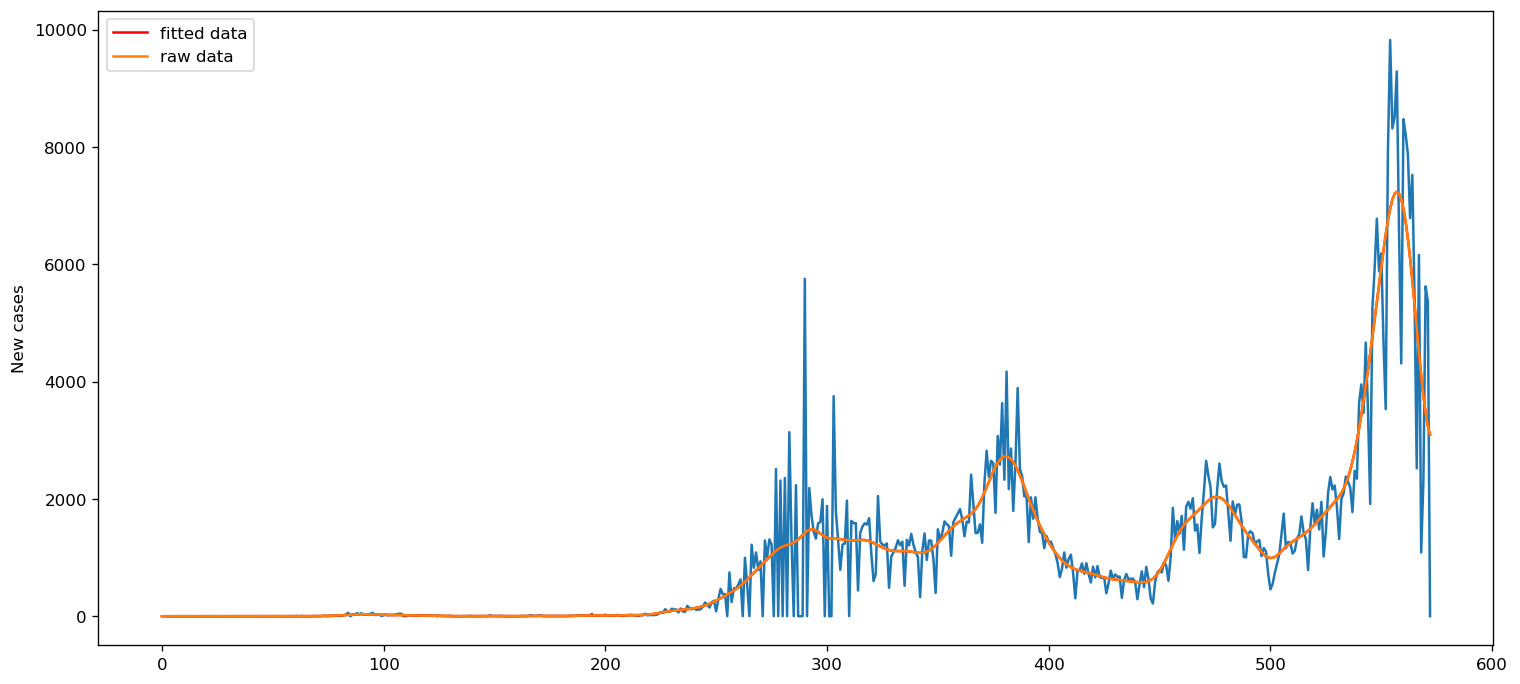

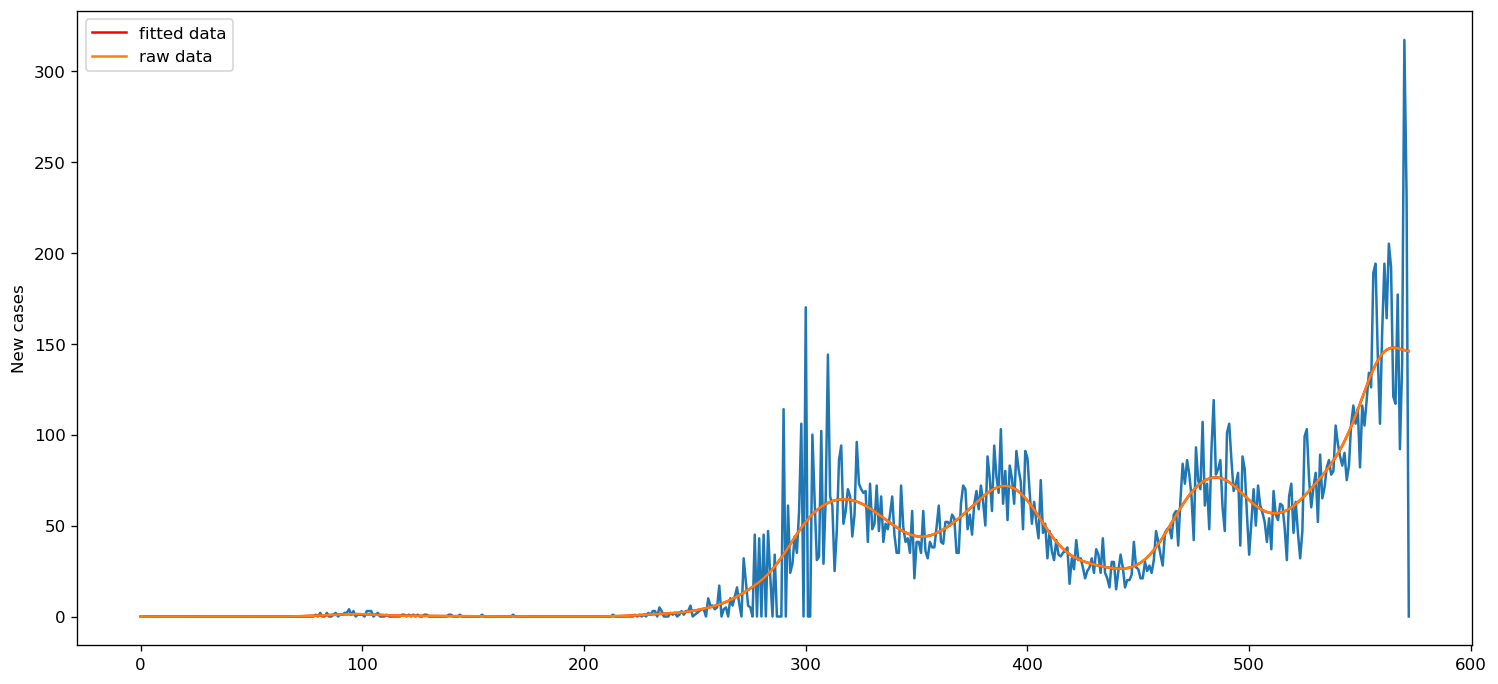

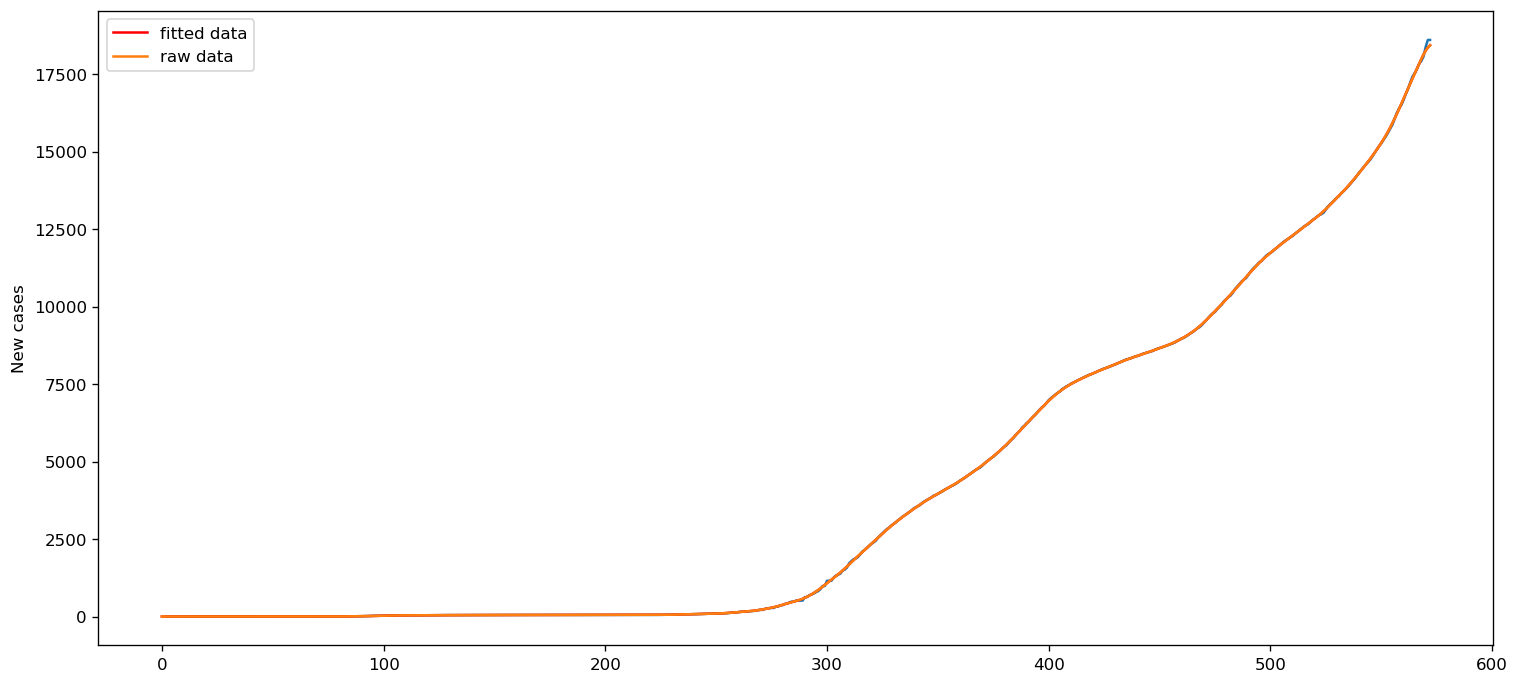

In [6]:
nday=len(tn[:todayDate])
smooth_dataNewCase=dataFit(np.array(tn.New_cases[:nday]), N=6,m=6)
smooth_dataNewDeath=dataFit(np.array(tn.New_deaths[:nday]), N=6,m=20)
smooth_dataDeath=dataFit(np.array(tn.Cumulative_deaths[:nday]), N=6,m=2)
tn['fittedNewCasesSMA']=np.append(smooth_dataNewCase ,np.nan*np.ones(len(tn)-nday))
tn['fittedNewDeathSMA']=np.append(smooth_dataNewDeath ,np.nan*np.ones(len(tn)-nday))
tn['fittedDeathSMA']=np.append(smooth_dataDeath ,np.nan*np.ones(len(tn)-nday))


# Bed occupancy database

In [7]:
ddf = pd.read_excel("C:\\Users\\amrou\\Downloads\\stage\\hopit_clin.xlsx", 'Hopitaux')


In [8]:
ddf

Date        Gov  \
0      01-01-2021      Tunis   
1      01-01-2021      Tunis   
2      01-01-2021      Tunis   
3      01-01-2021      Tunis   
4      01-01-2021      Tunis   
...           ...        ...   
32479  31-05-2021   Medenine   
32480  31-05-2021   Medenine   
32481  31-05-2021  Tataouine   
32482  31-05-2021  Tataouine   
32483  31-05-2021  Tataouine   

                                                  Struct  INDEX  lits_rea  \
0                                  HÔPITAL HABIB THAMEUR    HU6        12   
1                                                    HCN  HC108        13   
2                                               LA RABTA   HU16        12   
3                                     HÔPITAL MONGI SLIM    HU9        12   
4      HÔPITAL MILITAIRE PRINCIPALE D'INSTRUCTION DE ...    HM1        17   
...                                                  ...    ...       ...   
32479                                 HR DE BEN GUERDANE    HR7         0   
32480                                    HC BANI KHEDACH    HC7         0   
32481                                    HR DE TATAOUINE   HR17         4   
32482                                      HC GHOMRASSEN   HC41         0   
32483                                          HC REMADA   HC85         0   

       lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  lits_o2_disp  z_tamp  
0                12              0       27           19             8       0  
1                13              0       64           47            17       0  
2                12              0      105           24            81       7  
3                12              0       26           26             0       0  
4                17              0       50           33            17       8  
...             ...            ...      ...          ...           ...     ...  
32479             0              0        6            6             0       0  
32480             0              0        2            0             2       2  
32481             3              1       14            4            10       0  
32482             0              0        6            0             6       0  
32483             0              0        4            0             4       0  

[32484 rows x 11 columns]

In [9]:
np.where(pd.isnull(ddf))

(array([11146, 12280, 13414, 14548, 15682, 16816, 17950, 19084, 20218,
        21352, 22486], dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))

In [10]:
ddf[ddf.index.duplicated()]

Empty DataFrame
Columns: [Date, Gov, Struct, INDEX, lits_rea, lits_rea_occ, lits_rea_disp, lits_o2, lits_o2_occ, lits_o2_disp, z_tamp]
Index: []

In [11]:
ddf['Date'] = ddf['Date'].apply(dateutil.parser.parse, dayfirst=True)
ddf.rename(columns={"Date":"date"},inplace=True)

    
ddf['Gov'] = ddf['Gov'].astype('category')
ddf['Struct'] = ddf['Struct'].astype('category')

In [12]:
ddf.head()

date    Gov                                             Struct  INDEX  \
0 2021-01-01  Tunis                              HÔPITAL HABIB THAMEUR    HU6   
1 2021-01-01  Tunis                                                HCN  HC108   
2 2021-01-01  Tunis                                           LA RABTA   HU16   
3 2021-01-01  Tunis                                 HÔPITAL MONGI SLIM    HU9   
4 2021-01-01  Tunis  HÔPITAL MILITAIRE PRINCIPALE D'INSTRUCTION DE ...    HM1   

   lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  lits_o2_disp  \
0        12            12              0       27           19             8   
1        13            13              0       64           47            17   
2        12            12              0      105           24            81   
3        12            12              0       26           26             0   
4        17            17              0       50           33            17   

   z_tamp  
0       0  
1       0  
2       7  
3       0  
4       8

In [13]:
ddf['Struct'].unique()

['HÔPITAL HABIB THAMEUR', 'HCN', 'LA RABTA', 'HÔPITAL MONGI SLIM', 'HÔPITAL MILITAIRE PRINCIPALE D'INSTRUCTION DE..., ..., 'HÔPITAL AZIZA OTHMANA', 'HC BIR MCHARGA', 'HC SAOUAF', 'HC SKHIRA', 'CENTRE NATIONAL DE GREFFE DE MOELLE OSSEUSE']
Length: 171
Categories (171, object): ['HÔPITAL HABIB THAMEUR', 'HCN', 'LA RABTA', 'HÔPITAL MONGI SLIM', ..., 'HC BIR MCHARGA', 'HC SAOUAF', 'HC SKHIRA', 'CENTRE NATIONAL DE GREFFE DE MOELLE OSSEUSE']

In [14]:
ddf['Gov'].unique()

['Tunis', 'Manouba', 'Ariana', 'Ben Arous', 'Zaghouan', ..., 'Tozeur', 'Kebili', 'Gabes', 'Medenine', 'Tataouine']
Length: 24
Categories (24, object): ['Tunis', 'Manouba', 'Ariana', 'Ben Arous', ..., 'Kebili', 'Gabes', 'Medenine', 'Tataouine']

In [15]:
ddf.describe()

lits_rea  lits_rea_occ  lits_rea_disp       lits_o2   lits_o2_occ  \
count  32484.000000  32484.000000   32484.000000  32484.000000  32484.000000   
mean       2.307444      1.883758       0.423686     13.719092      7.799440   
std        5.601665      4.922110       1.504949     22.248687     16.980004   
min        0.000000      0.000000     -12.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      2.000000      0.000000   
50%        0.000000      0.000000       0.000000      6.000000      2.000000   
75%        0.000000      0.000000       0.000000     13.000000      7.000000   
max       63.000000     60.000000      20.000000    200.000000    191.000000   

       lits_o2_disp        z_tamp  
count  32484.000000  32484.000000  
mean       5.919468      0.906046  
std       10.127466      3.221302  
min      -54.000000      0.000000  
25%        0.000000      0.000000  
50%        3.000000      0.000000  
75%        7.000000      0.000000  
max      116.000000     50.000000

### Database Regionale 

In [16]:
df_Reg = pd.DataFrame(ddf.groupby(['date','Gov']).sum())

df_Reg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4824 entries, (Timestamp('2021-01-01 00:00:00'), 'Ariana') to (Timestamp('2021-07-20 00:00:00'), 'Zaghouan')
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lits_rea       4809 non-null   float64
 1   lits_rea_occ   4809 non-null   float64
 2   lits_rea_disp  4809 non-null   float64
 3   lits_o2        4809 non-null   float64
 4   lits_o2_occ    4809 non-null   float64
 5   lits_o2_disp   4809 non-null   float64
 6   z_tamp         4809 non-null   float64
dtypes: float64(7)
memory usage: 291.1 KB


In [17]:
df_Reg.index[2][1]

'Bizerte'

In [18]:
df_Reg.index

MultiIndex([('2021-01-01',      'Ariana'),
            ('2021-01-01',   'Ben Arous'),
            ('2021-01-01',     'Bizerte'),
            ('2021-01-01',        'Béja'),
            ('2021-01-01',       'Gabes'),
            ('2021-01-01',       'Gafsa'),
            ('2021-01-01',    'Jendouba'),
            ('2021-01-01',    'Kairouan'),
            ('2021-01-01',   'Kasserine'),
            ('2021-01-01',      'Kebili'),
            ...
            ('2021-07-20',    'Monastir'),
            ('2021-07-20',      'Nabeul'),
            ('2021-07-20',        'Sfax'),
            ('2021-07-20', 'Sidi Bouzid'),
            ('2021-07-20',     'Siliana'),
            ('2021-07-20',      'Sousse'),
            ('2021-07-20',   'Tataouine'),
            ('2021-07-20',      'Tozeur'),
            ('2021-07-20',       'Tunis'),
            ('2021-07-20',    'Zaghouan')],
           names=['date', 'Gov'], length=4824)

### Database nationale 

In [19]:
df_Nat = pd.DataFrame(df_Reg.groupby(['date']).sum())
#df_Nat.set_index('date', inplace=True,drop=True)
df_Nat=df_Nat.reindex(dti)
df_Nat.head()

lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  \
2020-01-01       NaN           NaN            NaN      NaN          NaN   
2020-01-02       NaN           NaN            NaN      NaN          NaN   
2020-01-03       NaN           NaN            NaN      NaN          NaN   
2020-01-04       NaN           NaN            NaN      NaN          NaN   
2020-01-05       NaN           NaN            NaN      NaN          NaN   

            lits_o2_disp  z_tamp  
2020-01-01           NaN     NaN  
2020-01-02           NaN     NaN  
2020-01-03           NaN     NaN  
2020-01-04           NaN     NaN  
2020-01-05           NaN     NaN

In [20]:
df_Nat.describe()

lits_rea  lits_rea_occ  lits_rea_disp      lits_o2  lits_o2_occ  \
count  201.000000    201.000000     201.000000   201.000000   201.000000   
mean   372.910448    304.437811      68.472637  2217.169154  1260.482587   
std     69.906737     84.911821      29.477457   330.302212   575.079291   
min    285.000000    195.000000      15.000000  1885.000000   565.000000   
25%    317.000000    233.000000      43.000000  1991.000000   849.000000   
50%    332.000000    291.000000      62.000000  2050.000000  1192.000000   
75%    408.000000    347.000000      95.000000  2303.000000  1518.000000   
max    544.000000    522.000000     129.000000  3355.000000  3028.000000   

       lits_o2_disp      z_tamp  
count    201.000000  201.000000  
mean     956.656716  146.427861  
std      291.855815   85.084523  
min      235.000000   44.000000  
25%      762.000000   94.000000  
50%      942.000000  137.000000  
75%     1169.000000  169.000000  
max     1429.000000  421.000000

# Country level analysis

### Time analysis

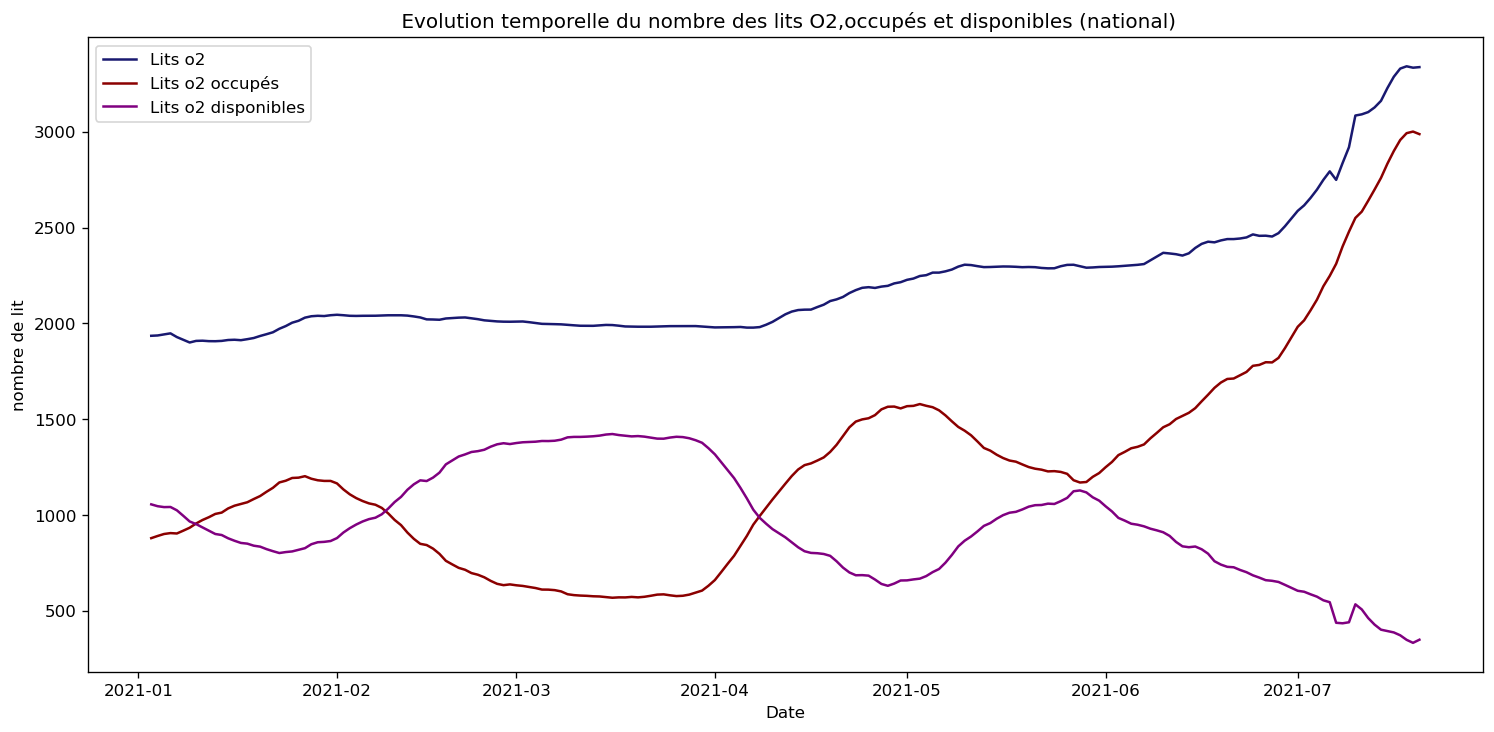

In [21]:
a=df_Nat
fig, ax = plt.subplots(figsize=(15,7))
n=3
plt.plot(a.index,a.lits_o2.rolling(n).mean(), color="midnightblue", label="Lits o2 ")
plt.plot(a.index,a.lits_o2_occ.rolling(n).mean(), color="darkred", label="Lits o2 occupés")
plt.plot(a.index,a.lits_o2_disp.rolling(n).mean(), color="purple", label="Lits o2 disponibles")


plt.title(" Evolution temporelle du nombre des lits O2,occupés et disponibles (national)")
ax.set_xlabel("Date")
ax.set_ylabel("nombre de lit")
plt.legend()
plt.show()
#ax.figure.savefig('o2_national.png')

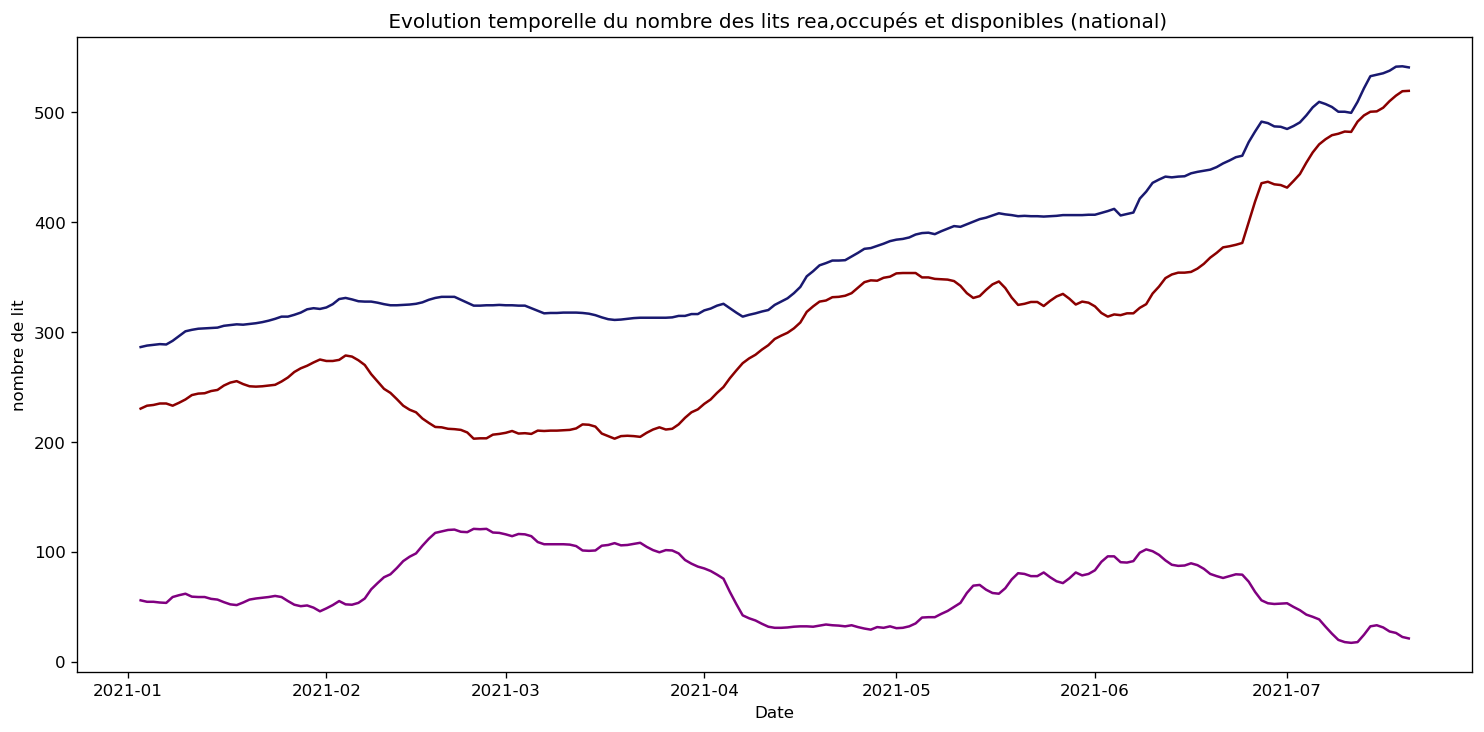

No handles with labels found to put in legend.


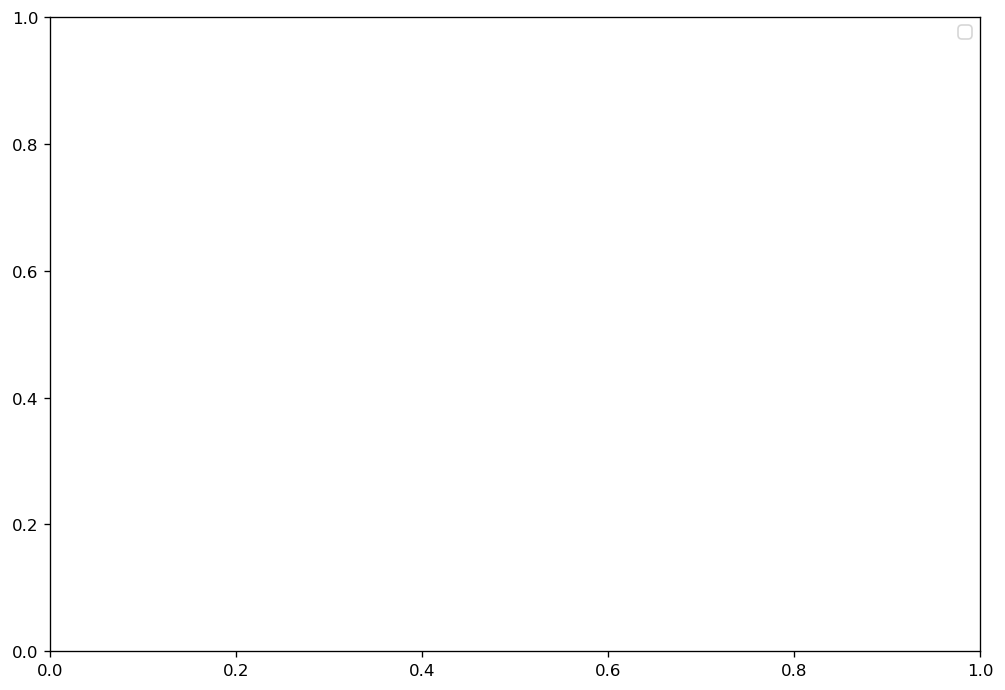

In [22]:
a=df_Nat
fig, ax = plt.subplots(figsize=(15,7))
n=3
plt.plot(a.index,a.lits_rea.rolling(n).mean(), color="midnightblue", label="Lits réa  ")
plt.plot(a.index,a.lits_rea_occ.rolling(n).mean(), color="darkred", label="Lits réa occupés")
plt.plot(a.index,a.lits_rea_disp.rolling(n).mean(), color="purple", label="Lits réa disponibles")


plt.title(" Evolution temporelle du nombre des lits rea,occupés et disponibles (national)")
ax.set_xlabel("Date")
ax.set_ylabel("nombre de lit")
plt.show()
plt.legend()
ax.figure.savefig('rea_national.png')

### Correlation analysis between bed types 

In [23]:
df_4=df_Nat.drop("z_tamp", axis=1)

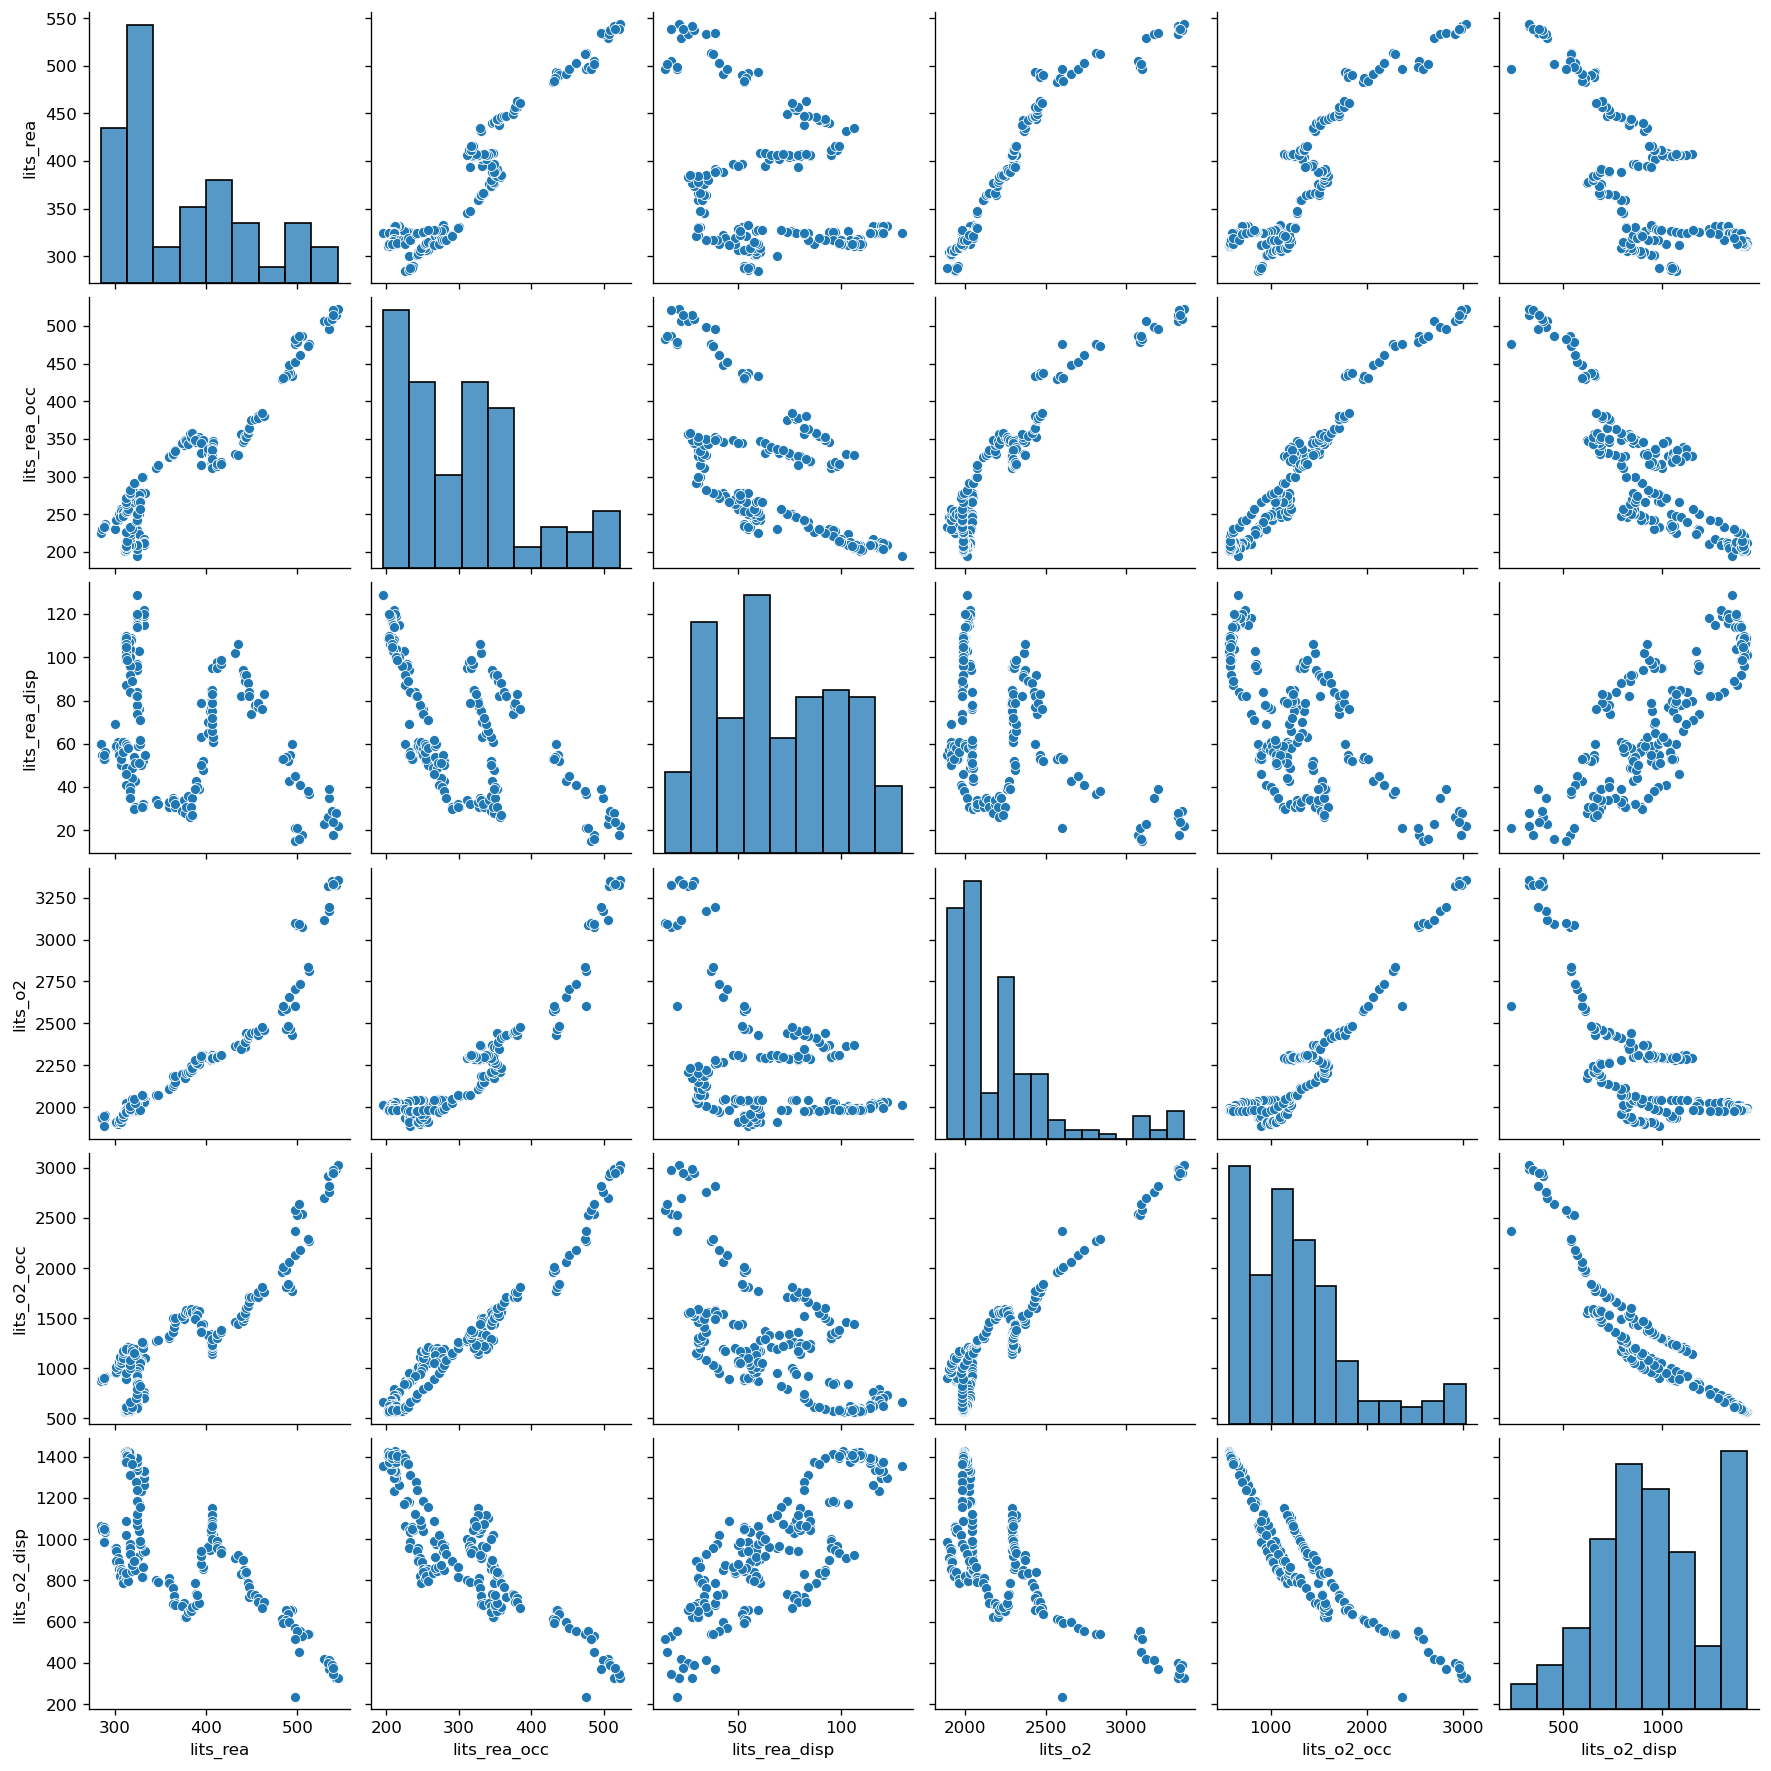

In [24]:
sns.pairplot(df_4, kind="scatter")
plt.show()

In [25]:
df_4

lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  \
2020-01-01       NaN           NaN            NaN      NaN          NaN   
2020-01-02       NaN           NaN            NaN      NaN          NaN   
2020-01-03       NaN           NaN            NaN      NaN          NaN   
2020-01-04       NaN           NaN            NaN      NaN          NaN   
2020-01-05       NaN           NaN            NaN      NaN          NaN   
...              ...           ...            ...      ...          ...   
2022-06-27       NaN           NaN            NaN      NaN          NaN   
2022-06-28       NaN           NaN            NaN      NaN          NaN   
2022-06-29       NaN           NaN            NaN      NaN          NaN   
2022-06-30       NaN           NaN            NaN      NaN          NaN   
2022-07-01       NaN           NaN            NaN      NaN          NaN   

            lits_o2_disp  
2020-01-01           NaN  
2020-01-02           NaN  
2020-01-03           NaN  
2020-01-04           NaN  
2020-01-05           NaN  
...                  ...  
2022-06-27           NaN  
2022-06-28           NaN  
2022-06-29           NaN  
2022-06-30           NaN  
2022-07-01           NaN  

[913 rows x 6 columns]

In [26]:
df_melt = pd.melt(df_4.reset_index(), id_vars=['index'], value_vars=['lits_rea', 'lits_rea_occ', 'lits_rea_disp','lits_o2', 'lits_o2_occ','lits_o2_disp'])
df_melt.columns = ['index', 'type_lits', 'nombre'] 

In [27]:
df_melt

index     type_lits  nombre
0    2020-01-01      lits_rea     NaN
1    2020-01-02      lits_rea     NaN
2    2020-01-03      lits_rea     NaN
3    2020-01-04      lits_rea     NaN
4    2020-01-05      lits_rea     NaN
...         ...           ...     ...
5473 2022-06-27  lits_o2_disp     NaN
5474 2022-06-28  lits_o2_disp     NaN
5475 2022-06-29  lits_o2_disp     NaN
5476 2022-06-30  lits_o2_disp     NaN
5477 2022-07-01  lits_o2_disp     NaN

[5478 rows x 3 columns]

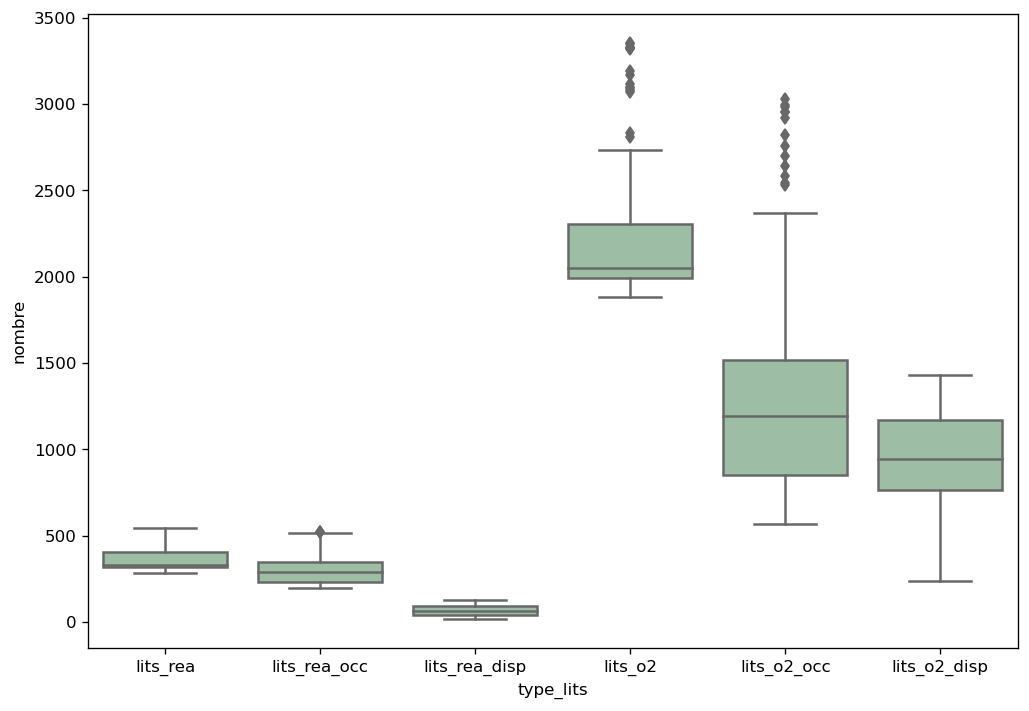

In [28]:
# generate a boxplot to see the data distribution by bed type. Using boxplot, we can 
# easily detect the differences between different variables
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='type_lits', y='nombre', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="type_lits", y="nombre", data=df_melt, color='#7d0013')
plt.show()

In [29]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_4['lits_rea'], df_4['lits_rea_occ'], df_4['lits_rea_disp'], df_4['lits_o2'], df_4['lits_o2_occ'], df_4['lits_o2_disp'])
print(fvalue, pvalue)

nan nan


In [30]:
#La valeur p obtenue à partir de l'analyse ANOVA est significative (p < 0,05),
#et par conséquent, nous concluons qu'il existe des différences significatives entre les differents variables.


In [31]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='nombre', anova_model='nombre ~ C(type_lits)')
res.anova_summary

df        sum_sq       mean_sq            F  PR(>F)
C(type_lits)     5.0  6.399821e+08  1.279964e+08  1427.571664     0.0
Residual      1200.0  1.075923e+08  8.966024e+04          NaN     NaN

In [32]:
#we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test

from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='nombre', xfac_var='type_lits', anova_model='nombre ~ C(type_lits)')
res.tukey_summary

C:\Users\amrou\Anaconda3\lib\site-packages\bioinfokit\analys.py:363: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1         group2         Diff        Lower        Upper  \
0        lits_rea   lits_rea_occ    68.472637   -16.781575   153.726849   
1        lits_rea  lits_rea_disp   304.437811   219.183599   389.692023   
2        lits_rea        lits_o2  1844.258706  1759.004494  1929.512919   
3        lits_rea    lits_o2_occ   887.572139   802.317927   972.826351   
4        lits_rea   lits_o2_disp   583.746269   498.492057   669.000481   
5    lits_rea_occ  lits_rea_disp   235.965174   150.710962   321.219386   
6    lits_rea_occ        lits_o2  1912.731343  1827.477131  1997.985555   
7    lits_rea_occ    lits_o2_occ   956.044776   870.790564  1041.298988   
8    lits_rea_occ   lits_o2_disp   652.218905   566.964693   737.473118   
9   lits_rea_disp        lits_o2  2148.696517  2063.442305  2233.950730   
10  lits_rea_disp    lits_o2_occ  1192.009950  1106.755738  1277.264162   
11  lits_rea_disp   lits_o2_disp   888.184080   802.929867   973.438292   
12        lits_o2    lits_o2_occ   956.686567   871.432355  1041.940779   
13        lits_o2   lits_o2_disp  1260.512438  1175.258226  1345.766650   
14    lits_o2_occ   lits_o2_disp   303.825871   218.571658   389.080083   

       q-value   p-value  
0     3.242016  0.197735  
1    14.414403  0.001000  
2    87.321245  0.001000  
3    42.024421  0.001000  
4    27.638992  0.001000  
5    11.172387  0.001000  
6    90.563261  0.001000  
7    45.266437  0.001000  
8    30.881007  0.001000  
9   101.735648  0.001000  
10   56.438824  0.001000  
11   42.053395  0.001000  
12   45.296824  0.001000  
13   59.682253  0.001000  
14   14.385429  0.001000

In [33]:
#Les résultats ci-dessus du HSD de Tukey suggèrent qu'à l'exception de lits_rea-lits_rea_occ,
#toutes les autres comparaisons par paires pour les variabls rejettent l'hypothèse nulle (p < 0,05) 
#et indiquent des différences statistiquement significatives.


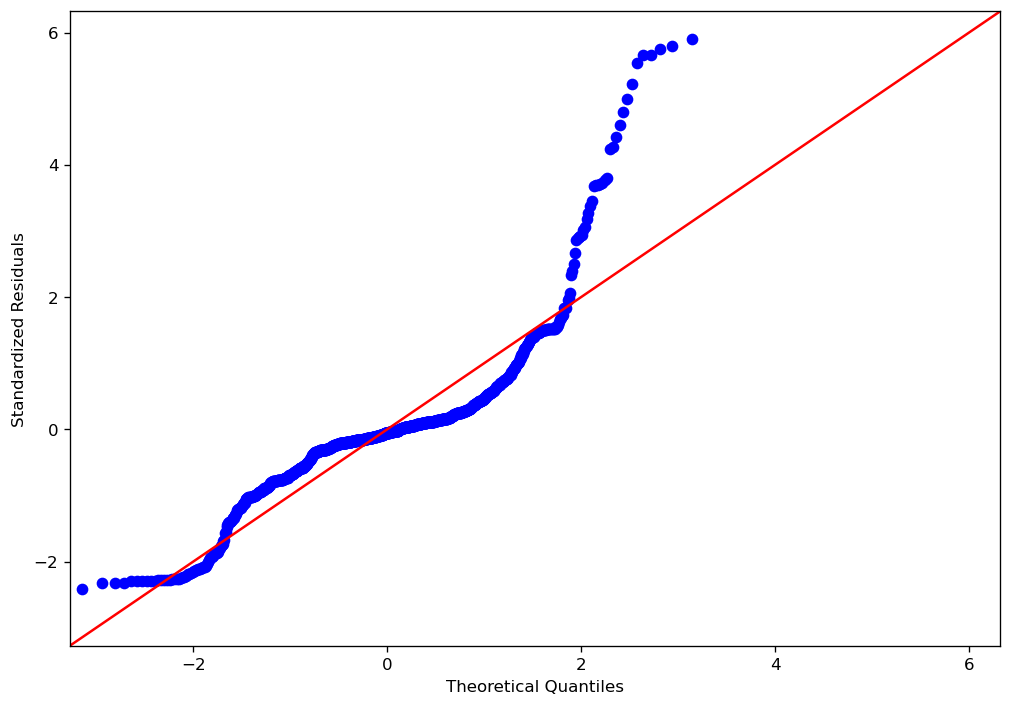

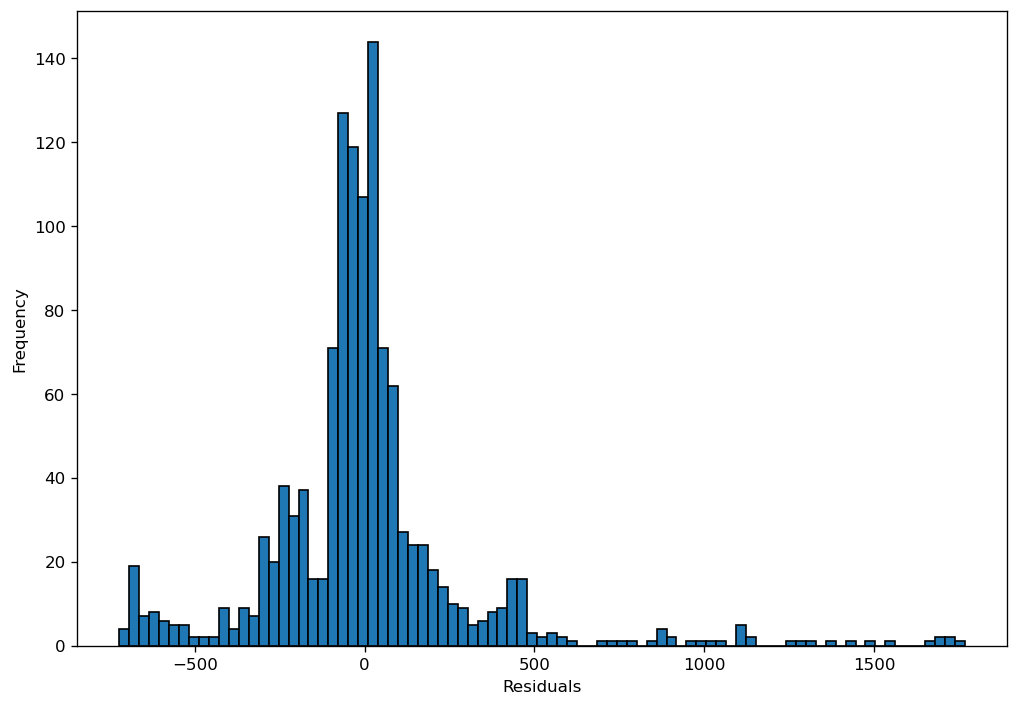

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [35]:
#Comme les Standardized Residuals se situent autour de la ligne des 45 degrés, cela suggère que les résidus sont approximativement normalement distribués
#Dans l'histogramme, la distribution semble approximativement normale et suggère que les résidus sont approximativement normalement distribués


In [36]:
df_corr=df_4.corr(method='pearson')
df_corr

lits_rea  lits_rea_occ  lits_rea_disp   lits_o2  lits_o2_occ  \
lits_rea       1.000000      0.945773      -0.352833  0.942329     0.901089   
lits_rea_occ   0.945773      1.000000      -0.637636  0.924468     0.972681   
lits_rea_disp -0.352833     -0.637636       1.000000 -0.428231    -0.664911   
lits_o2        0.942329      0.924468      -0.428231  1.000000     0.933453   
lits_o2_occ    0.901089      0.972681      -0.664911  0.933453     1.000000   
lits_o2_disp  -0.709025     -0.870290       0.825453 -0.707525    -0.913930   

               lits_o2_disp  
lits_rea          -0.709025  
lits_rea_occ      -0.870290  
lits_rea_disp      0.825453  
lits_o2           -0.707525  
lits_o2_occ       -0.913930  
lits_o2_disp       1.000000

In [37]:
df_4['lits_rea'].dropna
#df_4['lits_rea_occ'].dropna
#mean = df_4.groupby("lits_rea").mean()
#sd = df_4.groupby("lits_rea").std()

<bound method Series.dropna of 2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
              ..
2022-06-27   NaN
2022-06-28   NaN
2022-06-29   NaN
2022-06-30   NaN
2022-07-01   NaN
Freq: D, Name: lits_rea, Length: 913, dtype: float64>

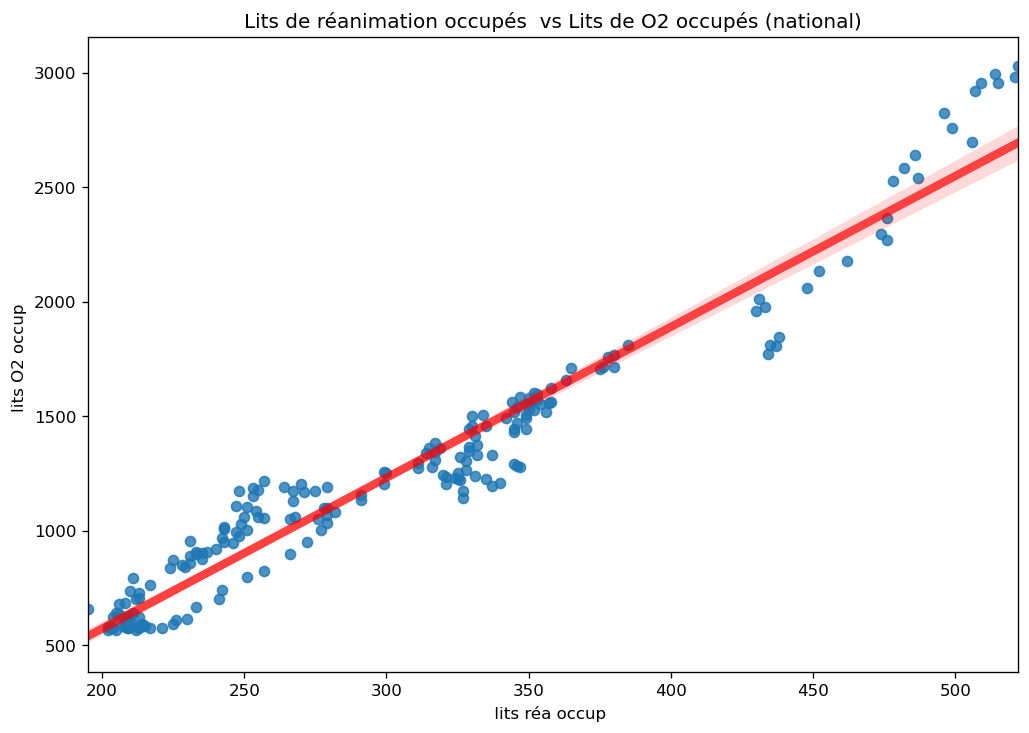

In [38]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_rea_occ',y='lits_o2_occ',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits réa occup  ')
plt.ylabel('lits O2 occup ')
plt.title('Lits de réanimation occupés  vs Lits de O2 occupés (national)')

s.figure.savefig('reded_vs_reo_o2.png') 

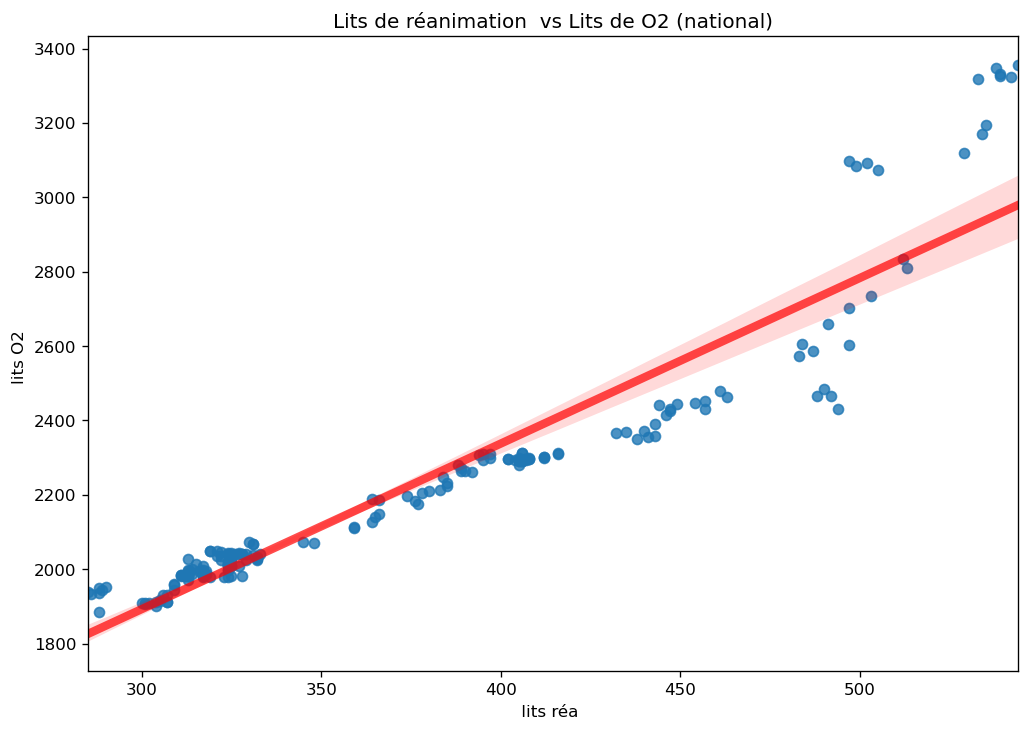

In [39]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_rea',y='lits_o2',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits réa  ')
plt.ylabel('lits O2 ')
plt.title('Lits de réanimation  vs Lits de O2 (national)')

s.figure.savefig('reded_vs_reo_o2.png') 

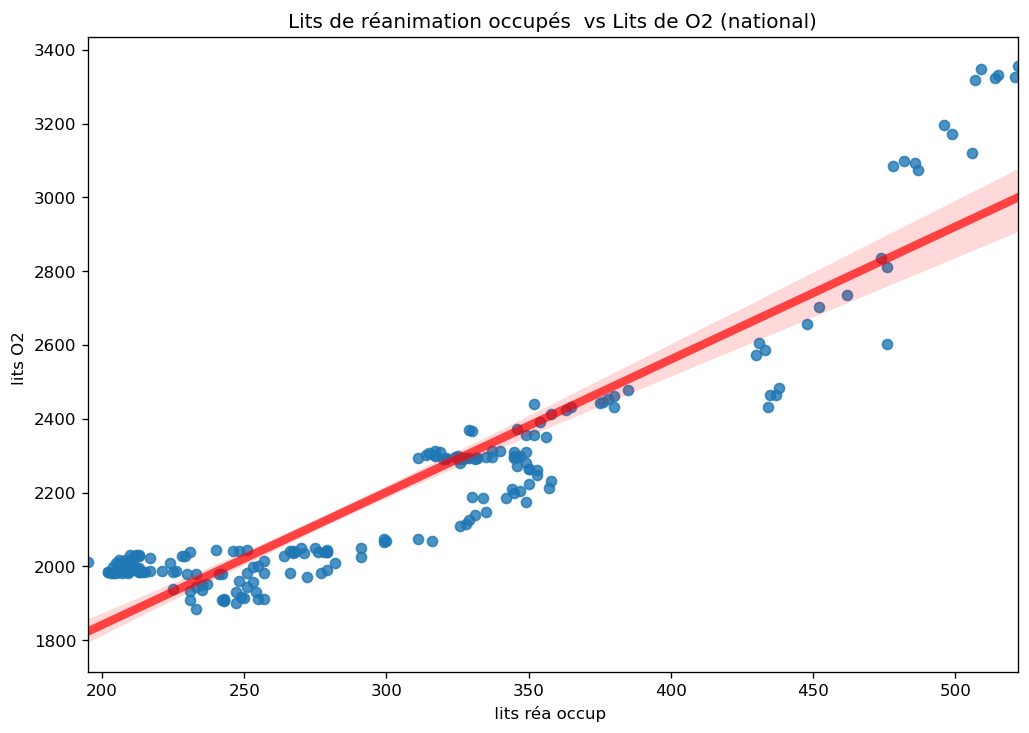

In [40]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_rea_occ',y='lits_o2',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits réa occup  ')
plt.ylabel('lits O2 ')
plt.title('Lits de réanimation occupés  vs Lits de O2 (national)')

s.figure.savefig('redocc_vs_reo_o2.png') 

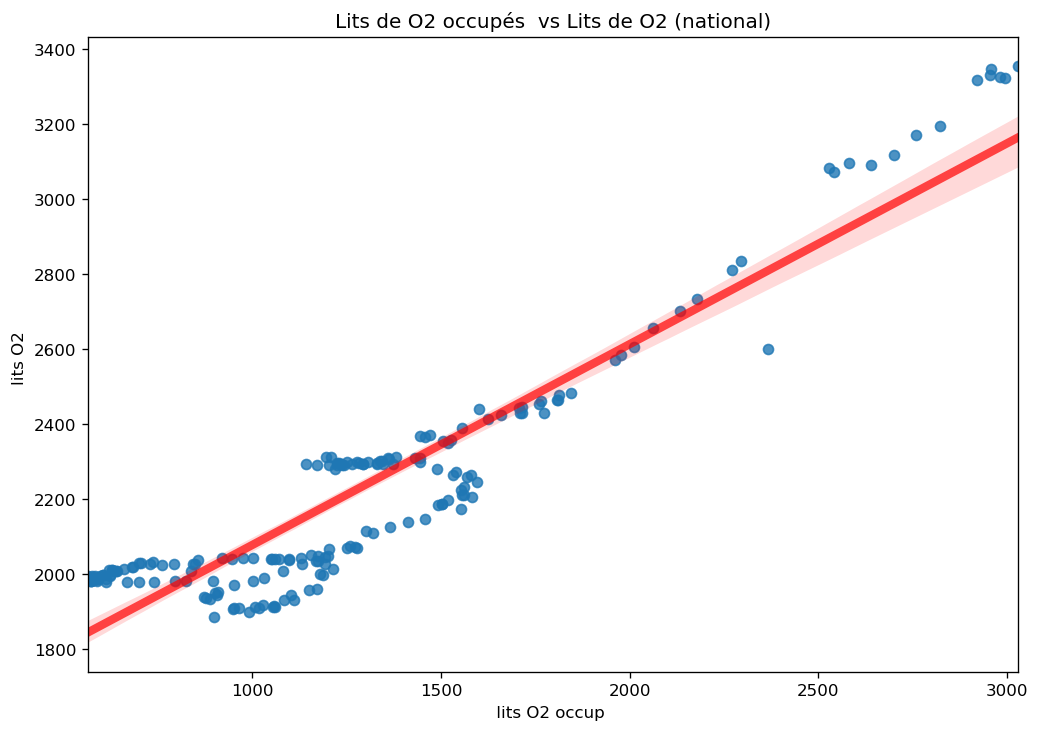

In [41]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_o2_occ',y='lits_o2',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits O2 occup  ')
plt.ylabel('lits O2 ')
plt.title('Lits de O2 occupés  vs Lits de O2 (national)')

s.figure.savefig('reo2_occvs_reo_o2.png') 

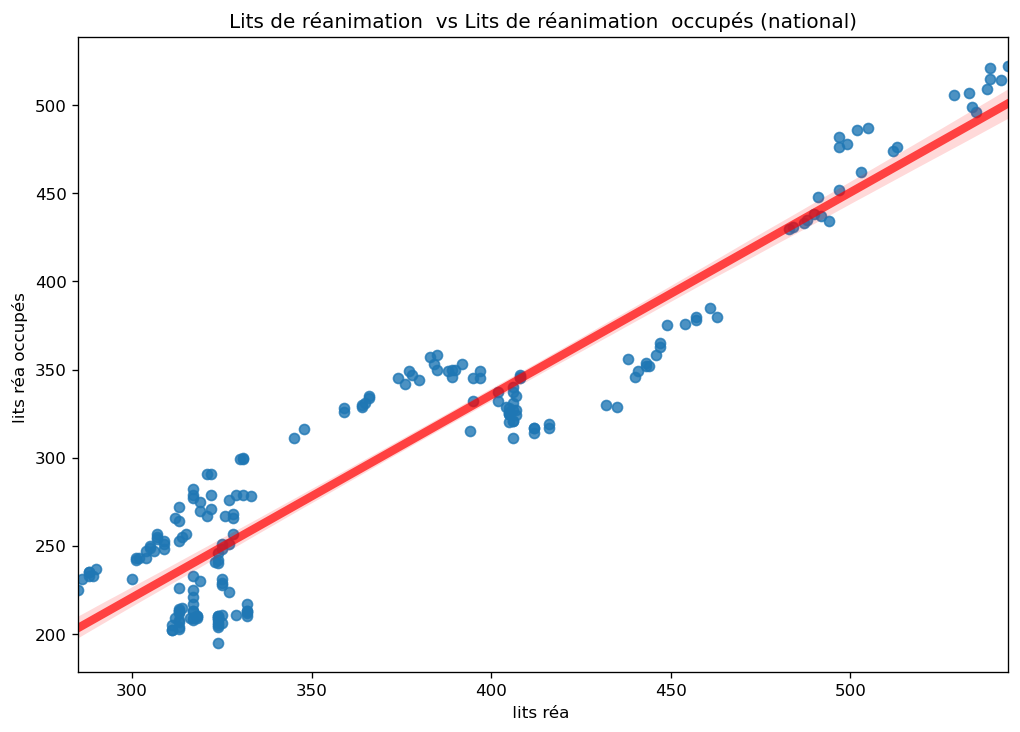

In [42]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_rea',y='lits_rea_occ',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits réa  ')
plt.ylabel('lits réa occupés ')
plt.title('Lits de réanimation  vs Lits de réanimation  occupés (national)')

s.figure.savefig('reded_vs_reo_cc.png') 

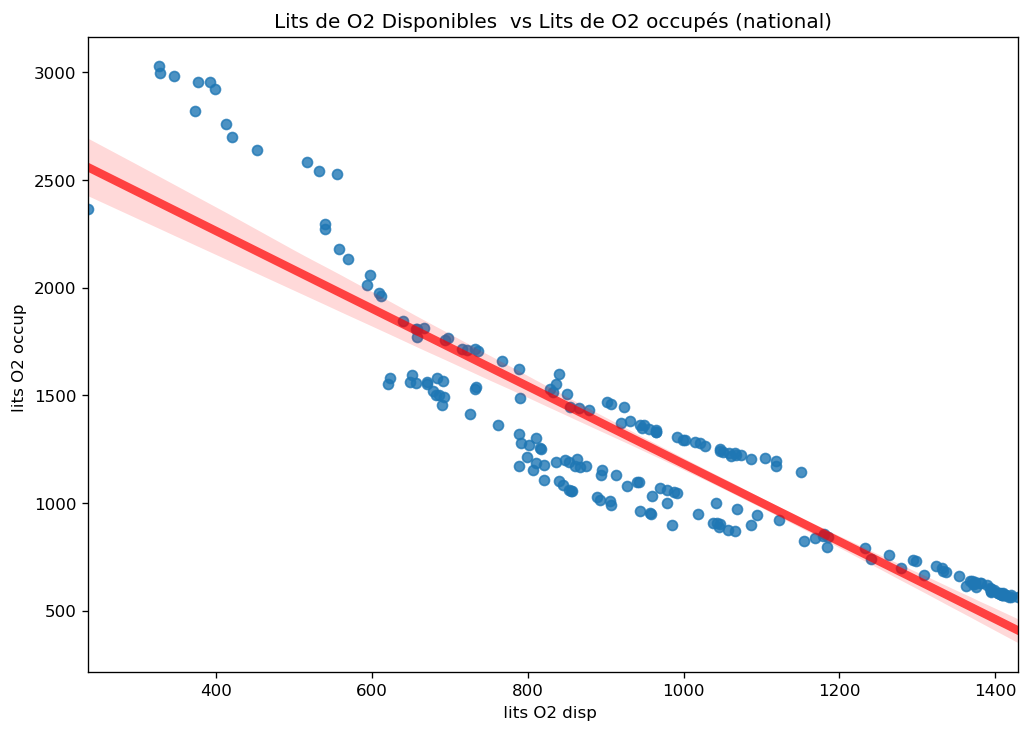

In [43]:
# Regression
sns.set_style(style=None, rc=None )
s=sns.regplot(x='lits_o2_disp',y='lits_o2_occ',data=df_Nat,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel(' lits O2 disp  ')
plt.ylabel('lits O2 occup ')
plt.title('Lits de O2 Disponibles  vs Lits de O2 occupés (national)')

s.figure.savefig('redo2isp_vs_reocc_o2.png') 

### Death-bed analysis

In [44]:
ttn=pd.concat([tn,df_Nat],axis=1)
ttn.head()

w=pd.date_range(start=ddf.date.min(), end=ddf.date.max(), freq='D')
a=ttn.loc[w]

No handles with labels found to put in legend.


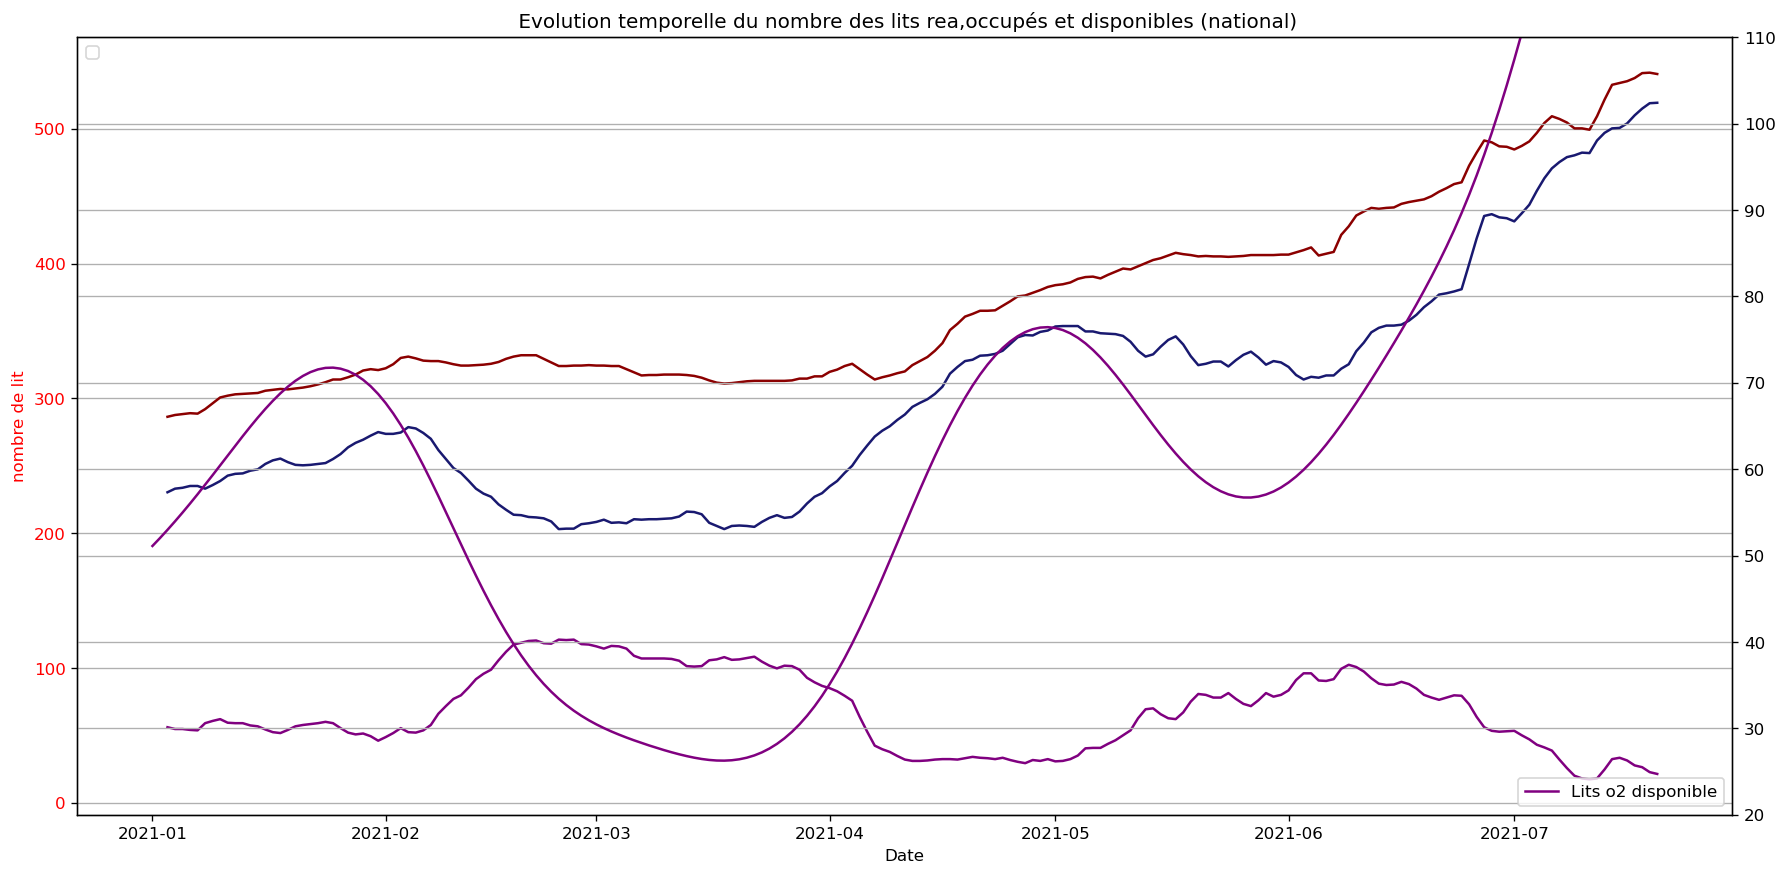

In [45]:

fig, ax1 = plt.subplots(figsize=(15,7))
n=3
ax1.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax1.set_ylabel('daily cases', color='red')


ax1.plot(a.index,a.lits_rea_occ.rolling(n).mean(), color="midnightblue", label="Lits o2 dedille ")
ax1.plot(a.index,a.lits_rea.rolling(n).mean(), color="darkred", label="Lits o2 occupé")
ax1.plot(a.index,a.lits_rea_disp.rolling(n).mean(), color="purple", label="Lits o2 disponible")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
delay=0
ax2.plot(a.index,a.fittedNewDeathSMA.shift(periods=delay), color="purple", label="Lits o2 disponible")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(" Evolution temporelle du nombre des lits rea,occupés et disponibles (national)")
ax1.set_xlabel("Date")
ax1.set_ylabel("nombre de lit")
ax1.grid(axis='y')
#ax2.set_ylim(0,200)#125
ax2.set_ylim(20,110)#125
ax2.legend(loc='lower right')




sns.set_context("talk")



plt.grid(axis ='y')
plt.show()


#ax.figure.savefig('o2_national.png')

### Analyse a partir des ratios

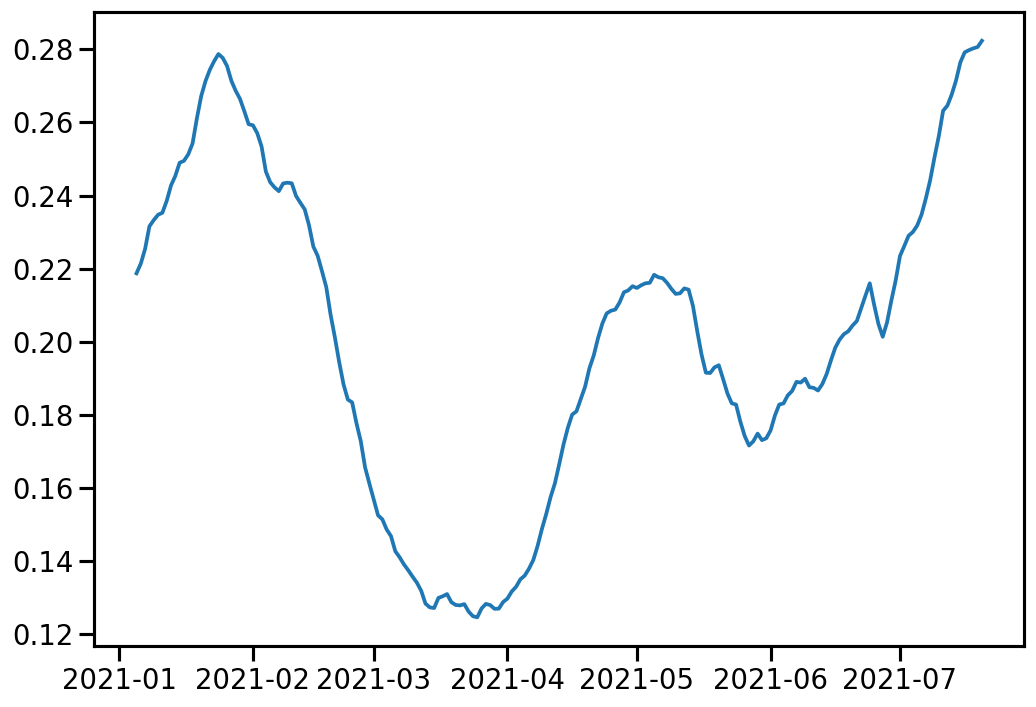

In [46]:
delay=4
a['ratio_bedDeath']=a.fittedNewDeathSMA.shift(periods=delay)/a.lits_rea_occ.rolling(n).mean()
plt.plot(a.ratio_bedDeath)

No handles with labels found to put in legend.


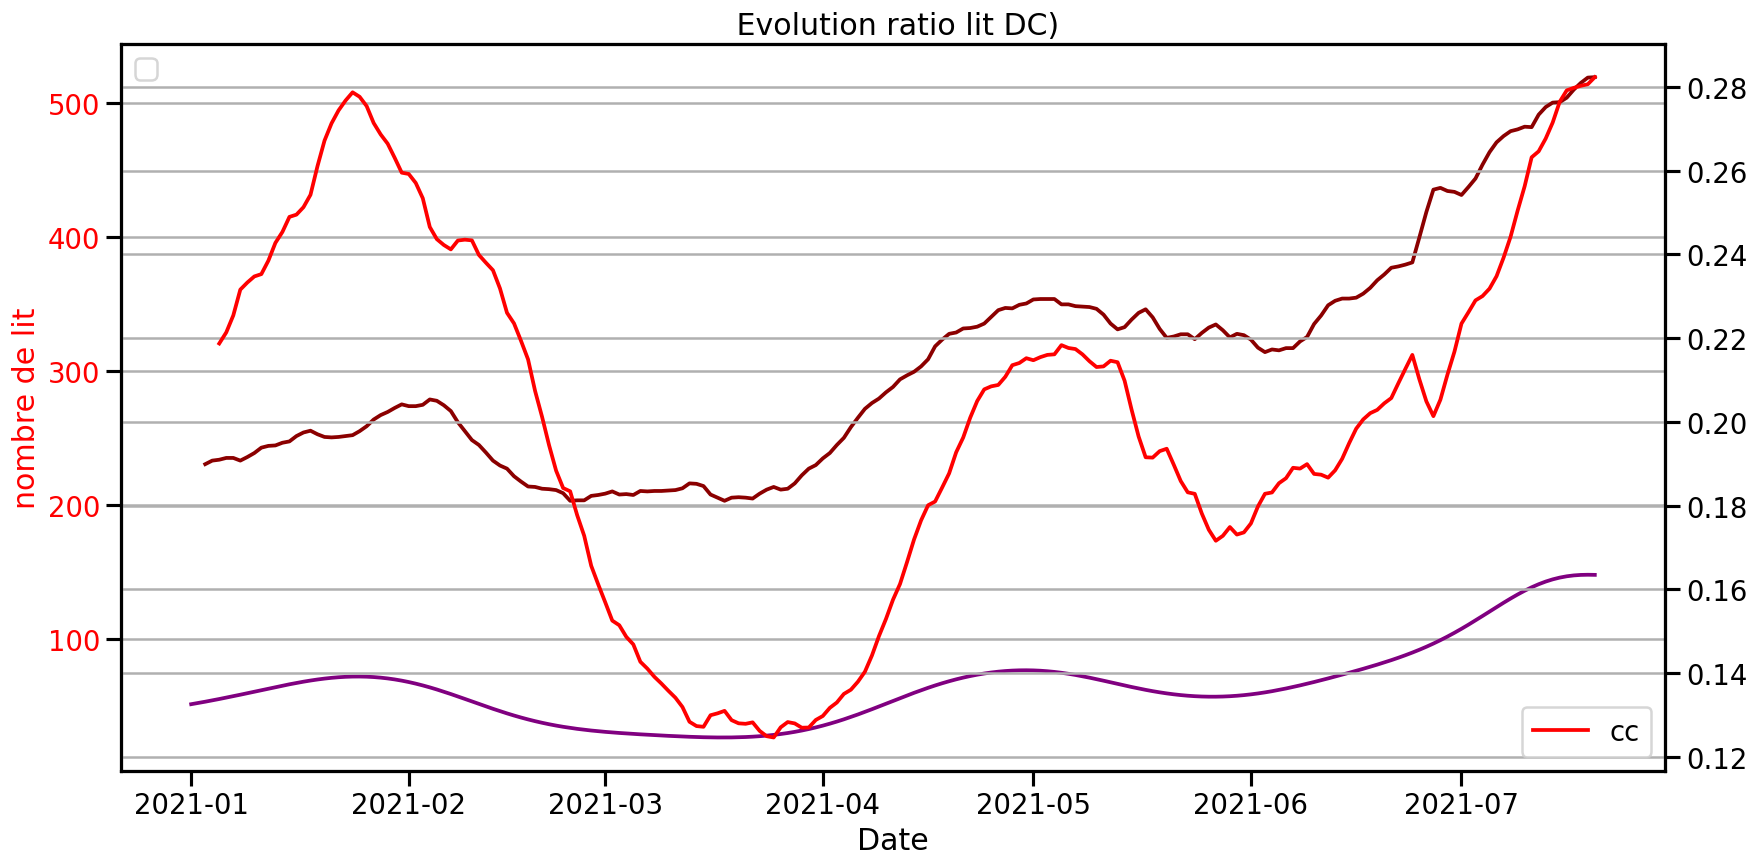

In [47]:
fig, ax1 = plt.subplots(figsize=(15,7))
n=3
ax1.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax1.set_ylabel('daily cases', color='red')


#ax1.plot(a.index,a.lits_rea.rolling(n).mean(), color="midnightblue", label="Lits o2 dedille ")
ax1.plot(a.index,a.lits_rea_occ.rolling(n).mean(), color="darkred", label="Lits o2 occupé")
ax1.plot(a.index,a.fittedNewDeathSMA, color="purple", label="Lits o2 disponible")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'

ax2.plot(a.ratio_bedDeath.index,a.ratio_bedDeath, color="red", label="cc")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(" Evolution ratio lit DC)")
ax1.set_xlabel("Date")
ax1.set_ylabel("nombre de lit")
ax1.grid(axis='y')
#ax2.set_ylim(0,200)#125

ax2.legend(loc='lower right')




sns.set_context("talk")



plt.grid(axis ='y')
plt.show()


In [48]:
#date1='2021-03-26'
#date2='2021-04-05'
#w=pd.date_range(start=date1, end=date2, freq='D')


ratioMin=a.ratio_bedDeath.min()

a['deathMin']=np.min([ratioMin*a.lits_rea_occ.rolling(n).mean(),a.fittedNewDeathSMA],axis=0)

ratioMax=a.ratio_bedDeath.max()
a['deathMax']=np.min([ratioMax*a.lits_rea_occ.rolling(n).mean(),a.fittedNewDeathSMA],axis=0)


ratioMean=a.ratio_bedDeath.mean()
a['deathMean']=np.min([ratioMean*a.lits_rea_occ.rolling(n).mean(),a.fittedNewDeathSMA],axis=0)



In [49]:
a

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  \
2021-01-01     1924.0          139140.0        56.0             4676.0   
2021-01-02     1417.0          140557.0        54.0             4730.0   
2021-01-03     1422.0          141979.0        35.0             4765.0   
2021-01-04     1565.0          143544.0        35.0             4800.0   
2021-01-05     1252.0          144796.0        62.0             4862.0   
...               ...               ...         ...                ...   
2021-07-16     7878.0          526487.0       164.0            17009.0   
2021-07-17     6787.0          533274.0       205.0            17214.0   
2021-07-18     7524.0          540798.0       192.0            17406.0   
2021-07-19     5435.0          546233.0       121.0            17527.0   
2021-07-20     2520.0          548753.0       117.0            17644.0   

            fittedNewCasesSMA  fittedNewDeathSMA  fittedDeathSMA  lits_rea  \
2021-01-01        1782.408061          51.109778     4670.145833     285.0   
2021-01-02        1826.950011          52.025643     4720.541667     288.0   
2021-01-03        1881.690394          52.976760     4771.750000     286.0   
2021-01-04        1947.258687          53.961555     4824.187500     289.0   
2021-01-05        2023.161711          54.978354     4878.340278     290.0   
...                       ...                ...             ...       ...   
2021-07-16        6437.830615         146.617704    17020.979167     538.0   
2021-07-17        6102.677836         147.275855    17184.166667     542.0   
2021-07-18        5726.891125         147.644534    17344.756944     544.0   
2021-07-19        5323.220068         147.763369    17503.944444     539.0   
2021-07-20        4906.663716         147.680454    17663.048611     539.0   

            lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  lits_o2_disp  \
2021-01-01         225.0           60.0   1938.0        872.0        1066.0   
2021-01-02         235.0           53.0   1935.0        878.0        1057.0   
2021-01-03         231.0           55.0   1934.0        889.0        1045.0   
2021-01-04         233.0           56.0   1943.0        906.0        1037.0   
2021-01-05         237.0           53.0   1952.0        909.0        1043.0   
...                  ...            ...      ...          ...           ...   
2021-07-16         509.0           29.0   3348.0       2956.0         392.0   
2021-07-17         514.0           28.0   3323.0       2995.0         328.0   
2021-07-18         522.0           22.0   3355.0       3028.0         327.0   
2021-07-19         521.0           18.0   3326.0       2981.0         345.0   
2021-07-20         515.0           24.0   3332.0       2955.0         377.0   

            z_tamp  ratio_bedDeath   deathMin    deathMax   deathMean  
2021-01-01    97.0             NaN        NaN         NaN         NaN  
2021-01-02   105.0             NaN        NaN         NaN         NaN  
2021-01-03   104.0             NaN  28.715518   52.976760   46.199540  
2021-01-04    84.0             NaN  29.047970   53.961555   46.734411  
2021-01-05    94.0        0.218729  29.131083   54.978354   46.868129  
...            ...             ...        ...         ...         ...  
2021-07-16   396.0        0.279163  62.833377  142.288812  101.090744  
2021-07-17   335.0        0.279763  63.581393  143.982726  102.294205  
2021-07-18   342.0        0.280252  64.204740  145.394322  103.297089  
2021-07-19   358.0        0.280619  64.703418  146.523598  104.099397  
2021-07-20   373.0        0.282319  64.744974  146.617704  104.166256  

[201 rows x 18 columns]

No handles with labels found to put in legend.


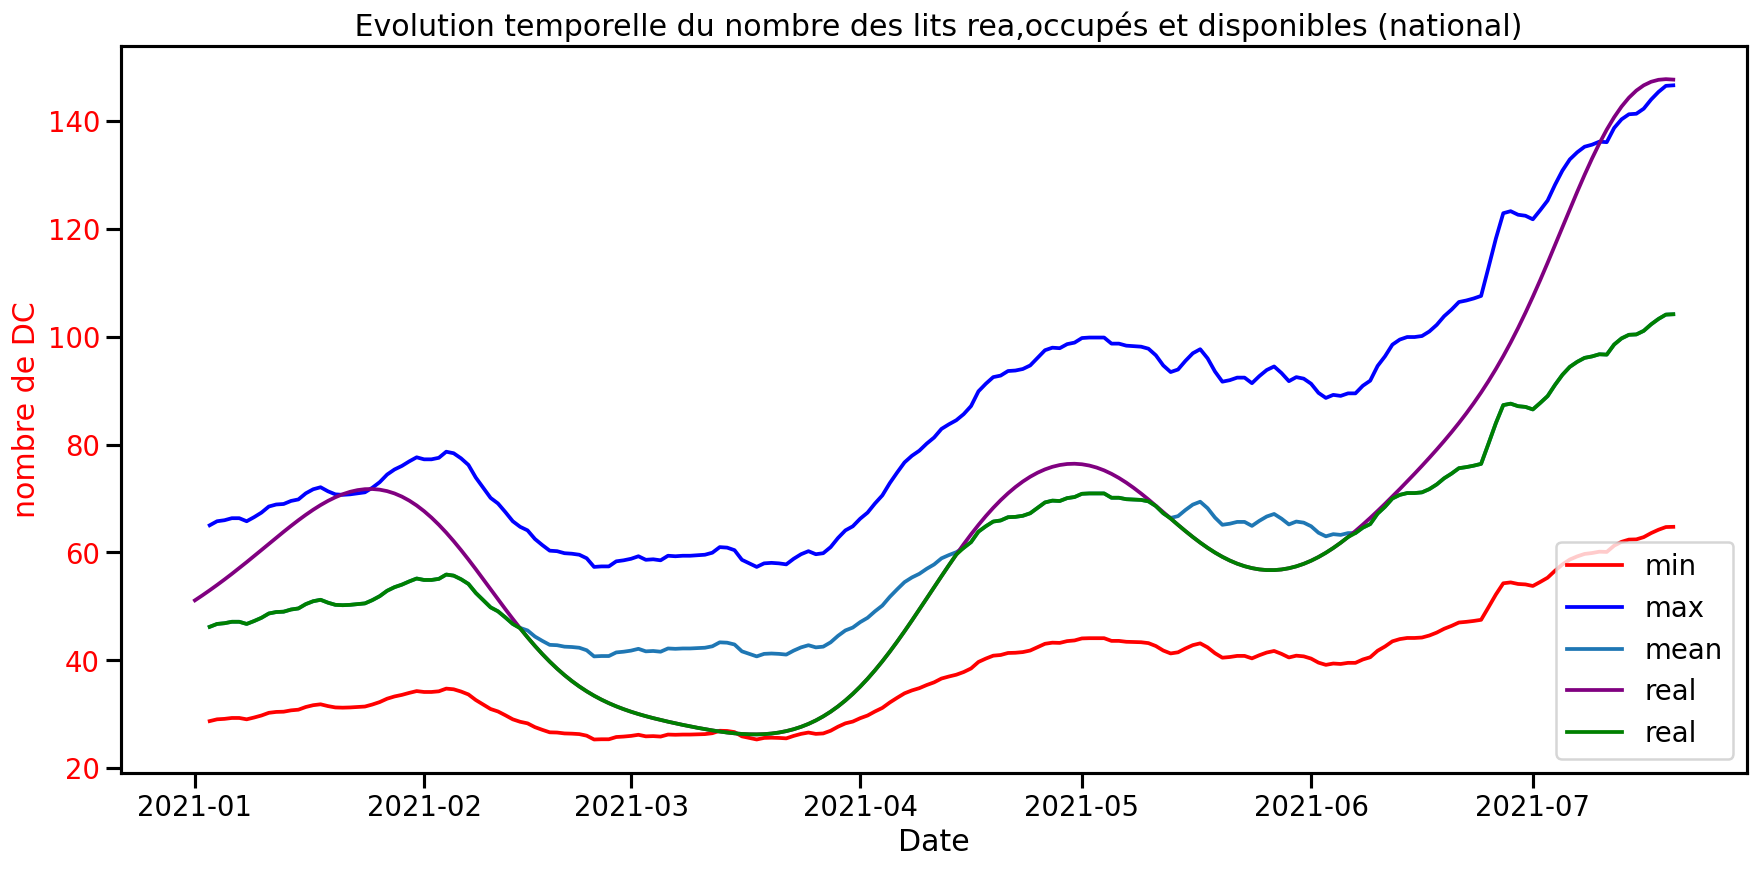

In [50]:
fig, ax1 = plt.subplots(figsize=(15,7))
n=3
ax1.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax1.set_ylabel('daily cases', color='red')


ax1.plot(a.index,ratioMin*a.lits_rea_occ.rolling(n).mean(), color="red", label="min")
ax1.plot(a.index,ratioMax*a.lits_rea_occ.rolling(n).mean(), color="blue", label="max")
ax1.plot(a.index,ratioMean*a.lits_rea_occ.rolling(n).mean(), label="mean")
ax1.plot(a.index,a.fittedNewDeathSMA, color="purple", label="real")
ax1.plot(a.index,a.deathMean, color="green", label="real")



fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(" Evolution temporelle du nombre des lits rea,occupés et disponibles (national)")
ax1.set_xlabel("Date")
ax1.set_ylabel("nombre de DC")
ax1.grid(axis='y')
#ax2.set_ylim(0,200)#125

ax1.legend(loc='lower right')




sns.set_context("talk")



plt.grid(axis ='y')
plt.show()


No handles with labels found to put in legend.


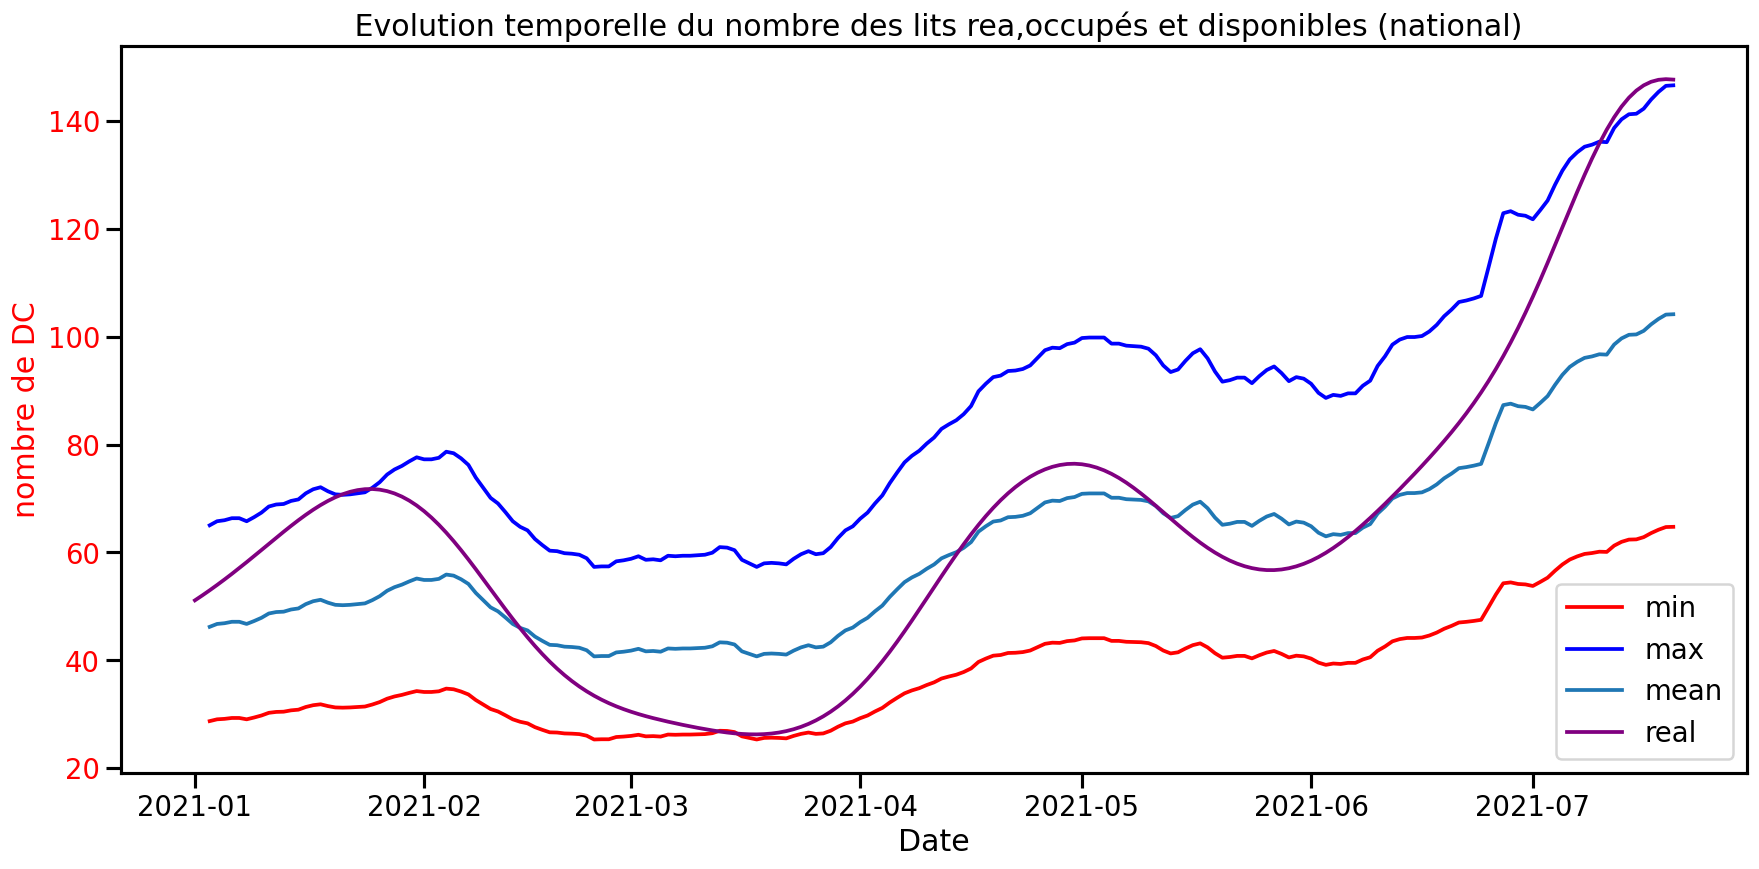

In [51]:
fig, ax1 = plt.subplots(figsize=(15,7))
n=3
ax1.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax1.set_ylabel('daily cases', color='red')


ax1.plot(a.index,ratioMin*a.lits_rea_occ.rolling(n).mean(), color="red", label="min")
ax1.plot(a.index,ratioMax*a.lits_rea_occ.rolling(n).mean(), color="blue", label="max")
ax1.plot(a.index,ratioMean*a.lits_rea_occ.rolling(n).mean(), label="mean")
ax1.plot(a.index,a.fittedNewDeathSMA, color="purple", label="real")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(" Evolution temporelle du nombre des lits rea,occupés et disponibles (national)")
ax1.set_xlabel("Date")
ax1.set_ylabel("nombre de DC")
ax1.grid(axis='y')
#ax2.set_ylim(0,200)#125

ax1.legend(loc='lower right')




sns.set_context("talk")



plt.grid(axis ='y')
plt.show()


In [52]:
missingDeath_ICUBed=np.trapz((a.fittedNewDeathSMA-a.deathMean).dropna())
missingDeath_ICUBed

1492.0786902614846

In [53]:
a.fittedNewDeathSMA.diff(2)/2

2021-01-01         NaN
2021-01-02         NaN
2021-01-03    0.933491
2021-01-04    0.967956
2021-01-05    1.000797
                ...   
2021-07-16    1.143949
2021-07-17    0.817298
2021-07-18    0.513415
2021-07-19    0.243757
2021-07-20    0.017960
Freq: D, Name: fittedNewDeathSMA, Length: 201, dtype: float64

No handles with labels found to put in legend.


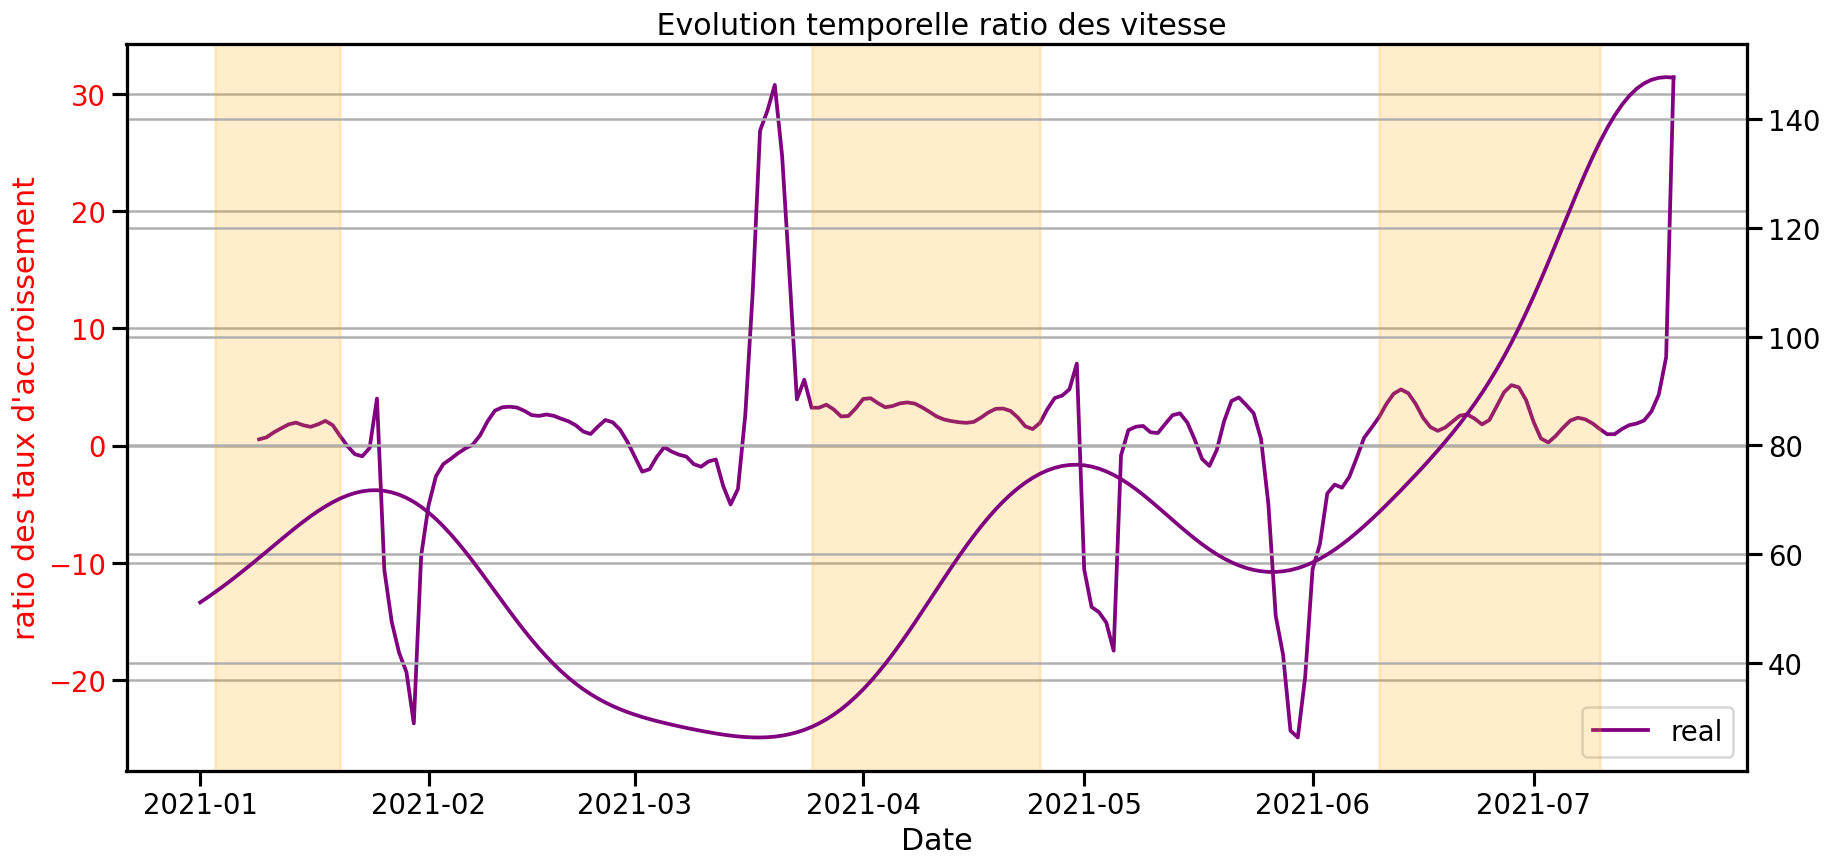

In [54]:
fig, ax1 = plt.subplots(figsize=(15,7))
n=3
ax1.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax1.set_ylabel('daily cases', color='red')

b=a.lits_rea_occ.rolling(n).mean().diff(2)/a.fittedNewDeathSMA.diff(2)
ax1.plot(a.index,b.rolling(5).mean(), color="purple", label="real")

fig.tight_layout()  # otherwise the right y-label is slightly clipped


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'


ax2.plot(a.index,a.fittedNewDeathSMA, color="purple", label="real")

plt.title(" Evolution temporelle ratio des vitesse")
ax1.set_xlabel("Date")
ax1.set_ylabel("ratio des taux d'accroissement")
ax1.grid(axis='y')
#ax1.set_ylim(-10,10)#125

ax1.legend(loc='lower right')

Date=pd.to_datetime('2021-1-3')
    #plt.vlines(Date,ymin=-10,ymax=5000,lw=0.8 )    
Date1=pd.to_datetime('2021-1-20')
w1 = pd.date_range(start=Date, end=Date1, freq='D')
    #plt.vlines(Date,ymin=-10,ymax=5000,lw=0.8 )
plt.axvspan(Date,Date1, color='orange', alpha=0.2)  


Date=pd.to_datetime('2021-3-25')
    #plt.vlines(Date,ymin=-10,ymax=5000,lw=0.8 )    
Date1=pd.to_datetime('2021-4-25')
w2 = pd.date_range(start=Date, end=Date1, freq='D')
plt.axvspan(Date,Date1, color='orange', alpha=0.2)  
sns.set_context("talk")

Date=pd.to_datetime('2021-6-10')
    #plt.vlines(Date,ymin=-10,ymax=5000,lw=0.8 )    
Date1=pd.to_datetime('2021-7-10')
w3 = pd.date_range(start=Date, end=Date1, freq='D')
plt.axvspan(Date,Date1, color='orange', alpha=0.2)  
sns.set_context("talk")



plt.grid(axis ='y')
plt.show()

In [55]:
b=a.lits_rea_occ.rolling(n).mean().diff(2)/a.fittedNewDeathSMA.diff(2)

In [56]:
a.lits_rea_occ.rolling(n).mean().loc[w1]

2021-01-03    230.333333
2021-01-04    233.000000
2021-01-05    233.666667
2021-01-06    235.000000
2021-01-07    235.000000
2021-01-08    233.000000
2021-01-09    235.666667
2021-01-10    238.666667
2021-01-11    242.666667
2021-01-12    244.000000
2021-01-13    244.333333
2021-01-14    246.333333
2021-01-15    247.333333
2021-01-16    251.333333
2021-01-17    254.000000
2021-01-18    255.333333
2021-01-19    252.666667
2021-01-20    250.666667
Freq: D, Name: lits_rea_occ, dtype: float64

Text(0.5, 1.0, 'Lits de réanimation  vs Lits de réanimation  occupés (national)')

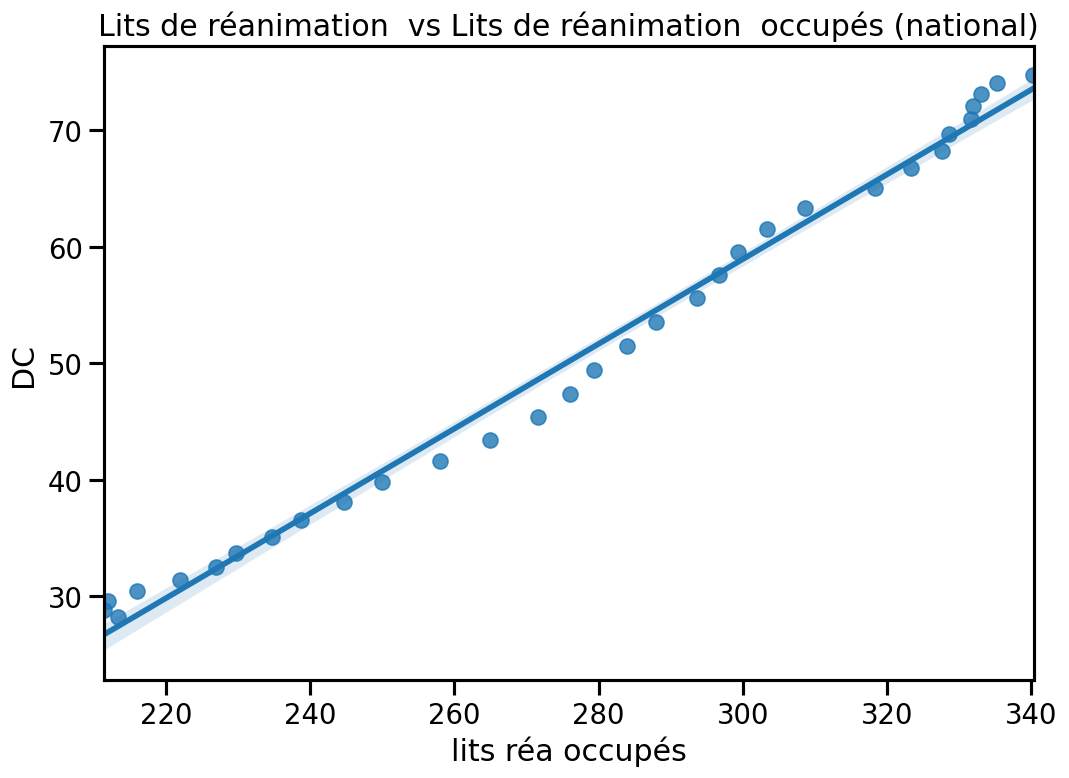

In [57]:
# Regression
linear_regressor = LinearRegression(fit_intercept=True)  # create object for the class
ww=w2
X = a.lits_rea_occ.rolling(n).mean().loc[ww].values.reshape(-1, 1)  # values converts it into a numpy array
Y = a.fittedNewDeathSMA.loc[ww].values.reshape(-1, 1)  #

linear_regressor.fit(X,Y )  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#sns.set_style(style=None, rc=None )
#sns.scater(x=a.lits_rea_occ.rolling(n).mean().loc[w1], y=a.fittedNewDeathSMA.loc[w1])
sns.regplot(x=a.lits_rea_occ.rolling(n).mean().loc[ww], y=a.fittedNewDeathSMA.loc[ww]) #regplot(x=a.lits_rea_occ.rolling(n).mean().loc[w1], y=Y_pred,line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('lits réa occupés')
plt.ylabel('DC ')
plt.title('Lits de réanimation  vs Lits de réanimation  occupés (national)')


In [58]:
linear_regressor.coef_[0]

array([0.36362917])

### Analyse du manque de lit  a partir des valeurs de la literature (CoMo)

In [59]:
ageDistDeath=np.array([1,2,3,10,16,68])
ageDistDeath=ageDistDeath/np.sum(ageDistDeath)


fatality=0.032#np.array([6.5,3.8,6.6,13,25.2,200])#p_hr
fatality=fatality#/np.sum(fatality)

hospitalPrb=np.array([.25,.22,.28,.58,.116,.1496])#p_ihr
hospitalPrb=hospitalPrb#/np.sum(hospitalPrb)

pdeath_ho=0.2#Probability of dying when hospitalised if req O2:
pdeath_vent=0.8#Probability of dying when ventilated:
pdeath_icuo=.55#Probability of dying when admitted to ICU if req O2:


In [60]:


pclin=.45#Probability upon infection of developing clinical symptoms


prob_icu=0.25#Probability upon hospitalisation of requiring ICU admission
prob_vent=0.48#Probability upon admission to the ICU of requiring a ventilator

# duration in hospital
nus=5 #Duration of hospitalised infection: (1 to 30)
nu_icu=7#Duration of ICU infection: (1 to 30)
nu_vent=7#Duration of ventilated infection: (1 to 30)
bedO2Duration=np.array([pd.Timedelta(nus, unit='d'),pd.Timedelta(nus, unit='d')]) # 1st column duration for dead, second for R
bedICUDuration=np.array([pd.Timedelta(nu_icu, unit='d'),pd.Timedelta(nu_icu, unit='d')]) # 1st column duration for dead, second for R
bedVentDuration=np.array([pd.Timedelta(nu_vent, unit='d'),pd.Timedelta(nu_vent, unit='d')]) # 1st column duration for dead, second for R


In [61]:
hospitaliseNonGrave=pd.DataFrame(index=a.index,columns=['<30','40','50','60','70','>70'])
hospitaliseO2=pd.DataFrame(index=a.index,columns=['<30','40','50','60','70','>70'])
hospitaliseICU=pd.DataFrame(index=a.index,columns=['<30','40','50','60','70','>70'])
hospitaliseVent=pd.DataFrame(index=a.index,columns=['<30','40','50','60','70','>70'])

for i in a.index:
    aa=a.fittedNewDeathSMA[i]*ageDistDeath*hospitalPrb/fatality#
    hospitaliseNonGrave.loc[i]=(1-pclin)*aa
    hospitaliseO2.loc[i]=(1-prob_icu)*pclin*aa
    hospitaliseICU.loc[i]=(1-prob_vent)*prob_icu*pclin*aa
    hospitaliseVent.loc[i]=prob_vent*prob_icu*pclin*aa

In [62]:
w1=pd.date_range(start='2021-01-01', end='2021-02-01', freq='D')
hospitaliseVent.loc[w1]

<30        40        50       60       70      >70
2021-01-01  0.215619   0.37949  0.724481  5.00237  1.60076  8.77381
2021-01-02  0.219483   0.38629  0.737463  5.09201  1.62944  8.93103
2021-01-03  0.223496  0.393352  0.750946   5.1851  1.65923  9.09431
2021-01-04   0.22765  0.400665  0.764905  5.28149  1.69008  9.26336
2021-01-05   0.23194  0.408214  0.779318  5.38101  1.72192  9.43791
2021-01-06  0.236356  0.415986  0.794156  5.48346  1.75471   9.6176
2021-01-07  0.240887  0.423961  0.809379  5.58857  1.78834  9.80197
2021-01-08  0.245517   0.43211  0.824937  5.69599  1.82272  9.99038
2021-01-09  0.250226  0.440398   0.84076  5.80525  1.85768   10.182
2021-01-10  0.254989  0.448781  0.856763  5.91575  1.89304  10.3758
2021-01-11  0.259774  0.457202  0.872839  6.02675  1.92856  10.5705
2021-01-12  0.264543  0.465595  0.888863  6.13739  1.96396  10.7646
2021-01-13  0.269253  0.473886  0.904691  6.24667  1.99894  10.9562
2021-01-14  0.273858   0.48199  0.920162   6.3535  2.03312  11.1436
2021-01-15  0.278305  0.489817  0.935104  6.45667  2.06614  11.3246
2021-01-16  0.282541  0.497272  0.949338  6.55495  2.09758  11.4969
2021-01-17  0.286511   0.50426  0.962677  6.64706  2.12706  11.6585
2021-01-18  0.290161  0.510683   0.97494  6.73173  2.15415   11.807
2021-01-19  0.293437  0.516449  0.985948  6.80774  2.17848  11.9403
2021-01-20   0.29629   0.52147  0.995533  6.87392  2.19965  12.0564
2021-01-21  0.298672  0.525663   1.00354  6.92919  2.21734  12.1533
2021-01-22  0.300542  0.528954   1.00982  6.97258  2.23122  12.2294
2021-01-23  0.301863  0.531278   1.01426  7.00321  2.24103  12.2831
2021-01-24  0.302601  0.532577   1.01674  7.02033  2.24651  12.3132
2021-01-25  0.302729  0.532803   1.01717  7.02331  2.24746  12.3184
2021-01-26  0.302226  0.531917   1.01548  7.01163  2.24372  12.2979
2021-01-27  0.301073  0.529889   1.01161   6.9849  2.23517   12.251
2021-01-28  0.299261  0.526699   1.00552  6.94285  2.22171  12.1773
2021-01-29  0.296783  0.522337  0.997189  6.88535  2.20331  12.0764
2021-01-30   0.29364  0.516807  0.986632  6.81246  2.17999  11.9486
2021-01-31  0.289843  0.510124  0.973874  6.72437   2.1518  11.7941
2021-02-01  0.285409  0.502319  0.958973  6.62148  2.11887  11.6136

In [63]:
bedOcc=pd.DataFrame(index=tn.index,columns=['total','O2','ICU','Vent'])
bedOcc.fillna(0,inplace=True)

In [64]:
#hospitaliseD=pd.DataFrame(index=b.index,columns=['<30','40','50','60','70','>70'])

for i in a.index:
    p=1-pdeath_icuo
    w=pd.date_range(start=i-bedICUDuration[0], end=i, freq='D')
    bedOcc.loc[w,'ICU']=p*hospitaliseICU.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'ICU']
    w=pd.date_range(start=i-bedICUDuration[1], end=i, freq='D')
    bedOcc.loc[w,'ICU']=(1-p)*hospitaliseICU.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'ICU']
    
    p=1-pdeath_ho
    w=pd.date_range(start=i-bedO2Duration[0], end=i, freq='D')
    bedOcc.loc[w,'O2']=p*hospitaliseO2.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'O2']
    w=pd.date_range(start=i-bedO2Duration[1], end=i, freq='D')
    bedOcc.loc[w,'O2']=(1-p)*hospitaliseO2.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'O2']
    
    p=1-pdeath_vent
    w=pd.date_range(start=i-bedVentDuration[0], end=i, freq='D')
    bedOcc.loc[w,'Vent']=p*hospitaliseVent.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'Vent']
    w=pd.date_range(start=i-bedVentDuration[1], end=i, freq='D')
    bedOcc.loc[w,'Vent']=(1-p)*hospitaliseVent.loc[i].sum()*np.ones(len(w))+bedOcc.loc[w,'Vent']

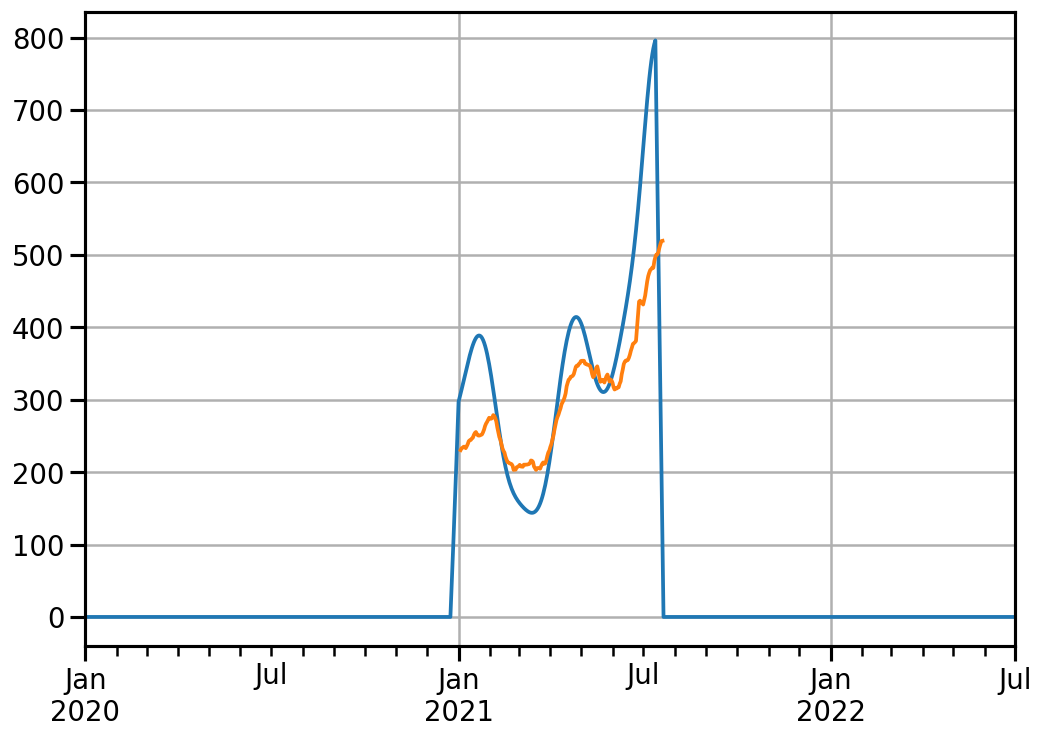

In [65]:
(bedOcc.ICU+bedOcc.Vent).plot()
a.lits_rea_occ.rolling(n).mean().plot()

plt.grid()

# Regional analysis

In [66]:
df_Reg=df_Reg.reset_index()

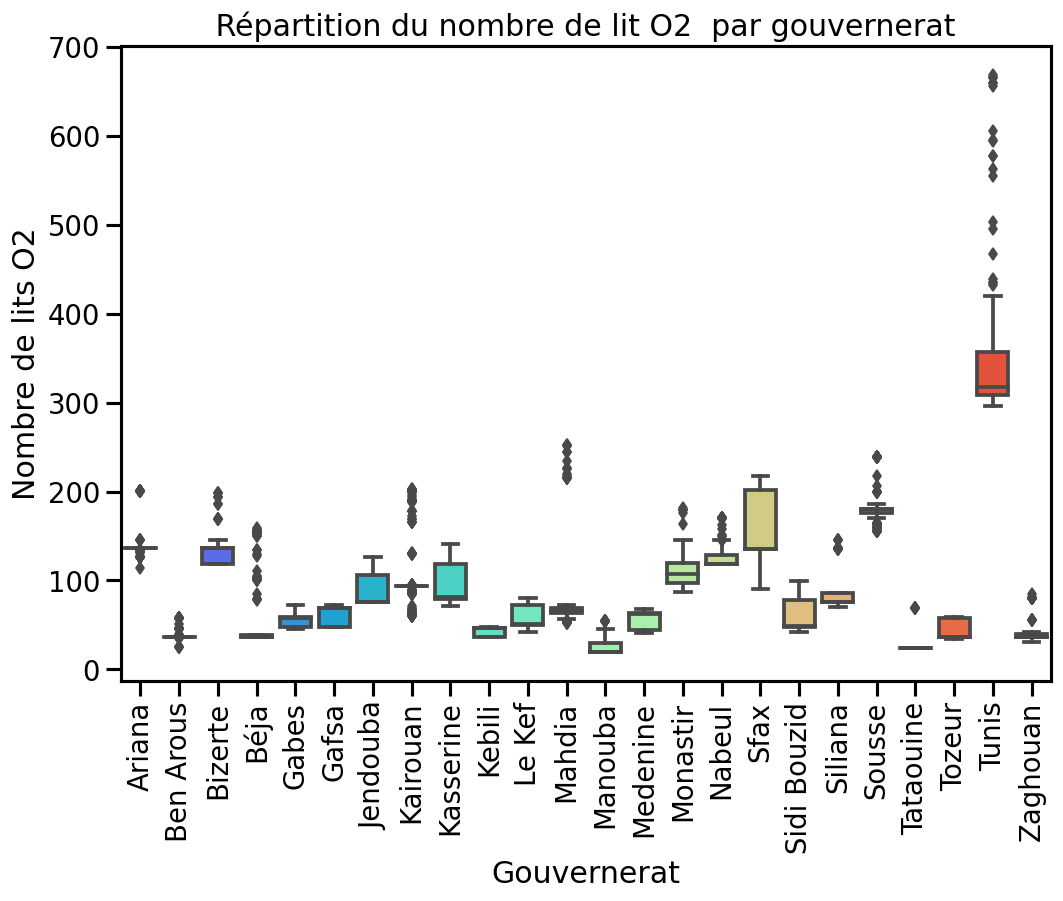

In [67]:
sns.set_style(style=None, rc=None )
g1=sns.boxplot(x='Gov',y='lits_o2',data=df_Reg,palette='rainbow');
g1.set_title(' Répartition du nombre de lit O2  par gouvernerat ');
g1.set_xlabel('Gouvernerat');
g1.set_ylabel('Nombre de lits O2');
plt.xticks(rotation=90);
g1.figure.savefig('o2_gov.png')

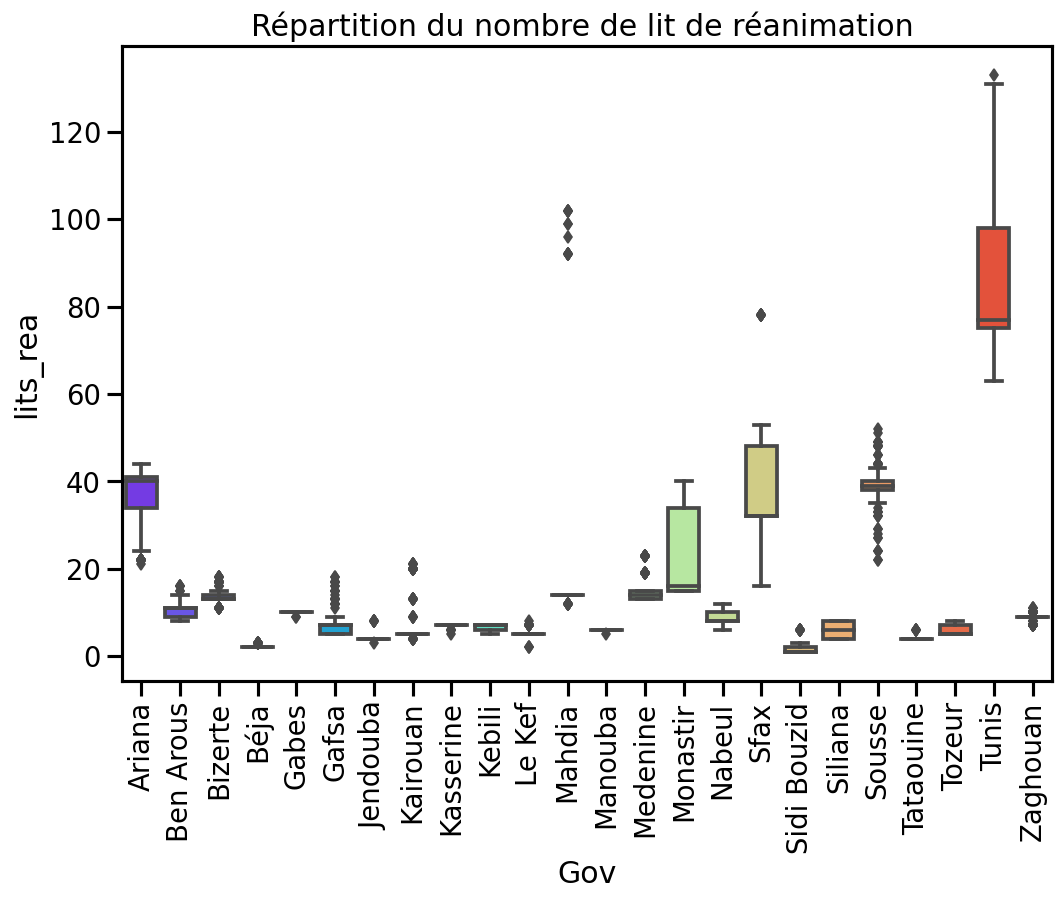

In [68]:
sns.set_style(style=None, rc=None )
g2=sns.boxplot(x='Gov',y='lits_rea',data=df_Reg,palette='rainbow');
g2.set_title('Répartition du nombre de lit de réanimation ');

plt.xticks(rotation=90);
g2.figure.savefig('rea_gov.png')

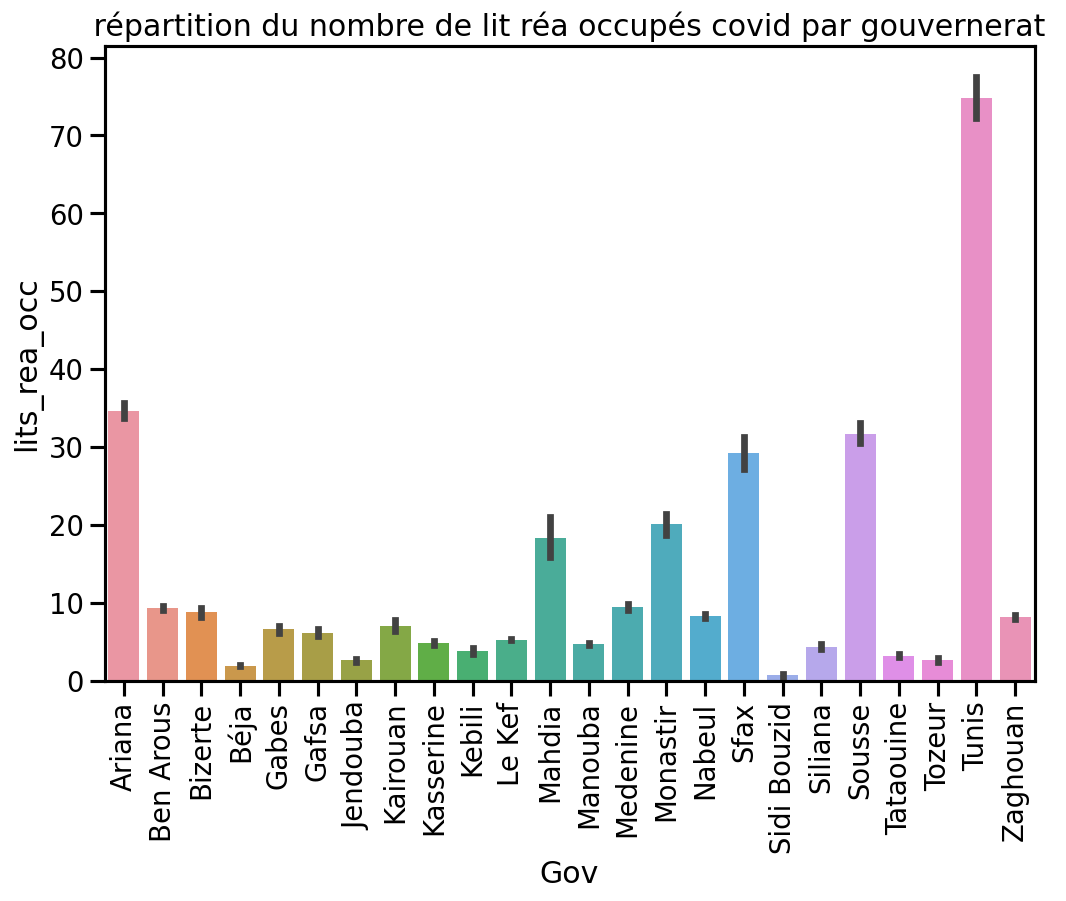

In [69]:
sns.set_style(style=None, rc=None )
p=sns.barplot(x='Gov',y='lits_rea_occ',data=df_Reg);
p.set_title(' répartition du nombre de lit réa occupés covid par gouvernerat ');

plt.xticks(rotation=90);
p.figure.savefig('rea_occ_gov.png')

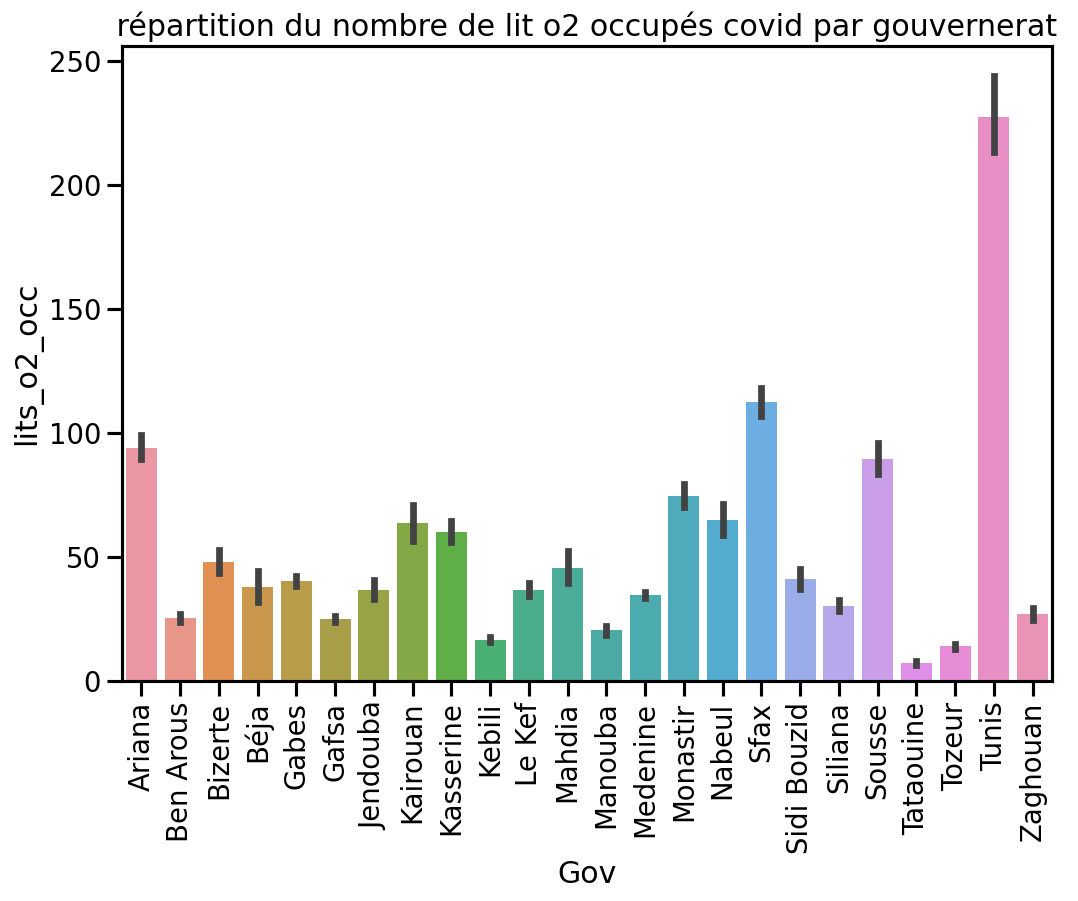

In [70]:
sns.set_style(style=None, rc=None )
p1=sns.barplot(x='Gov',y='lits_o2_occ',data=df_Reg);
p1.set_title(' répartition du nombre de lit o2 occupés covid par gouvernerat ');
plt.xticks(rotation=90);
p1.figure.savefig('o2_occ_gov.png')

In [71]:
df12=df_Reg.groupby('Gov')

In [72]:
ddf = pd.read_excel("C:\\Users\\amrou\\Downloads\\stage\\hopit_clin.xlsx", 'Hopitaux')
ddf['Date'] = ddf['Date'].apply(dateutil.parser.parse, dayfirst=True)
ddf['Struct'] = ddf['Struct'].astype('category')
df_2 = pd.DataFrame(ddf.groupby(['Date','Gov']).sum())
df_3=pd.DataFrame(ddf.groupby(['Date','Gov']).sum())
df_3.reset_index(inplace= True)
ddf.set_index('Date', inplace=True)
df_2
df_2.reset_index(inplace= True)

In [73]:
df_2[["lits_rea","lits_rea_occ","lits_rea_disp","lits_o2","lits_o2_occ","lits_o2_disp"]]=df_2[["lits_rea","lits_rea_occ","lits_rea_disp","lits_o2","lits_o2_occ","lits_o2_disp"]].rolling(7).mean().fillna(0)

<AxesSubplot:xlabel='Date', ylabel='lits_o2_occ'>

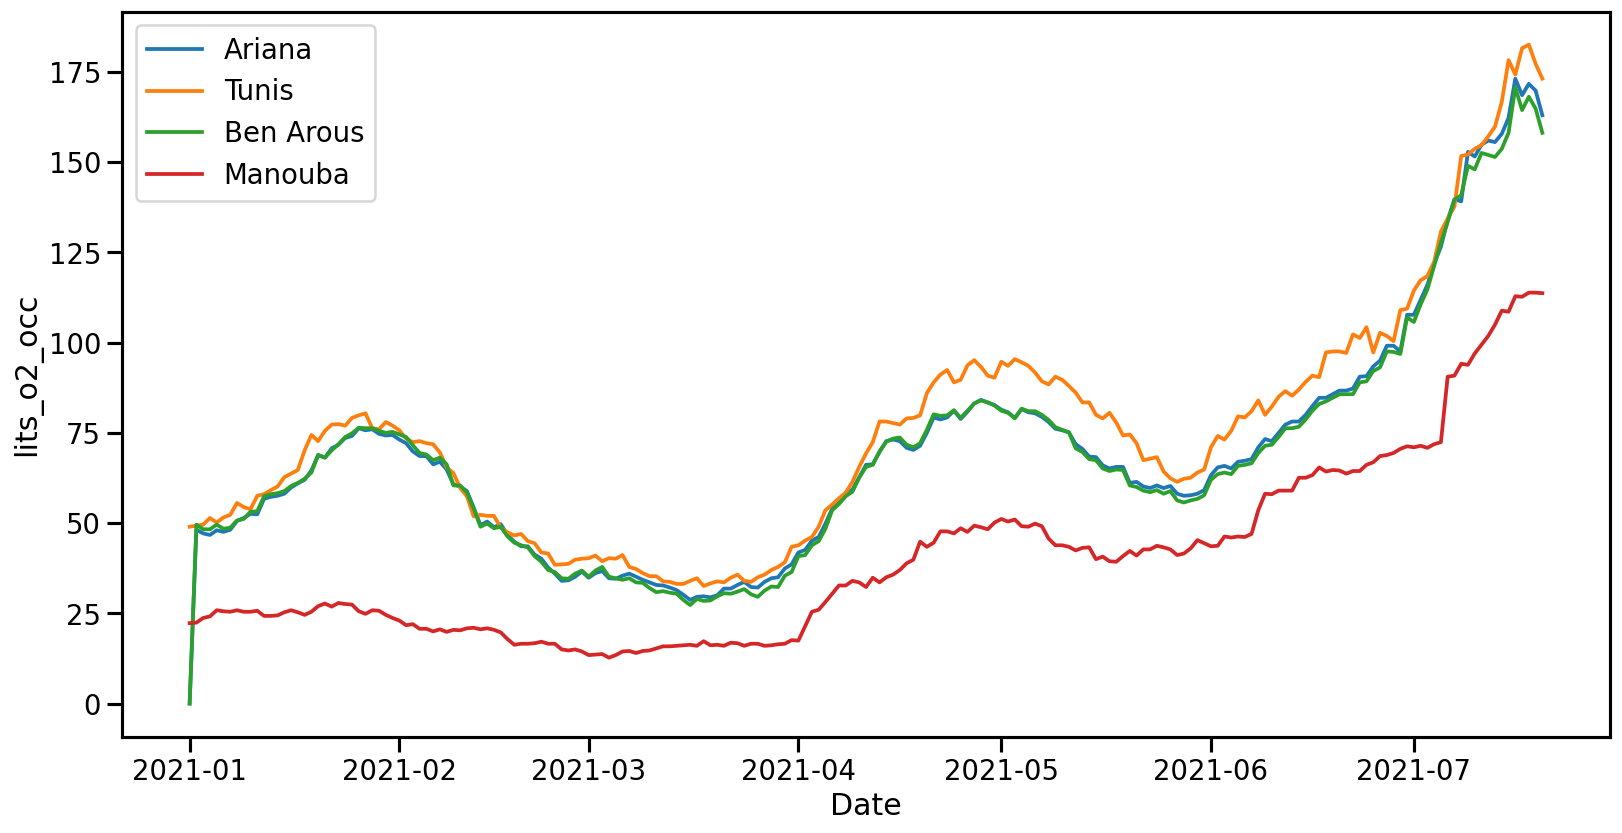

In [74]:
df0=df_2[df_2.Gov=='Ariana']
df1=df_2[df_2.Gov=='Tunis']
df2=df_2[df_2.Gov=='Ben Arous']
df3=df_2[df_2.Gov=='Manouba']

fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(x="Date",y="lits_o2_occ",data=df0,label='Ariana')
sns.lineplot(x="Date",y="lits_o2_occ",data=df1,label='Tunis')
sns.lineplot(x="Date",y="lits_o2_occ",data=df2,label='Ben Arous')
sns.lineplot(x="Date",y="lits_o2_occ",data=df3,label='Manouba')

<AxesSubplot:xlabel='Date', ylabel='lits_o2_occ'>

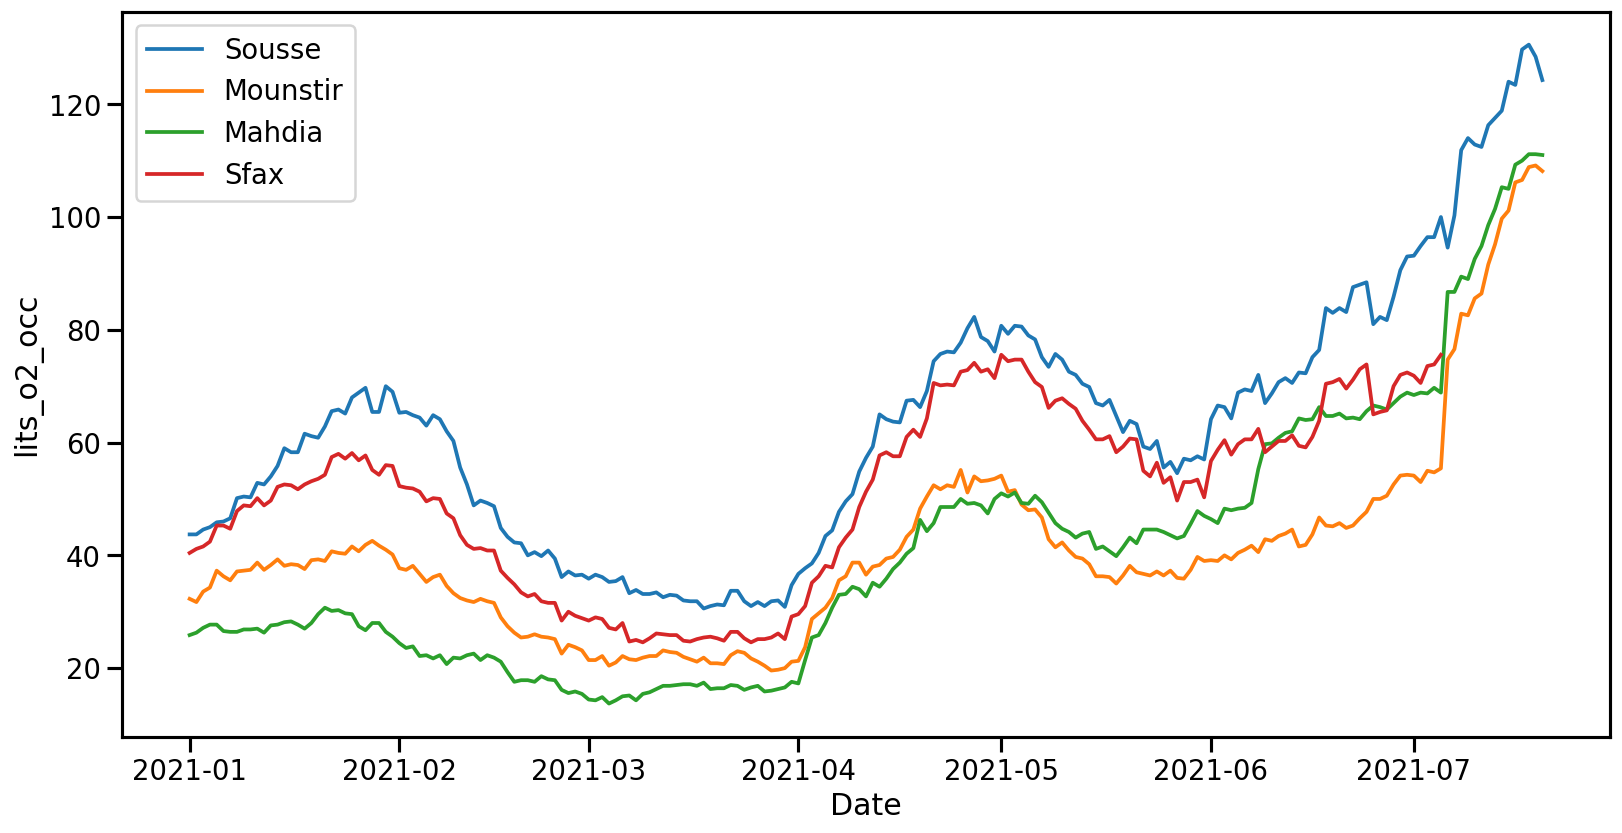

In [75]:
df4=df_2[df_2.Gov=='Sousse']
df5=df_2[df_2.Gov=='Monastir']
df6=df_2[df_2.Gov=='Mahdia']
df18=df_2[df_2.Gov=='Sfax']


fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(x="Date",y="lits_o2_occ",data=df4,label='Sousse')
sns.lineplot(x="Date",y="lits_o2_occ",data=df5,label='Mounstir')
sns.lineplot(x="Date",y="lits_o2_occ",data=df6,label='Mahdia')
sns.lineplot(x="Date",y="lits_o2_occ",data=df18,label='Sfax')


<AxesSubplot:xlabel='Date', ylabel='lits_o2_occ'>

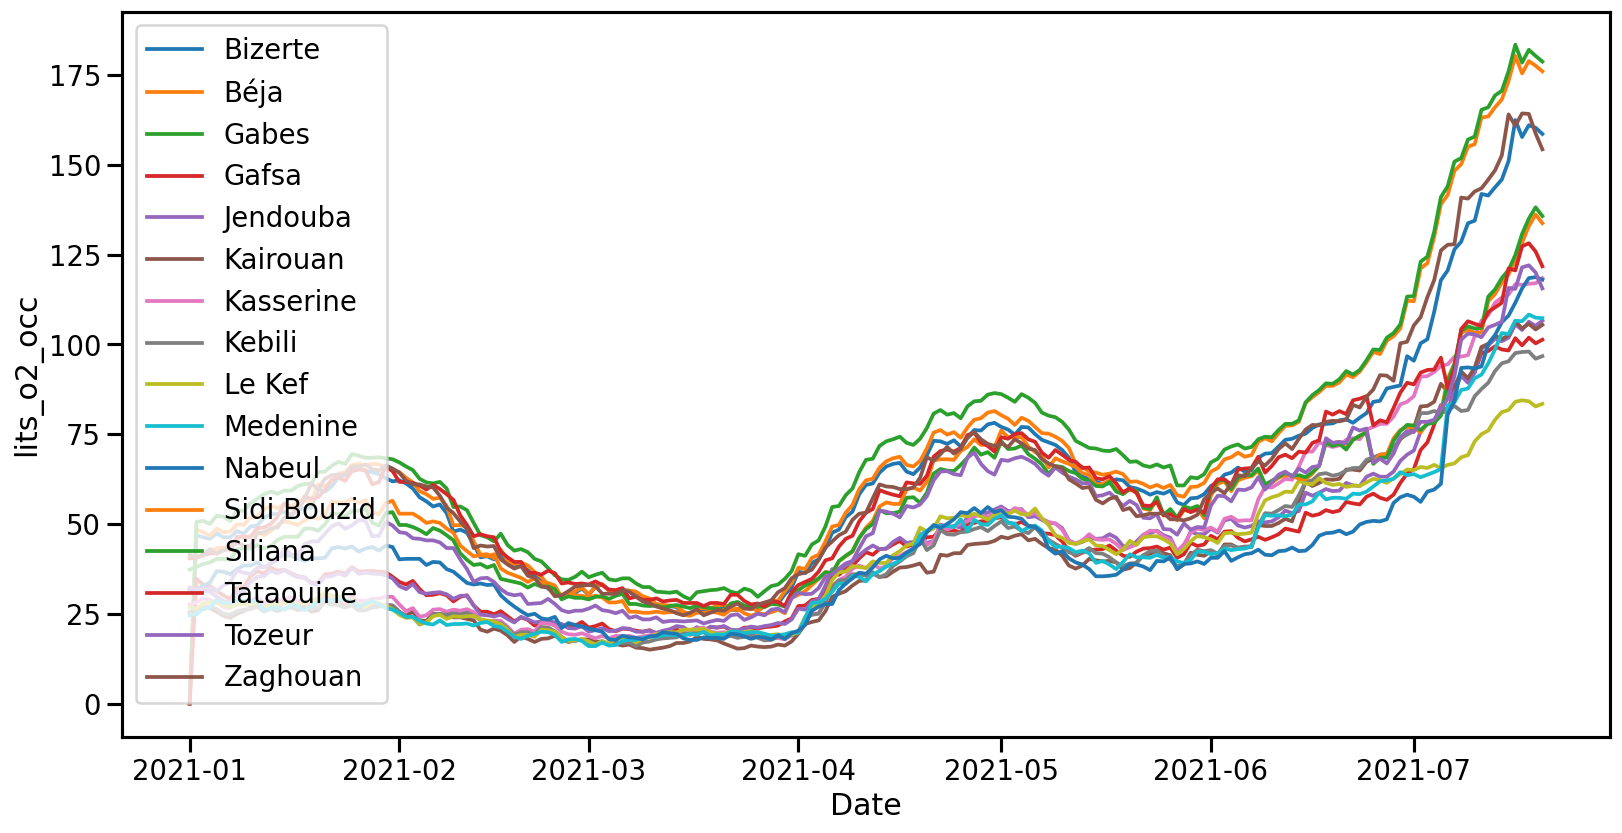

In [76]:
df7=df_2[df_2.Gov=='Bizerte']
df8=df_2[df_2.Gov=='Béja']
df9=df_2[df_2.Gov=='Gabes']
df10=df_2[df_2.Gov=='Gafsa']
df11=df_2[df_2.Gov=='Jendouba']
df12=df_2[df_2.Gov=='Kairouan']
df13=df_2[df_2.Gov=='Kasserine']
df14=df_2[df_2.Gov=='Kebili']
df15=df_2[df_2.Gov=='Le Kef']
df16=df_2[df_2.Gov=='Medenine']
df17=df_2[df_2.Gov=='Nabeul']
df19=df_2[df_2.Gov=='Sidi Bouzid']
df20=df_2[df_2.Gov=='Siliana']
df21=df_2[df_2.Gov=='Tataouine']
df22=df_2[df_2.Gov=='Tozeur']
df23=df_2[df_2.Gov=='Zaghouan']

fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(x="Date",y="lits_o2_occ",data=df7,label='Bizerte')
sns.lineplot(x="Date",y="lits_o2_occ",data=df8,label='Béja')
sns.lineplot(x="Date",y="lits_o2_occ",data=df9,label='Gabes')
sns.lineplot(x="Date",y="lits_o2_occ",data=df10,label='Gafsa')
sns.lineplot(x="Date",y="lits_o2_occ",data=df11,label='Jendouba')
sns.lineplot(x="Date",y="lits_o2_occ",data=df12,label='Kairouan')
sns.lineplot(x="Date",y="lits_o2_occ",data=df13,label='Kasserine')
sns.lineplot(x="Date",y="lits_o2_occ",data=df14,label='Kebili')
sns.lineplot(x="Date",y="lits_o2_occ",data=df15,label='Le Kef')
sns.lineplot(x="Date",y="lits_o2_occ",data=df16,label='Medenine')
sns.lineplot(x="Date",y="lits_o2_occ",data=df17,label='Nabeul')
sns.lineplot(x="Date",y="lits_o2_occ",data=df19,label='Sidi Bouzid')
sns.lineplot(x="Date",y="lits_o2_occ",data=df20,label='Siliana')
sns.lineplot(x="Date",y="lits_o2_occ",data=df21,label='Tataouine')
sns.lineplot(x="Date",y="lits_o2_occ",data=df22,label='Tozeur')
sns.lineplot(x="Date",y="lits_o2_occ",data=df23,label='Zaghouan')


In [77]:
pic1=df_3[df_3.Date < '2021-03-01']
pic1
pic1[pic1.lits_o2_occ==pic1.lits_o2_occ.max()]
#date0=pic1[pic1.lits_o2_occ==pic1.lits_o2_occ.max()].Date
#pic1[pic1.lits_o2_occ==pic1.lits_o2_occ.max()].Gov

Date    Gov  lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  \
742 2021-01-31  Tunis        75            69              6      318   

     lits_o2_occ  lits_o2_disp  z_tamp  
742          253            65      24

In [78]:
list=pic1.Gov.drop_duplicates().tolist()

In [79]:
base=pd.DataFrame()
for i in list :
    df=pic1[pic1.Gov==i]
    pic0=df[df.lits_o2_occ==df.lits_o2_occ.max()]
    
    base=base.append(pic0)
base=base.drop(['lits_rea','lits_rea_occ','lits_rea_disp','lits_o2','lits_o2_disp','z_tamp'],axis=1)
base=base.reset_index(drop=True)

gov=base.Gov[0]
for i in range(1,len(base)) :
    if (gov==base.Gov[i]) :
        gov=base.Gov[i]
        base=base.drop(i)
    else :
        gov=base.Gov[i]
base=base.reset_index(drop=True)   
base["diff_date_pic"]=""
for i in range(len(base.Gov)):
    base.diff_date_pic[i]=base.Date[i] - base.Date.min()

<ipython-input-79-b22ef2efa1c1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.diff_date_pic[i]=base.Date[i] - base.Date.min()


In [80]:
base.Gov

0          Ariana
1       Ben Arous
2         Bizerte
3            Béja
4           Gabes
5           Gafsa
6        Jendouba
7        Kairouan
8       Kasserine
9          Kebili
10         Le Kef
11         Mahdia
12        Manouba
13       Medenine
14       Monastir
15         Nabeul
16           Sfax
17    Sidi Bouzid
18        Siliana
19         Sousse
20      Tataouine
21         Tozeur
22          Tunis
23       Zaghouan
Name: Gov, dtype: object

In [81]:
base

Date          Gov  lits_o2_occ     diff_date_pic
0  2021-01-25       Ariana           92  24 days 00:00:00
1  2021-02-02    Ben Arous           26  32 days 00:00:00
2  2021-01-15      Bizerte           42  14 days 00:00:00
3  2021-01-29         Béja           26  28 days 00:00:00
4  2021-01-11        Gabes           50  10 days 00:00:00
5  2021-01-02        Gafsa           38   1 days 00:00:00
6  2021-01-25     Jendouba           26  24 days 00:00:00
7  2021-01-21     Kairouan           33  20 days 00:00:00
8  2021-01-05    Kasserine           42   4 days 00:00:00
9  2021-01-19       Kebili           27  18 days 00:00:00
10 2021-01-20       Le Kef           35  19 days 00:00:00
11 2021-01-24       Mahdia           47  23 days 00:00:00
12 2021-01-10      Manouba           15   9 days 00:00:00
13 2021-01-27     Medenine           42  26 days 00:00:00
14 2021-01-30     Monastir          128  29 days 00:00:00
15 2021-01-31       Nabeul           61  30 days 00:00:00
16 2021-01-23         Sfax          123  22 days 00:00:00
17 2021-01-22  Sidi Bouzid           26  21 days 00:00:00
18 2021-01-21      Siliana           23  20 days 00:00:00
19 2021-01-30       Sousse          129  29 days 00:00:00
20 2021-01-22    Tataouine           10  21 days 00:00:00
21 2021-01-27       Tozeur           25  26 days 00:00:00
22 2021-01-31        Tunis          253  30 days 00:00:00
23 2021-01-01     Zaghouan           30   0 days 00:00:00

In [82]:
pic2=pd.DataFrame()
pic02=df_3[df_3.Date < '2021-06-01']
pic12=df_3[ '2021-04-01'< df_3.Date]
pic2=pic2.append(pic02)
pic2=pic2.append(pic12)
pic2

Date        Gov  lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  \
0    2021-01-01     Ariana        21            17              4      126   
1    2021-01-01  Ben Arous         8             7              1       37   
2    2021-01-01    Bizerte        14             3             11      145   
3    2021-01-01       Béja         2             2              0       39   
4    2021-01-01      Gabes        10             3              7       46   
...         ...        ...       ...           ...            ...      ...   
4804 2021-07-20     Sousse        49            44              5      239   
4805 2021-07-20  Tataouine         6            10             -4       69   
4806 2021-07-20     Tozeur         5             4              1       48   
4807 2021-07-20      Tunis       127           124              3      666   
4808 2021-07-20   Zaghouan        10            10              0       80   

      lits_o2_occ  lits_o2_disp  z_tamp  
0              65            61       0  
1              18            19       0  
2              37           108      14  
3              13            26       0  
4              40             6       1  
...           ...           ...     ...  
4804          155            84      19  
4805           38            31       0  
4806           23            25       4  
4807          574            92      25  
4808           75             5      12  

[6249 rows x 9 columns]

In [83]:
base2=pd.DataFrame()
for i in list :
    df=pic2[pic2.Gov==i]
    pic00=df[df.lits_o2_occ==df.lits_o2_occ.max()]
    
    base2=base2.append(pic00)
base2=base2.drop(['lits_rea','lits_rea_occ','lits_rea_disp','lits_o2','lits_o2_disp','z_tamp'],axis=1)
base2=base2.reset_index(drop=True)

gov=base2.Gov[0]
for i in range(1,len(base2)) :
    if (gov==base2.Gov[i]) :
        gov=base2.Gov[i]
        base2=base2.drop(i)
    else :
        gov=base2.Gov[i]
base2=base2.reset_index(drop=True)   
base2["diff_date_pic2"]=""
for i in range(len(base2.Gov)):
    base2.diff_date_pic2[i]=base2.Date[i] - base2.Date.min()

<ipython-input-83-eced0b60b2cf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2.diff_date_pic2[i]=base2.Date[i] - base2.Date.min()


In [84]:
base2

Date          Gov  lits_o2_occ    diff_date_pic2
0  2021-07-11       Ariana          173  79 days 00:00:00
1  2021-07-11    Ben Arous           60  79 days 00:00:00
2  2021-07-20      Bizerte          176  88 days 00:00:00
3  2021-07-18         Béja          164  86 days 00:00:00
4  2021-04-23        Gabes           72   0 days 00:00:00
5  2021-06-13        Gafsa           48  51 days 00:00:00
6  2021-07-20     Jendouba          111  88 days 00:00:00
7  2021-07-05     Kairouan          180  73 days 00:00:00
8  2021-07-20    Kasserine          138  88 days 00:00:00
9  2021-07-16       Kebili           35  84 days 00:00:00
10 2021-07-08       Le Kef           67  76 days 00:00:00
11 2021-07-19       Mahdia          241  87 days 00:00:00
12 2021-07-08      Manouba           59  76 days 00:00:00
13 2021-07-18     Medenine           66  86 days 00:00:00
14 2021-07-19     Monastir          178  87 days 00:00:00
15 2021-07-20       Nabeul          207  88 days 00:00:00
16 2021-05-11         Sfax          198  18 days 00:00:00
17 2021-07-19  Sidi Bouzid          143  87 days 00:00:00
18 2021-07-17      Siliana           84  85 days 00:00:00
19 2021-07-08       Sousse          230  76 days 00:00:00
20 2021-07-17    Tataouine           39  85 days 00:00:00
21 2021-04-27       Tozeur           38   4 days 00:00:00
22 2021-07-15        Tunis          604  83 days 00:00:00
23 2021-07-06     Zaghouan           85  74 days 00:00:00

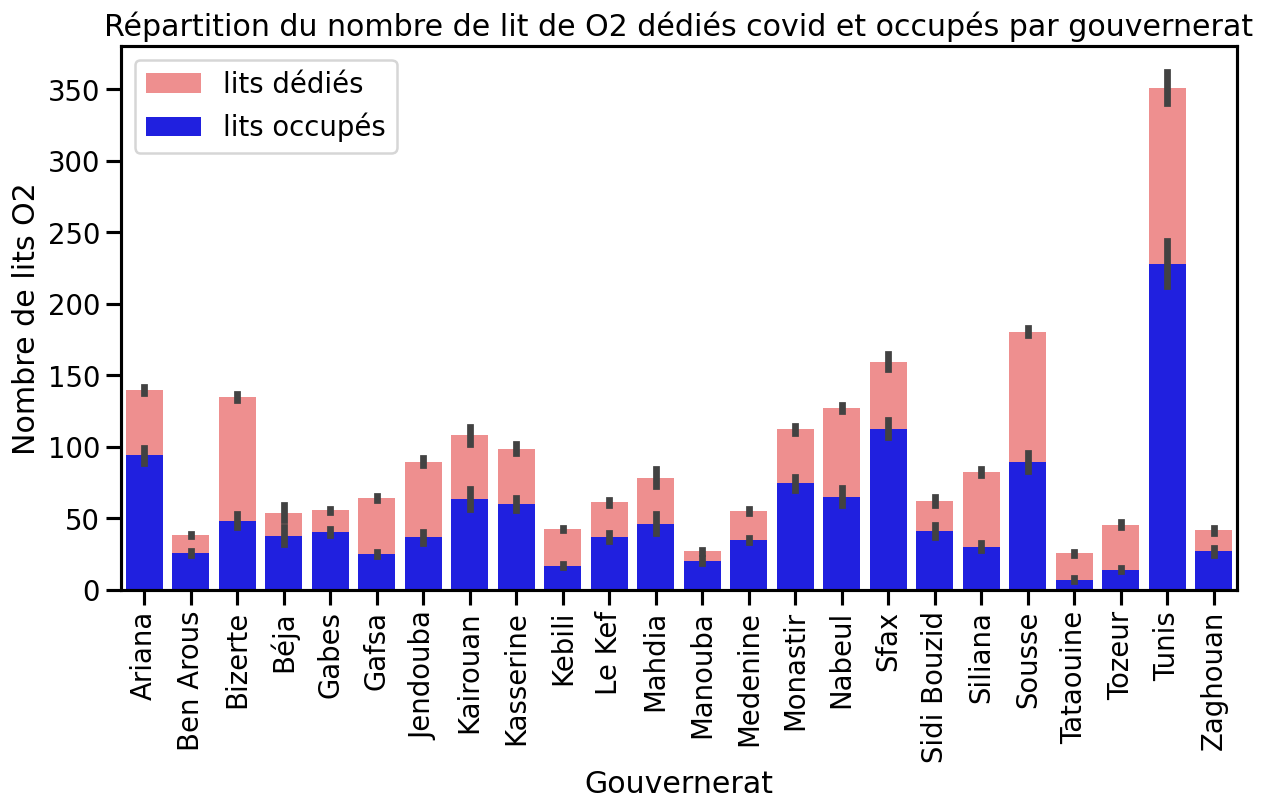

In [85]:
#sns.set_style("whitegrid") 

sns.set_style(style=None, rc=None )
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

#sns.scaterplot(data = df_Reg['lits_o2_occ'], marker='o', ax=ax1, label='Lits O2 occupés')
#ax2 = ax1.twinx()

sns.barplot(data = df_Reg, x='Gov', y='lits_o2',alpha=0.5, ax=ax1,label='lits dédiés',color='r')
sns.barplot(data = df_Reg, x='Gov', y='lits_o2_occ',alpha=1, ax=ax1,label='lits occupés',color='b')

ax1.set_title('Répartition du nombre de lit de O2 dédiés covid et occupés par gouvernerat');
ax1.set_xlabel('Gouvernerat')
ax1.set_ylabel('Nombre de lits O2');
plt.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90) 
plt.show() 
ax1.figure.savefig('o2_occ_gov_nov.png')

In [86]:
df_Reg_sum=df_Reg.sum().to_frame().transpose()

In [87]:
df_Reg_sum

lits_rea  lits_rea_occ  lits_rea_disp   lits_o2  lits_o2_occ  lits_o2_disp  \
0   74955.0       61192.0        13763.0  445651.0     253357.0      192288.0   

    z_tamp  
0  29432.0

In [88]:
d=df_Reg.sum().to_frame()

In [89]:
d.columns=['number']

In [90]:
d=d.reset_index().drop([1,2,4,5,6])

In [91]:
d

index    number
0  lits_rea   74955.0
3   lits_o2  445651.0

In [92]:
d2=df_Reg.sum().to_frame()

In [93]:
d2=d2.reset_index().drop([0,2,3,5,6])

In [94]:
d2.columns=["index","number"]

In [95]:
d2

index    number
1  lits_rea_occ   61192.0
4   lits_o2_occ  253357.0

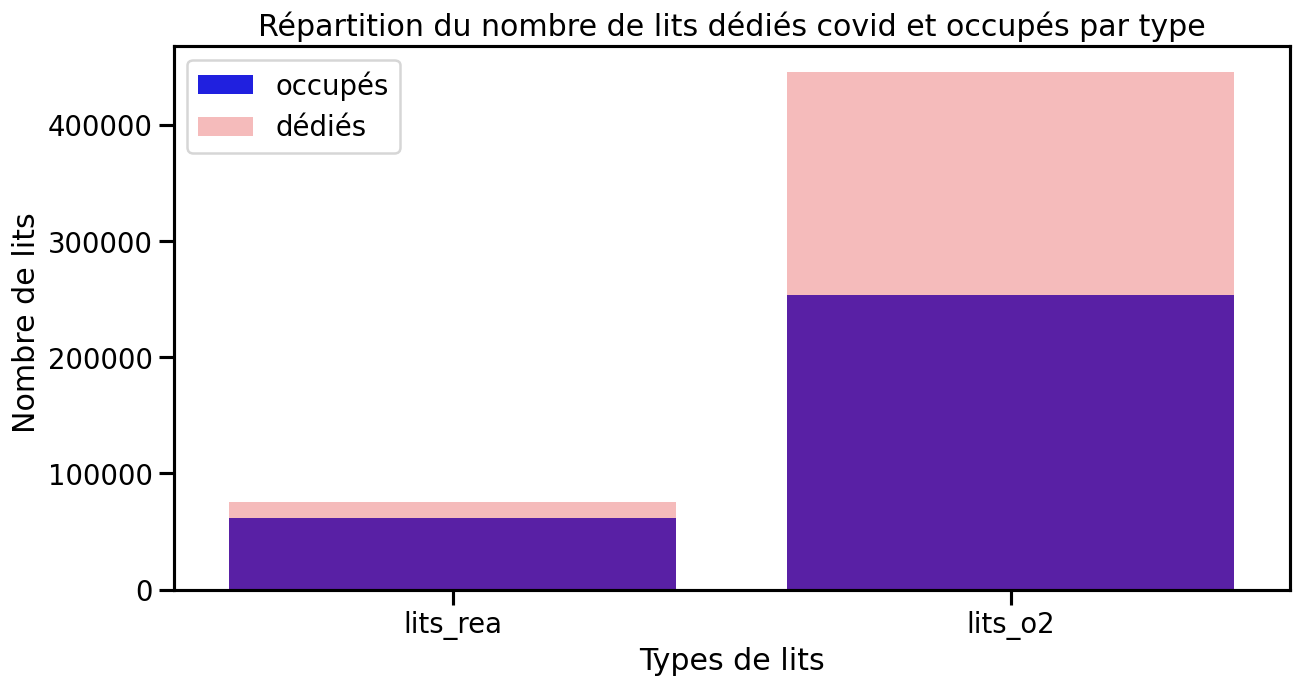

In [96]:
#sns.set_style("whitegrid") 

sns.set_style(style=None, rc=None )
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data = d2, x='index', y='number',alpha=1, ax=ax1,label='occupés',color='b')
sns.barplot(data = d, x='index', y='number',alpha=0.3, ax=ax1,label='dédiés',color='r')


ax1.set_title('Répartition du nombre de lits dédiés covid et occupés par type');
ax1.set_xlabel('Types de lits')
ax1.set_ylabel('Nombre de lits ');
plt.legend()
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90) 
plt.show() 
#ax1.figure.savefig('o2_occ_gov_nov.png')'''

In [97]:
df_R=df_Reg.groupby('Gov').sum().drop('z_tamp',axis=1)

In [98]:
df_R=df_R.reset_index()

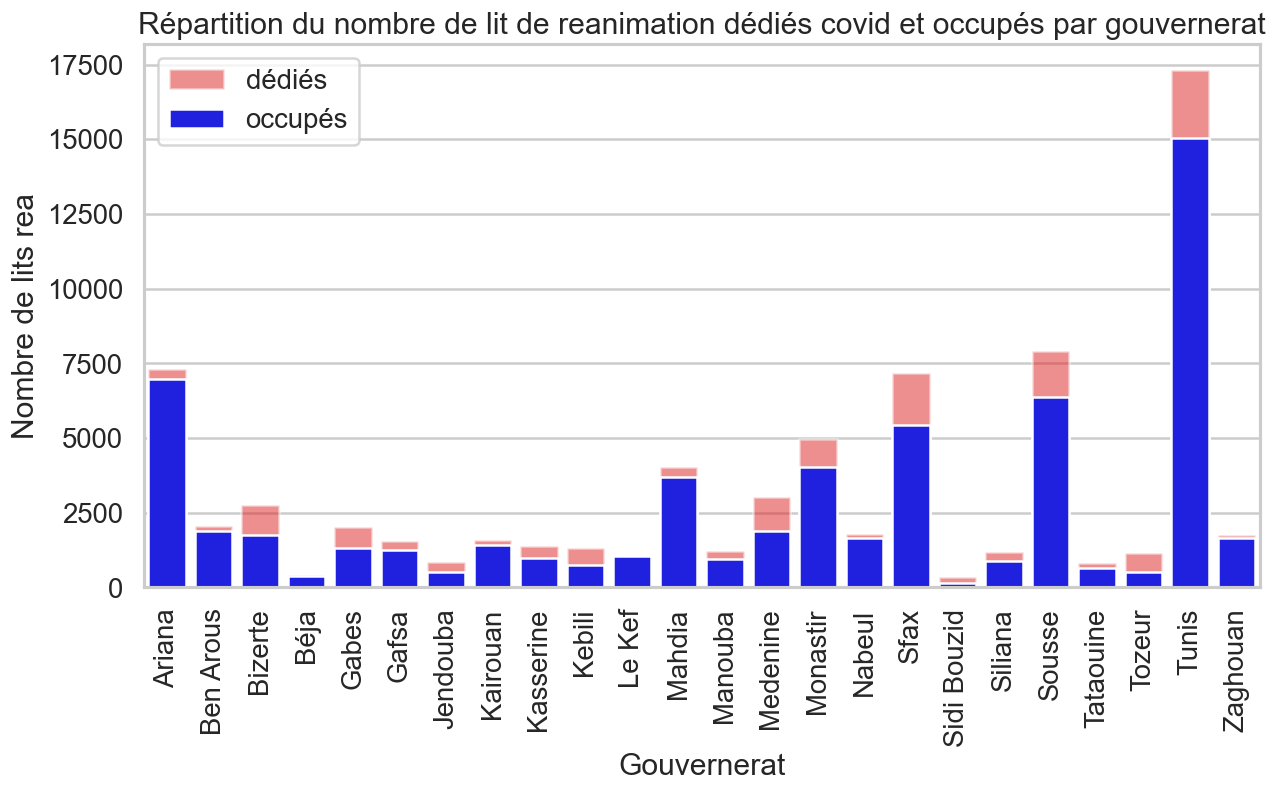

In [99]:
sns.set_style("whitegrid") 

sns.set_style(style=None, rc=None )
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

#sns.scaterplot(data = df_Reg['lits_o2_occ'], marker='o', ax=ax1, label='Lits O2 occupés')
#ax2 = ax1.twinx()

sns.barplot(data = df_R, x='Gov', y='lits_rea',alpha=0.5, ax=ax1,label='dédiés',color='r')
sns.barplot(data = df_R, x='Gov', y='lits_rea_occ',alpha=1, ax=ax1,label='occupés',color='b')


ax1.set_title('Répartition du nombre de lit de reanimation dédiés covid et occupés par gouvernerat');
ax1.set_xlabel('Gouvernerat')
ax1.set_ylabel('Nombre de lits rea');
plt.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90) 
plt.show() 
#plt.savefig('rea_occ_gov_nov.png')

In [100]:
#df_Reg=df_Reg.set_index('Gov')
#df_melt = pd.melt(df_R.reset_index(), id_vars=['Gov'], value_vars=['lits_rea', 'lits_rea_occ','lits_o2', 'lits_o2_occ'])
#df_melt.columns = ['Gov', 'type_lits', 'nombre'] 
#df_l=df_melt.groupby(["Gov","type_lits"]).sum()
#df_l=df_l.reset_index()
#df_l=df_l.set_index('type_lits')
#df_l1=df_l.drop(['lits_o2','lits_rea'],axis=0)
#df_l1=df_l1.reset_index()
#df_l2=df_l.drop(['lits_o2_occ','lits_rea_occ'],axis=0)
#df_l2=df_l2.reset_index()
#df_l1=df_l1.set_index('Gov')
#df_l2=df_l2.set_index('Gov')

In [101]:
#cond_plot = sns.FacetGrid(data=df_l, col='Gov',col_wrap=4)

#cond_plot.map(sns.barplot,data=df_l1,x="type_lits",y="nombre",alpha=0.5,color='red');
#cond_plot.map(sns.barplot,data=df_l2,x="type_lits",y="nombre",alpha=0.5,color='blue');
#plt.legend()



In [102]:
df_R

Gov  lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  lits_o2_occ  \
0        Ariana    7315.0        6968.0          347.0  27985.0      18839.0   
1     Ben Arous    2056.0        1879.0          177.0   7658.0       5072.0   
2       Bizerte    2764.0        1759.0         1005.0  26993.0       9587.0   
3          Béja     421.0         380.0           41.0  10822.0       7554.0   
4         Gabes    2008.0        1317.0          691.0  11114.0       8049.0   
5         Gafsa    1540.0        1239.0          301.0  12852.0       4979.0   
6      Jendouba     835.0         517.0          318.0  17992.0       7328.0   
7      Kairouan    1581.0        1412.0          169.0  21711.0      12731.0   
8     Kasserine    1398.0         975.0          423.0  19781.0      12049.0   
9        Kebili    1303.0         765.0          538.0   8549.0       3322.0   
10       Le Kef    1041.0        1053.0          -12.0  12250.0       7378.0   
11       Mahdia    4026.0        3689.0          337.0  15695.0       9141.0   
12      Manouba    1205.0         953.0          252.0   5362.0       4070.0   
13     Medenine    3024.0        1893.0         1131.0  10984.0       6910.0   
14     Monastir    4955.0        4038.0          917.0  22515.0      14944.0   
15       Nabeul    1794.0        1669.0          125.0  25483.0      13024.0   
16         Sfax    7190.0        5436.0         1754.0  29621.0      20888.0   
17  Sidi Bouzid     356.0         138.0          218.0  12468.0       8235.0   
18      Siliana    1180.0         870.0          310.0  16524.0       6037.0   
19       Sousse    7906.0        6375.0         1531.0  36219.0      17942.0   
20    Tataouine     816.0         645.0          171.0   5094.0       1397.0   
21       Tozeur    1161.0         526.0          635.0   9127.0       2793.0   
22        Tunis   17329.0       15048.0         2281.0  70530.0      45719.0   
23     Zaghouan    1751.0        1648.0          103.0   8322.0       5369.0   

    lits_o2_disp  
0         9146.0  
1         2586.0  
2        17406.0  
3         3268.0  
4         3065.0  
5         7873.0  
6        10664.0  
7         8978.0  
8         7732.0  
9         5227.0  
10        4872.0  
11        6554.0  
12        1292.0  
13        4074.0  
14        7571.0  
15       12459.0  
16        8733.0  
17        4233.0  
18       10483.0  
19       18277.0  
20        3697.0  
21        6334.0  
22       24811.0  
23        2953.0

<ipython-input-103-e09f2a8ad007>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(6,4))


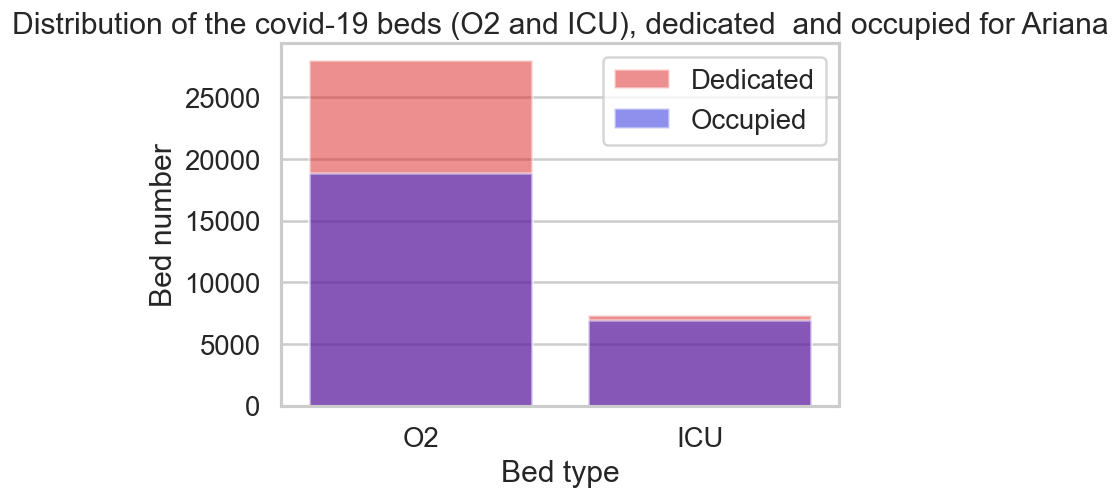

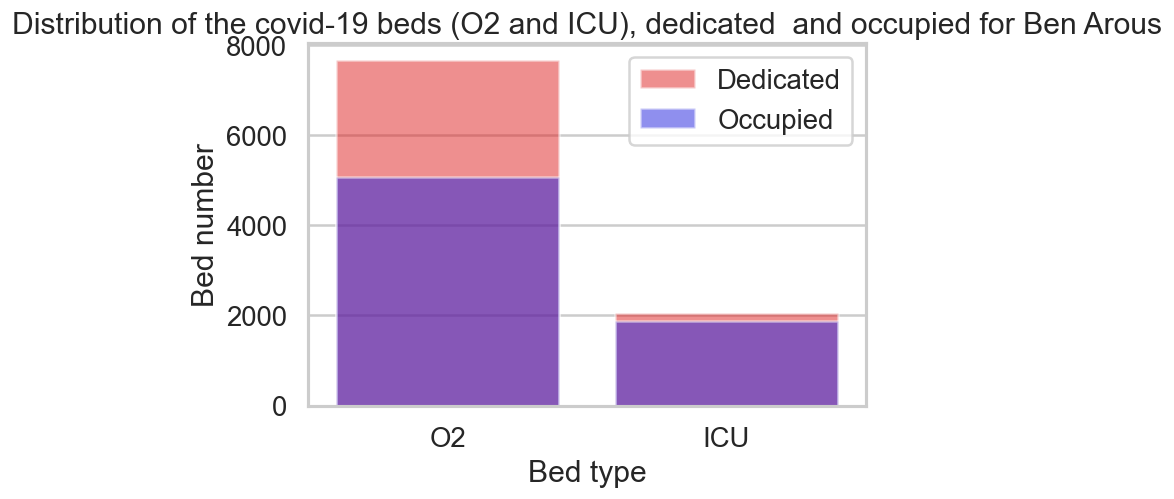

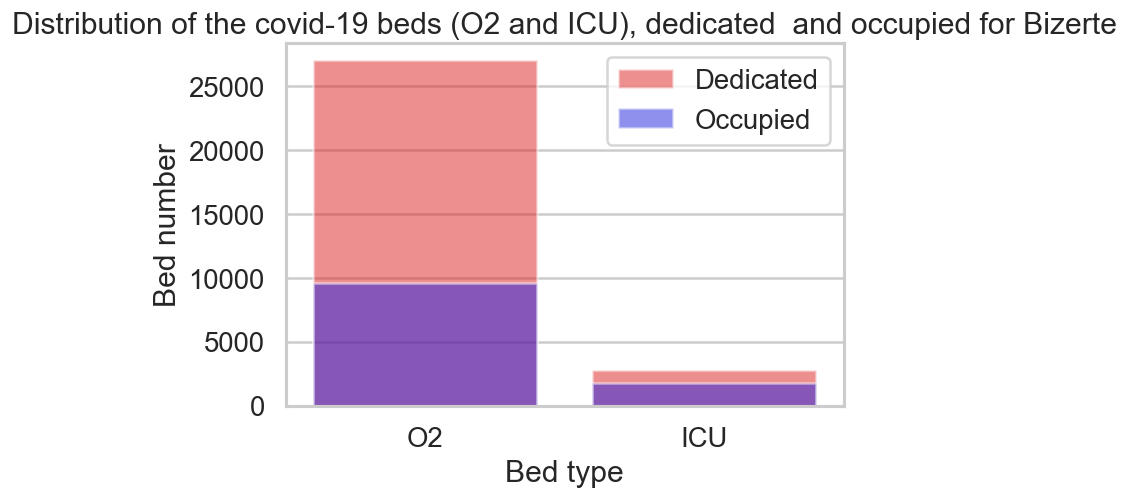

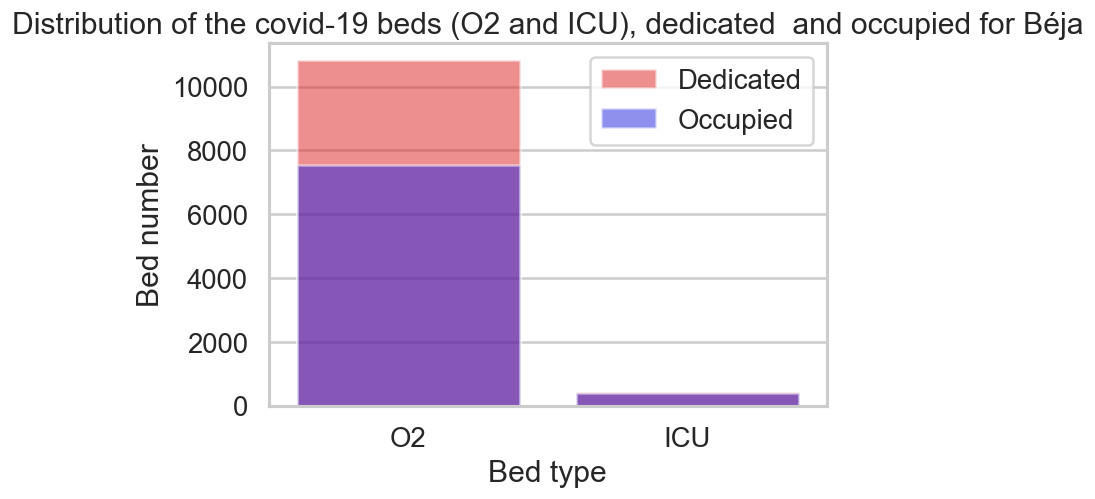

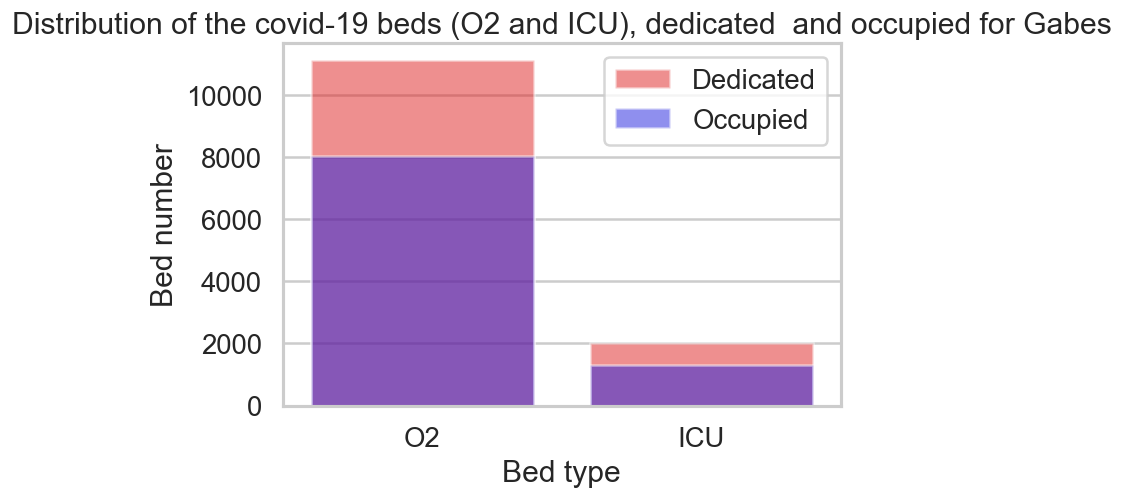

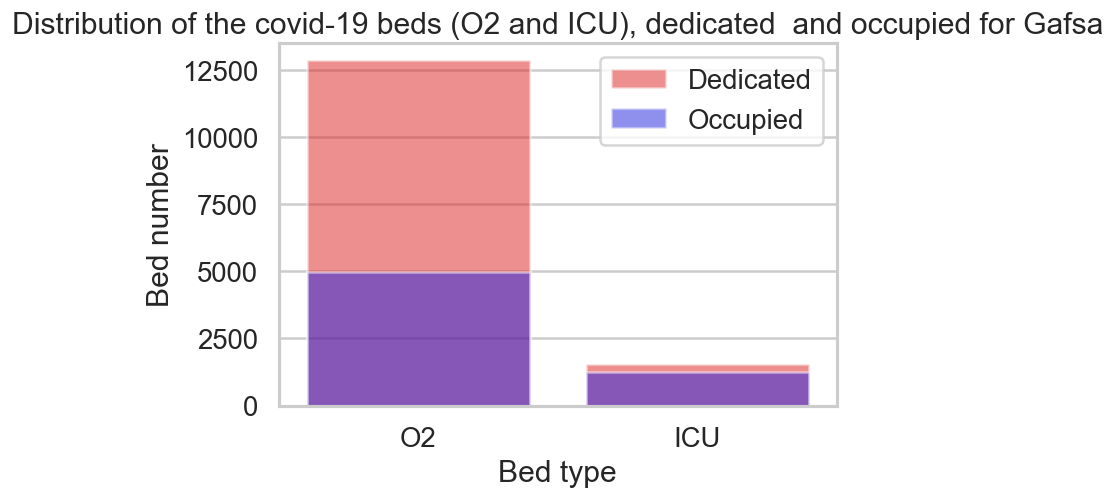

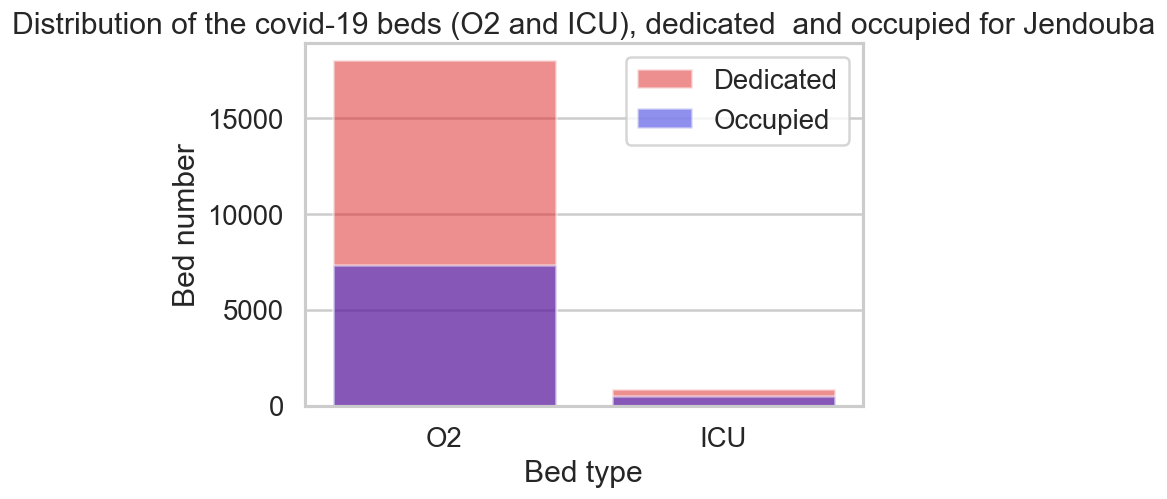

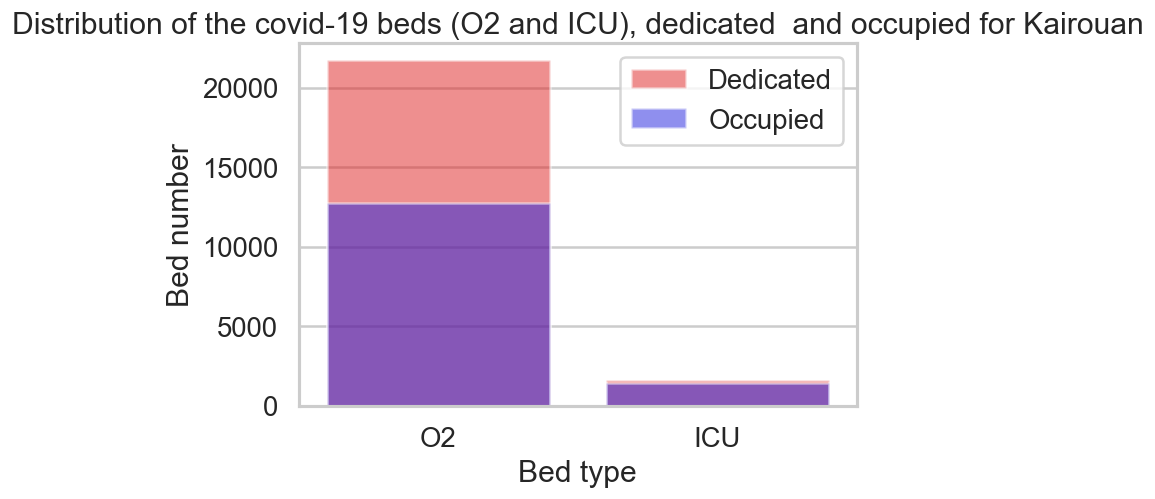

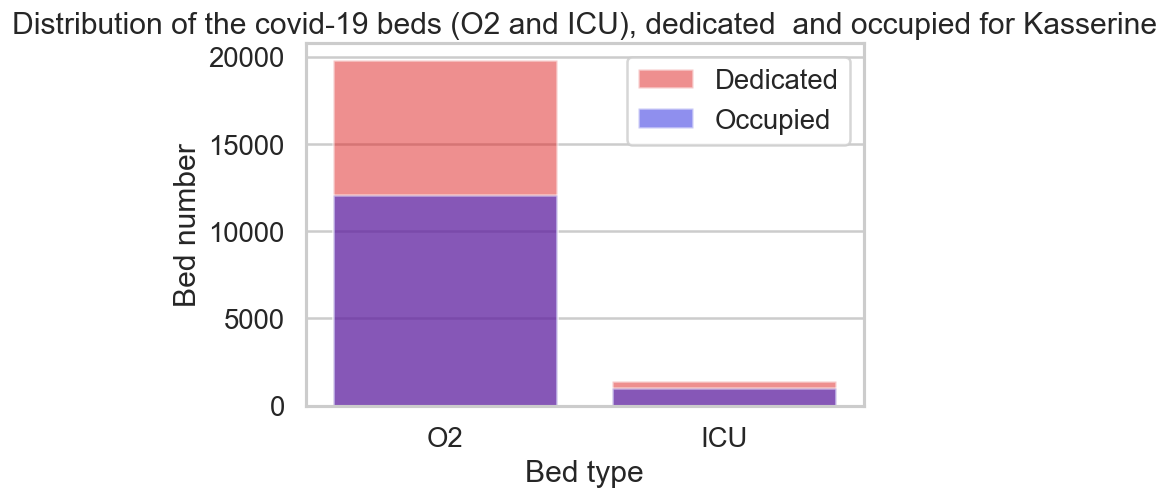

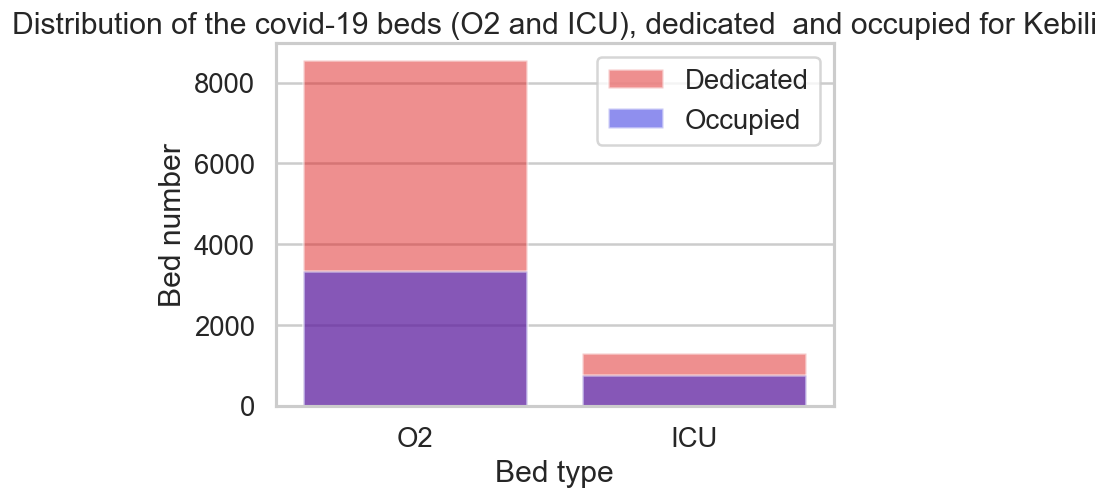

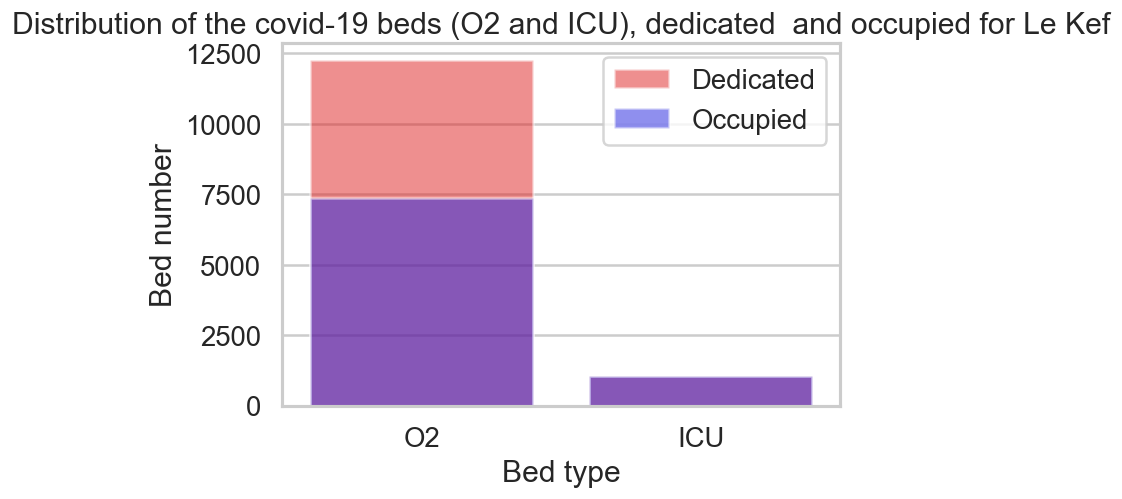

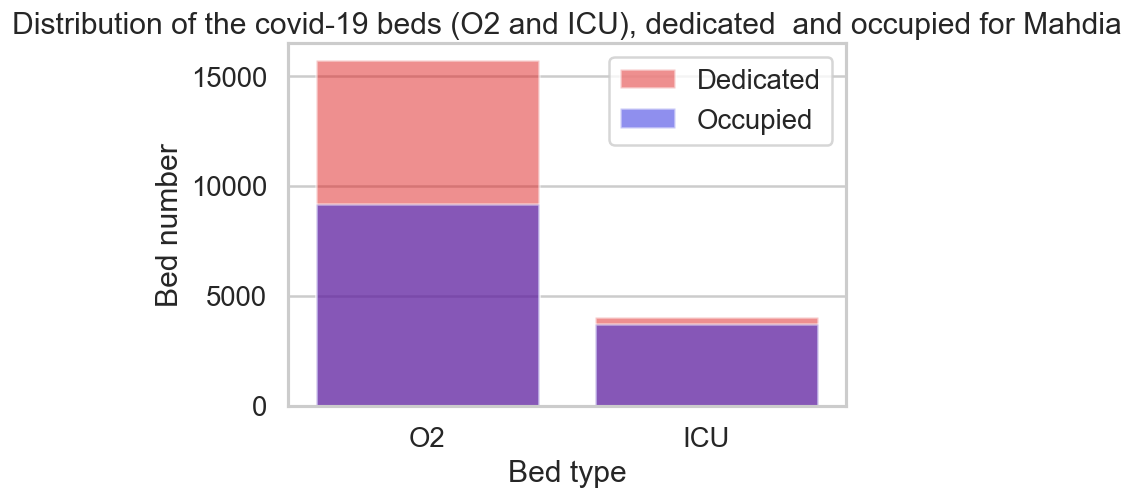

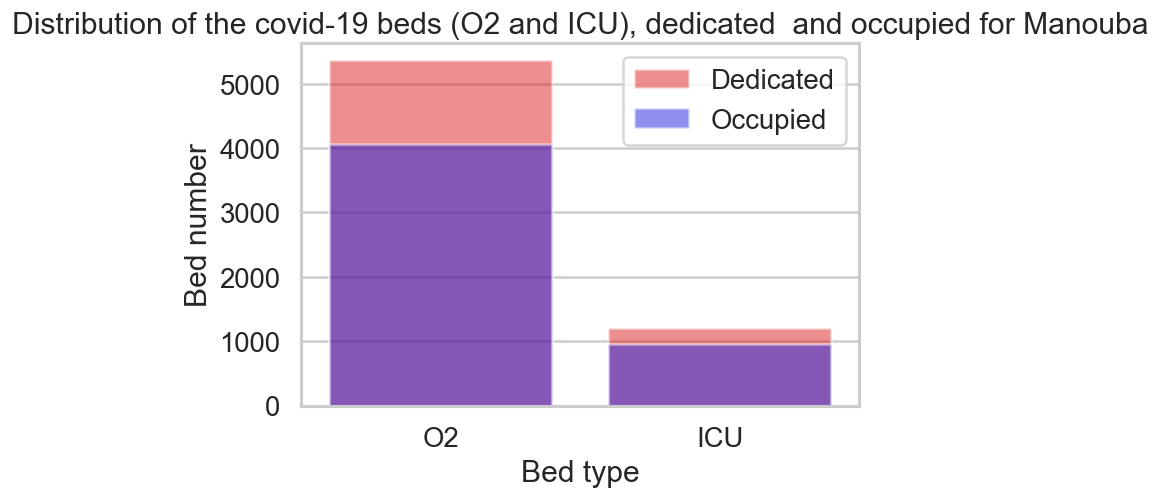

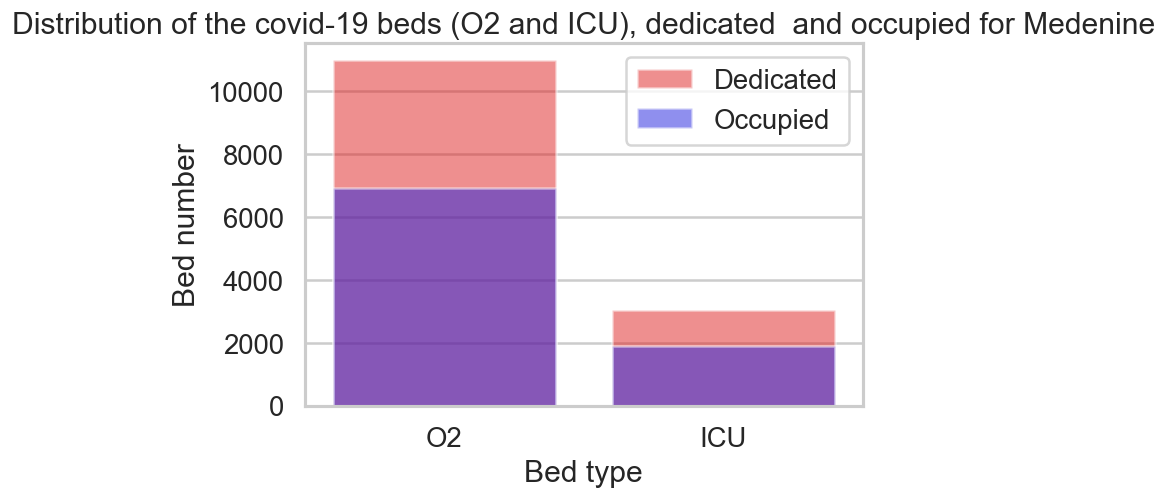

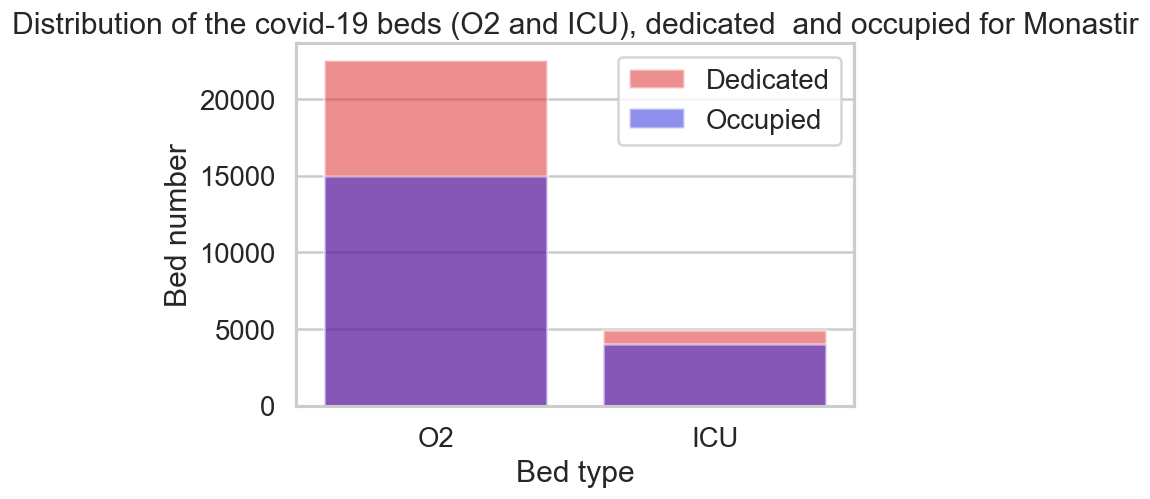

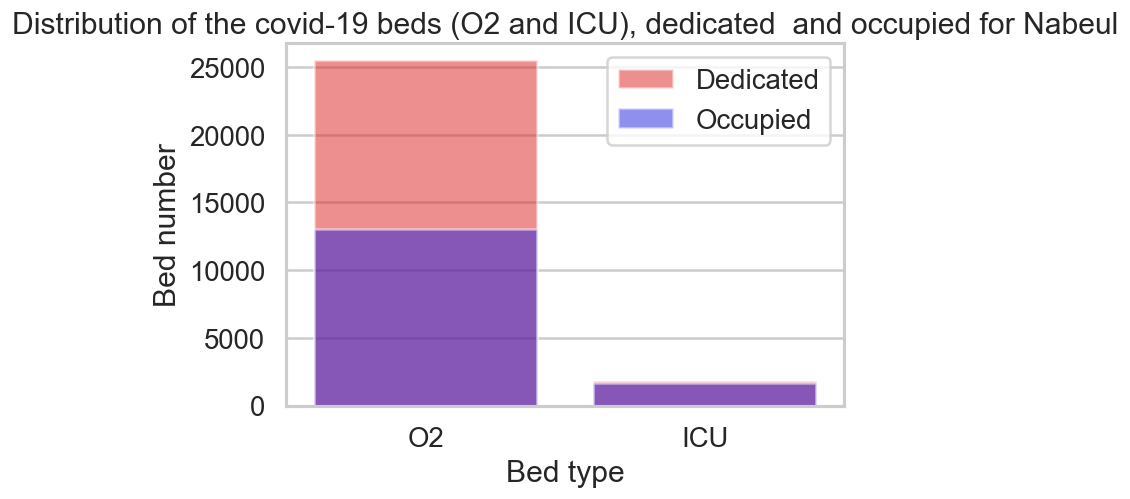

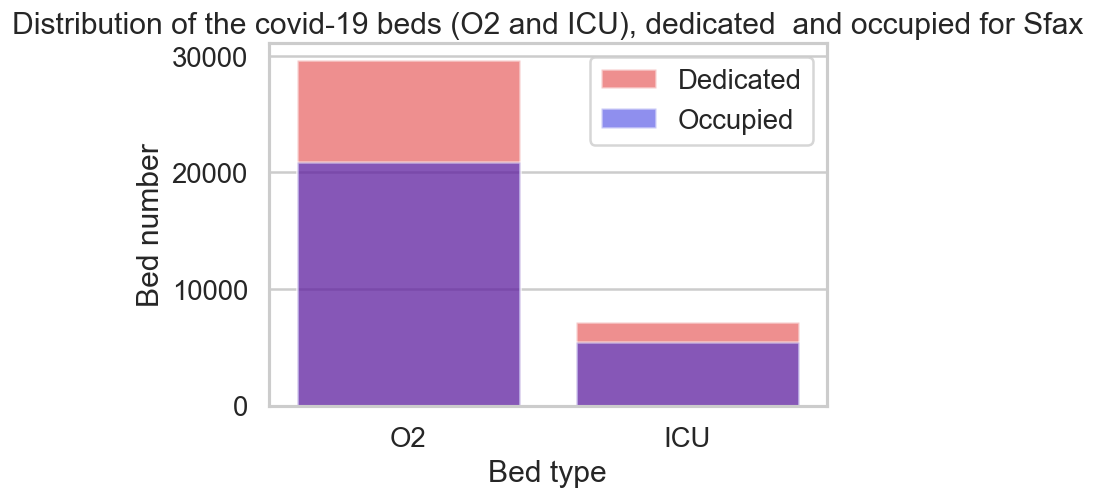

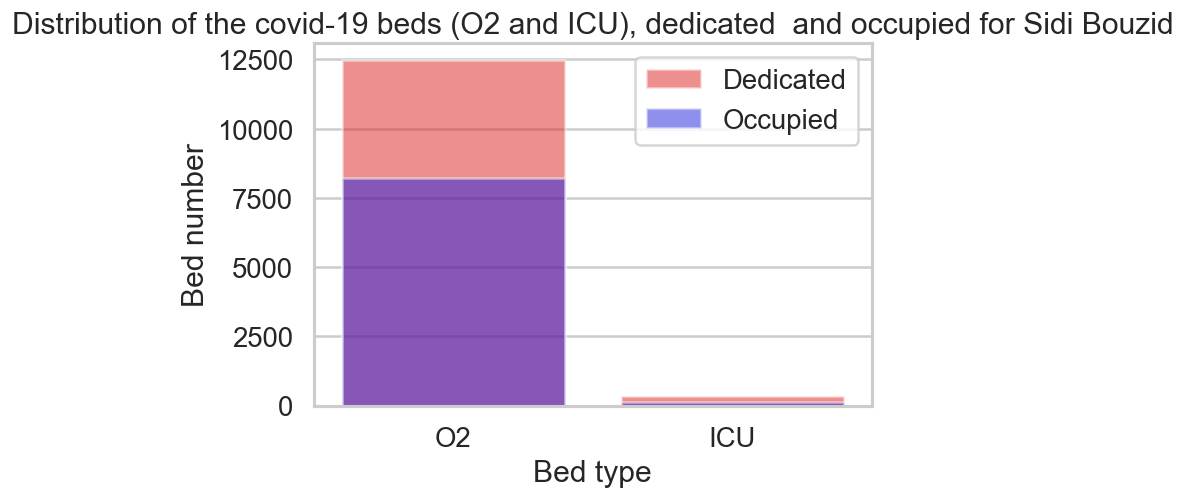

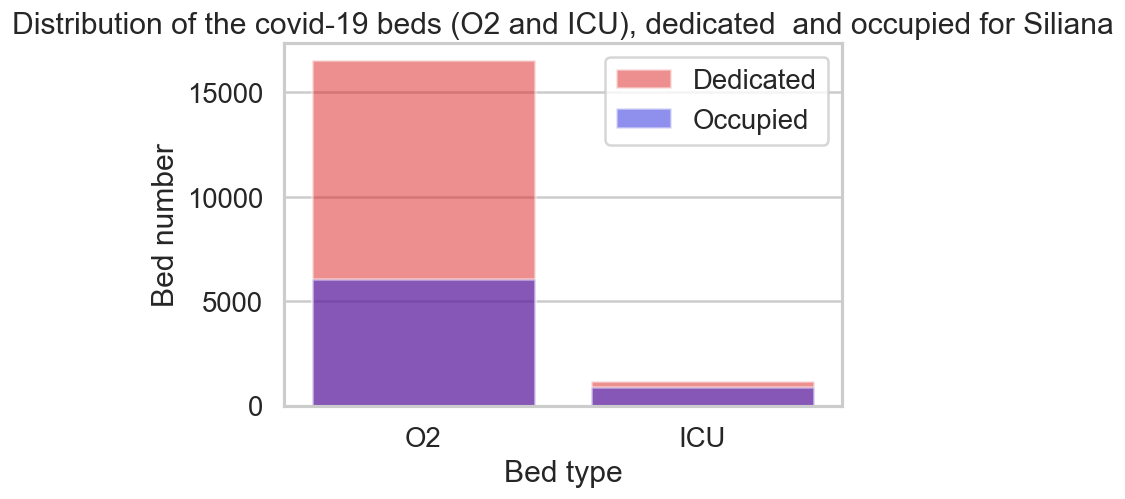

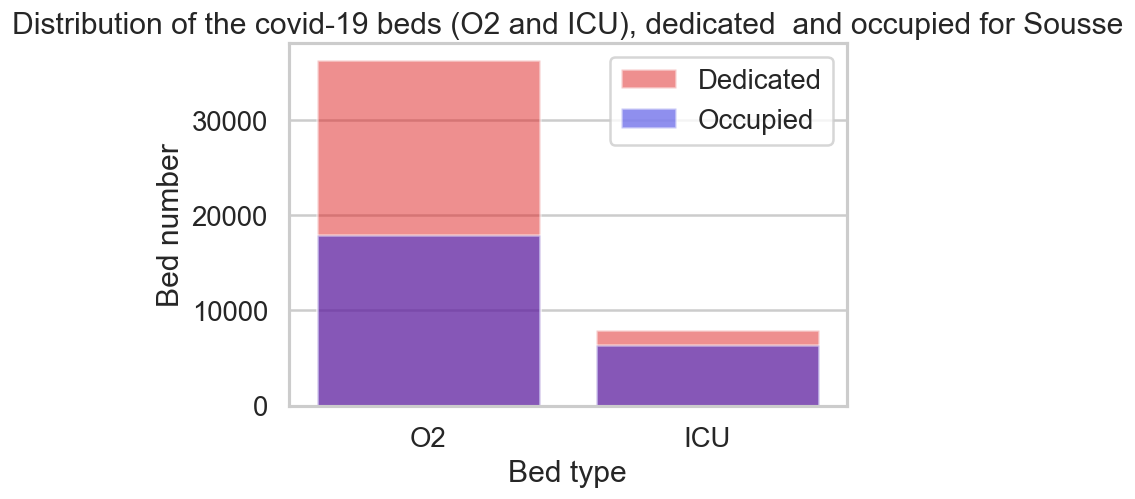

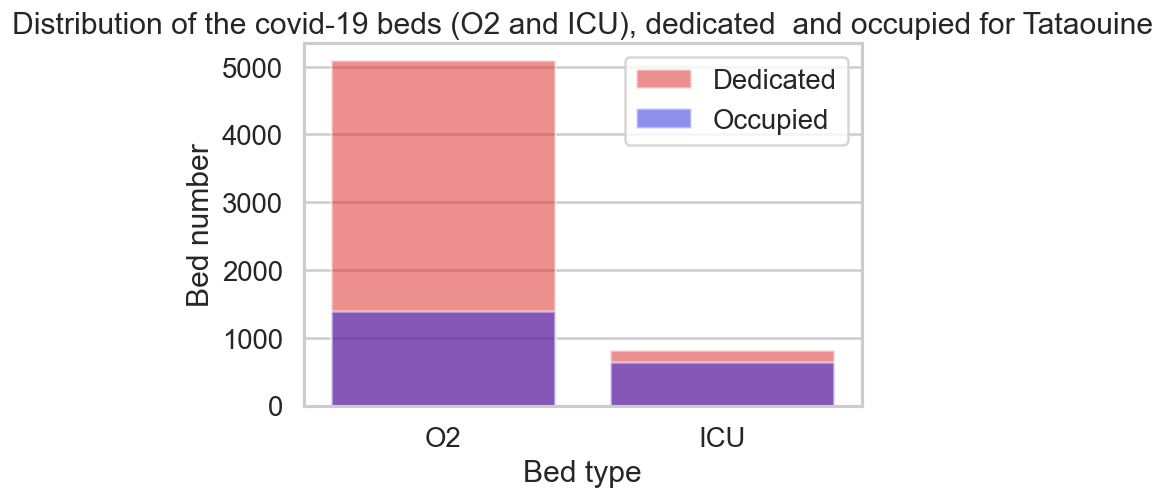

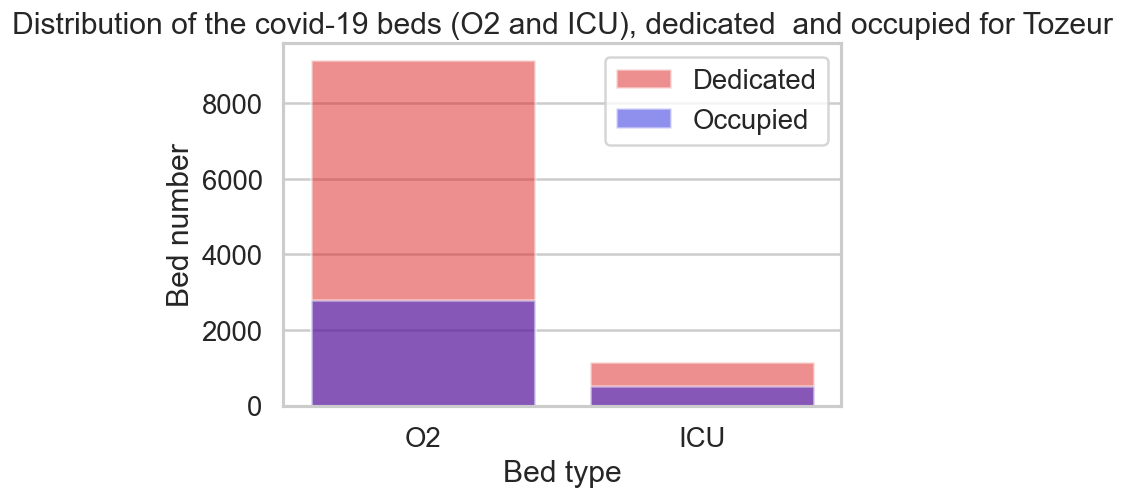

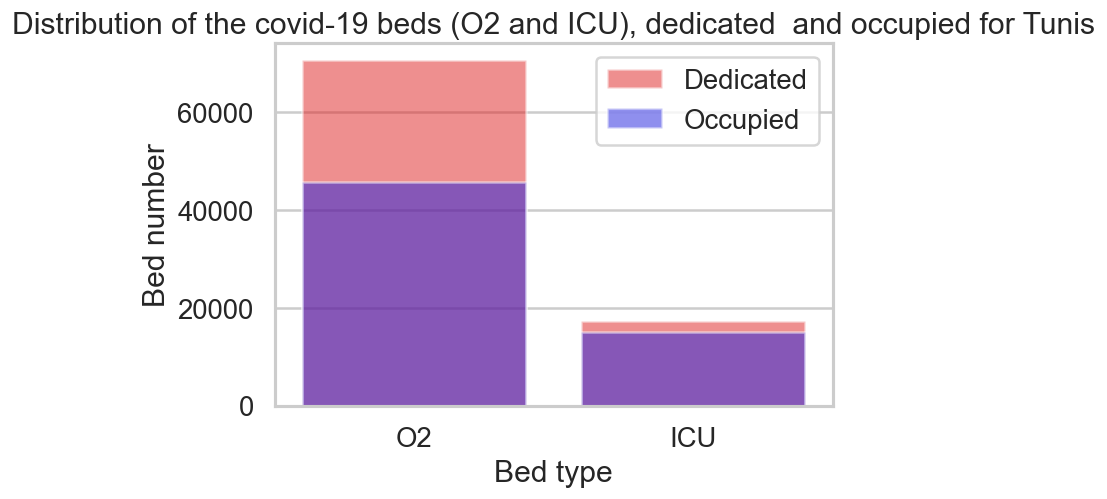

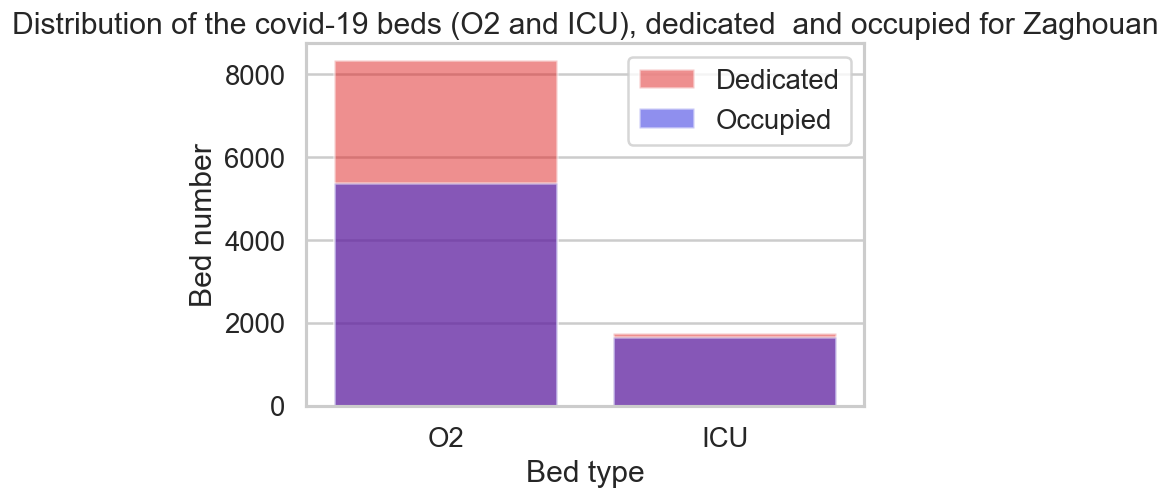

In [103]:
for i in range (24) :
    
    fig, ax1 = plt.subplots(figsize=(6,4))
    df=df_R.iloc[i]
    df=df.to_frame().transpose()
    sns.barplot(data = df, order=['lits_o2','lits_rea'],alpha=0.5, ax=ax1,label='Dedicated',color='red')
    sns.barplot(data = df, order=['lits_o2_occ','lits_rea_occ'],alpha=0.5, ax=ax1,label='Occupied',color='blue')
    ax1.set_title('Distribution of the covid-19 beds (O2 and ICU), dedicated  and occupied for ' + df_R.Gov[i]);
    ax1.set_xticklabels(['O2', 'ICU'])
    ax1.set_xlabel('Bed type')
    ax1.set_ylabel('Bed number')
    plt.legend()

### Evolution du nombre de réanimation  disponibles par gouvernerat

In [104]:
ddf = pd.read_excel("C:\\Users\\amrou\\Downloads\\stage\\hopit_clin.xlsx", 'Hopitaux')
ddf['Date'] = ddf['Date'].apply(dateutil.parser.parse, dayfirst=True)
ddf['Struct'] = ddf['Struct'].astype('category')
df_2 = pd.DataFrame(ddf.groupby(['Date','Gov']).sum())
ddf.set_index('Date', inplace=True)
df_2
df_2.reset_index(inplace= True)

In [105]:
df_2

Date        Gov  lits_rea  lits_rea_occ  lits_rea_disp  lits_o2  \
0    2021-01-01     Ariana        21            17              4      126   
1    2021-01-01  Ben Arous         8             7              1       37   
2    2021-01-01    Bizerte        14             3             11      145   
3    2021-01-01       Béja         2             2              0       39   
4    2021-01-01      Gabes        10             3              7       46   
...         ...        ...       ...           ...            ...      ...   
4804 2021-07-20     Sousse        49            44              5      239   
4805 2021-07-20  Tataouine         6            10             -4       69   
4806 2021-07-20     Tozeur         5             4              1       48   
4807 2021-07-20      Tunis       127           124              3      666   
4808 2021-07-20   Zaghouan        10            10              0       80   

      lits_o2_occ  lits_o2_disp  z_tamp  
0              65            61       0  
1              18            19       0  
2              37           108      14  
3              13            26       0  
4              40             6       1  
...           ...           ...     ...  
4804          155            84      19  
4805           38            31       0  
4806           23            25       4  
4807          574            92      25  
4808           75             5      12  

[4809 rows x 9 columns]

In [106]:
df_2[["lits_rea","lits_rea_occ","lits_rea_disp","lits_o2","lits_o2_occ","lits_o2_disp"]]=df_2[["lits_rea","lits_rea_occ","lits_rea_disp","lits_o2","lits_o2_occ","lits_o2_disp"]].rolling(6).mean().fillna(0)

In [107]:
df_2

Date        Gov   lits_rea  lits_rea_occ  lits_rea_disp  \
0    2021-01-01     Ariana   0.000000      0.000000       0.000000   
1    2021-01-01  Ben Arous   0.000000      0.000000       0.000000   
2    2021-01-01    Bizerte   0.000000      0.000000       0.000000   
3    2021-01-01       Béja   0.000000      0.000000       0.000000   
4    2021-01-01      Gabes   0.000000      0.000000       0.000000   
...         ...        ...        ...           ...            ...   
4804 2021-07-20     Sousse  22.333333     20.666667       1.666667   
4805 2021-07-20  Tataouine  19.500000     18.833333       0.666667   
4806 2021-07-20     Tozeur  14.000000     13.333333       0.666667   
4807 2021-07-20      Tunis  33.500000     32.500000       1.000000   
4808 2021-07-20   Zaghouan  34.166667     33.166667       1.000000   

         lits_o2  lits_o2_occ  lits_o2_disp  z_tamp  
0       0.000000     0.000000      0.000000       0  
1       0.000000     0.000000      0.000000       0  
2       0.000000     0.000000      0.000000      14  
3       0.000000     0.000000      0.000000       0  
4       0.000000     0.000000      0.000000       1  
...          ...          ...           ...     ...  
4804  147.833333   135.666667     12.166667      19  
4805  148.833333   131.000000     17.833333       0  
4806  127.000000   106.333333     20.666667       4  
4807  209.666667   167.500000     42.166667      25  
4808  207.833333   157.666667     50.166667      12  

[4809 rows x 9 columns]

In [108]:
df_Reg=df_2
df_Reg.reset_index(inplace= True)
df_norm=pd.DataFrame()
df_norm["Gov"]=df_Reg["Gov"]
df_norm["Date"]=df_Reg["Date"]
df_norm["lits_rea"]=df_Reg["lits_rea"]/df_Reg["lits_rea"].max()
df_norm["lits_rea_occ"]=df_Reg["lits_rea_occ"]/df_Reg["lits_rea_occ"].max()
df_norm["lits_rea_disp"]=df_Reg["lits_rea_disp"]/df_Reg["lits_rea_disp"].max()
df_norm["lits_o2"]=df_Reg["lits_o2"]/df_Reg["lits_o2"].max()
df_norm["lits_o2_occ"]=df_Reg["lits_o2_occ"]/df_Reg["lits_o2_occ"].max()
df_norm["lits_o2_disp"]=df_Reg["lits_o2_disp"]/df_Reg["lits_o2_disp"].max()

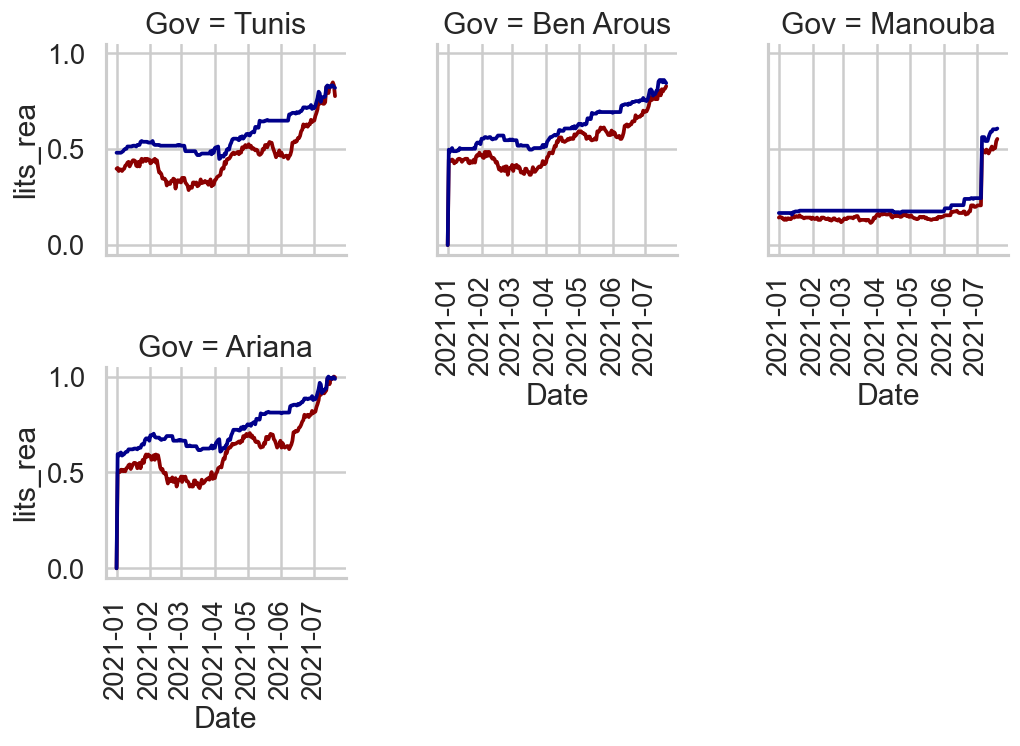

In [109]:
df_t1=df_norm[df_norm.Gov=='Tunis']
df_t2=df_norm[df_norm.Gov=='Ben Arous']
df_t3=df_norm[df_norm.Gov=='Manouba']
df_t4=df_norm[df_norm.Gov=='Ariana']
df_tunis=pd.DataFrame()
df_tunis=df_tunis.append(df_t1)
df_tunis=df_tunis.append(df_t2)
df_tunis=df_tunis.append(df_t3)
df_tunis=df_tunis.append(df_t4)
cond_plot = sns.FacetGrid(data=df_tunis, col='Gov',col_wrap=3)

cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

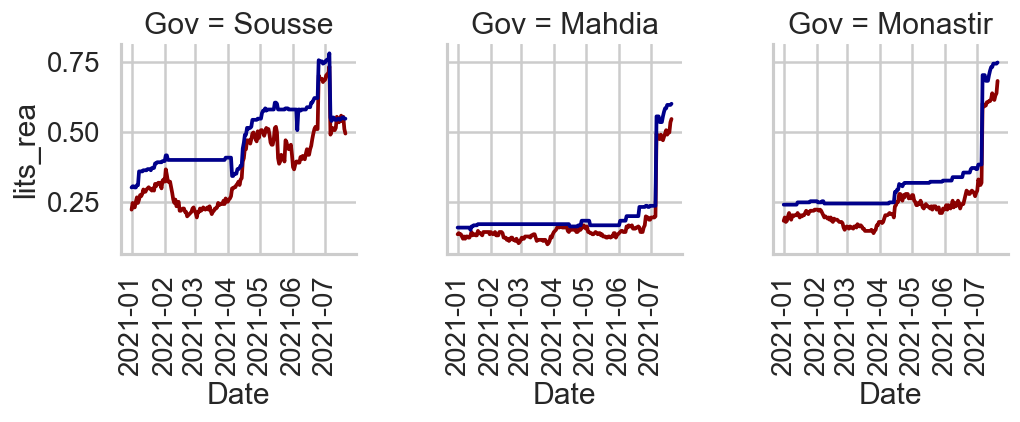

In [110]:
df_s1=df_norm[df_norm.Gov=='Sousse']
df_s2=df_norm[df_norm.Gov=='Mahdia']
df_s3=df_norm[df_norm.Gov=='Monastir']
df_sahel=pd.DataFrame()
df_sahel=df_sahel.append(df_s1)
df_sahel=df_sahel.append(df_s2)
df_sahel=df_sahel.append(df_s3)
cond_plot = sns.FacetGrid(data=df_sahel, col='Gov',col_wrap=3)

cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

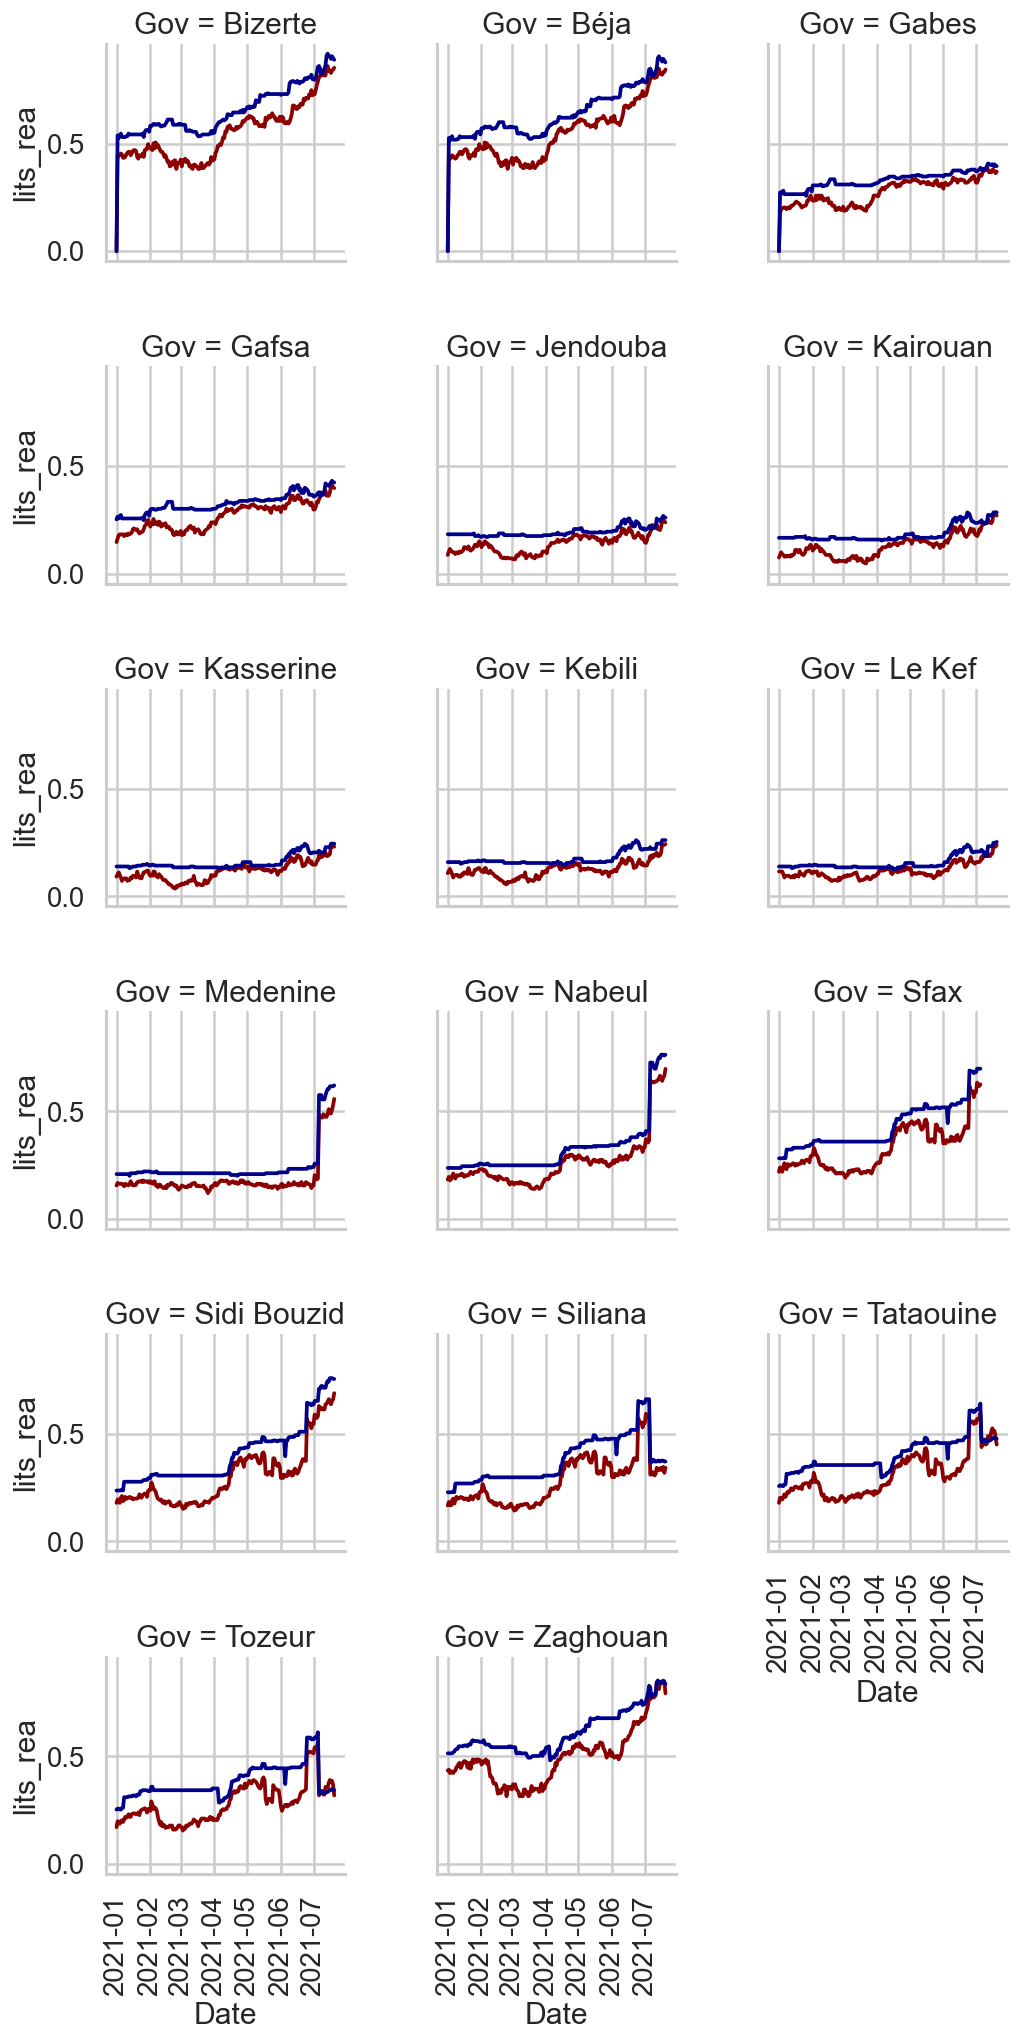

In [111]:
df_norm=df_norm.set_index('Gov')
df_norm_rest=df_norm.drop(['Ariana','Tunis','Ben Arous','Manouba','Sousse','Monastir','Mahdia'])
df_norm_rest=df_norm_rest.reset_index()
cond_plot = sns.FacetGrid(data=df_norm_rest, col='Gov',col_wrap=3)
cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

In [112]:
Govs = df_2['Gov'].drop_duplicates()

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

df_2_interv100_p = df_2[df_2['lits_rea'] > 100]
Govs_100_p = df_2_interv100_p['Gov'].drop_duplicates()
set1 = set(Govs)
set2 = set(Govs_100_p)
listGovs_100_p = set(Govs_100_p)
res_not_100_p = list(set1 - set2)

df_2_interv100 = df_2[(df_2['lits_rea'] <= 100) & (df_2['lits_rea'] > 50)]
Govs_100 = df_2_interv100['Gov'].drop_duplicates()
set1 = set(res_not_100_p)
set2 = set(Govs_100)
listGovs_100 = set(intersection(set1, set2))
res_not_100 = list(set1 - set2)

df_2_interv50 = df_2[(df_2['lits_rea'] <= 50) & (df_2['lits_rea'] > 25)]
Govs_50 = df_2_interv50['Gov'].drop_duplicates()
set1 = set(res_not_100)
set2 = set(Govs_50)
listGovs_50 = set(intersection(set1, set2))
res_not_50 = list(set1 - set2)

df_2_interv25 = df_2[(df_2['lits_rea'] <= 25) & (df_2['lits_rea'] > 10)]
Govs_25 = df_2_interv25['Gov'].drop_duplicates()
set1 = set(res_not_50)
set2 = set(Govs_25)
listGovs_25 = set(intersection(set1, set2))
res_not_25 = list(set1 - set2)

df_2_interv10 = df_2[df_2['lits_rea'] <= 10]
Govs_10 = df_2_interv10['Gov'].drop_duplicates()
set1 = set(res_not_25)
set2 = set(Govs_10)
listGovs_10 = set(intersection(set1, set2))


df_2_100_p = df_2[df_2['Gov'].isin(listGovs_100_p)]
df_2_100 = df_2[df_2['Gov'].isin(listGovs_100)]
df_2_50 = df_2[df_2['Gov'].isin(listGovs_50)]
df_2_25 = df_2[df_2['Gov'].isin(listGovs_25)]
df_2_10 = df_2[df_2['Gov'].isin(listGovs_10)]

############################################################################################

df_2_interv50_test = df_2[df_2['lits_rea'] > 25]
Govs_50_test = df_2_interv50_test['Gov'].drop_duplicates()
set1 = set(Govs)
set2 = set(Govs_50_test)
listGovs_50_test = set(intersection(set1, set2))
res_not_50_test = list(set1 - set2)

df_2_interv25_test = df_2[(df_2['lits_rea'] <= 25) & (df_2['lits_rea'] > 10)]
Govs_25_test = df_2_interv25_test['Gov'].drop_duplicates()
set1 = set(res_not_50_test)
set2 = set(Govs_25_test)
listGovs_25_test = set(intersection(set1, set2))
res_not_25_test = list(set1 - set2)

df_2_interv10_test = df_2[df_2['lits_rea'] <= 10]
Govs_10_test = df_2_interv10_test['Gov'].drop_duplicates()
set1 = set(res_not_25_test)
set2 = set(Govs_10_test)
listGovs_10_test = set(intersection(set1, set2))

df_2_50_test = df_2[df_2['Gov'].isin(listGovs_50_test)]
df_2_25_test = df_2[df_2['Gov'].isin(listGovs_25_test)]
df_2_10_test = df_2[df_2['Gov'].isin(listGovs_10_test)]

#NOT en cas de necessite de drop
#not_df_2_100_p = df_2[~df_2['Gov'].isin(listGovs_100_p)]

Govs_50_test

TypeError: 'list' object is not callable

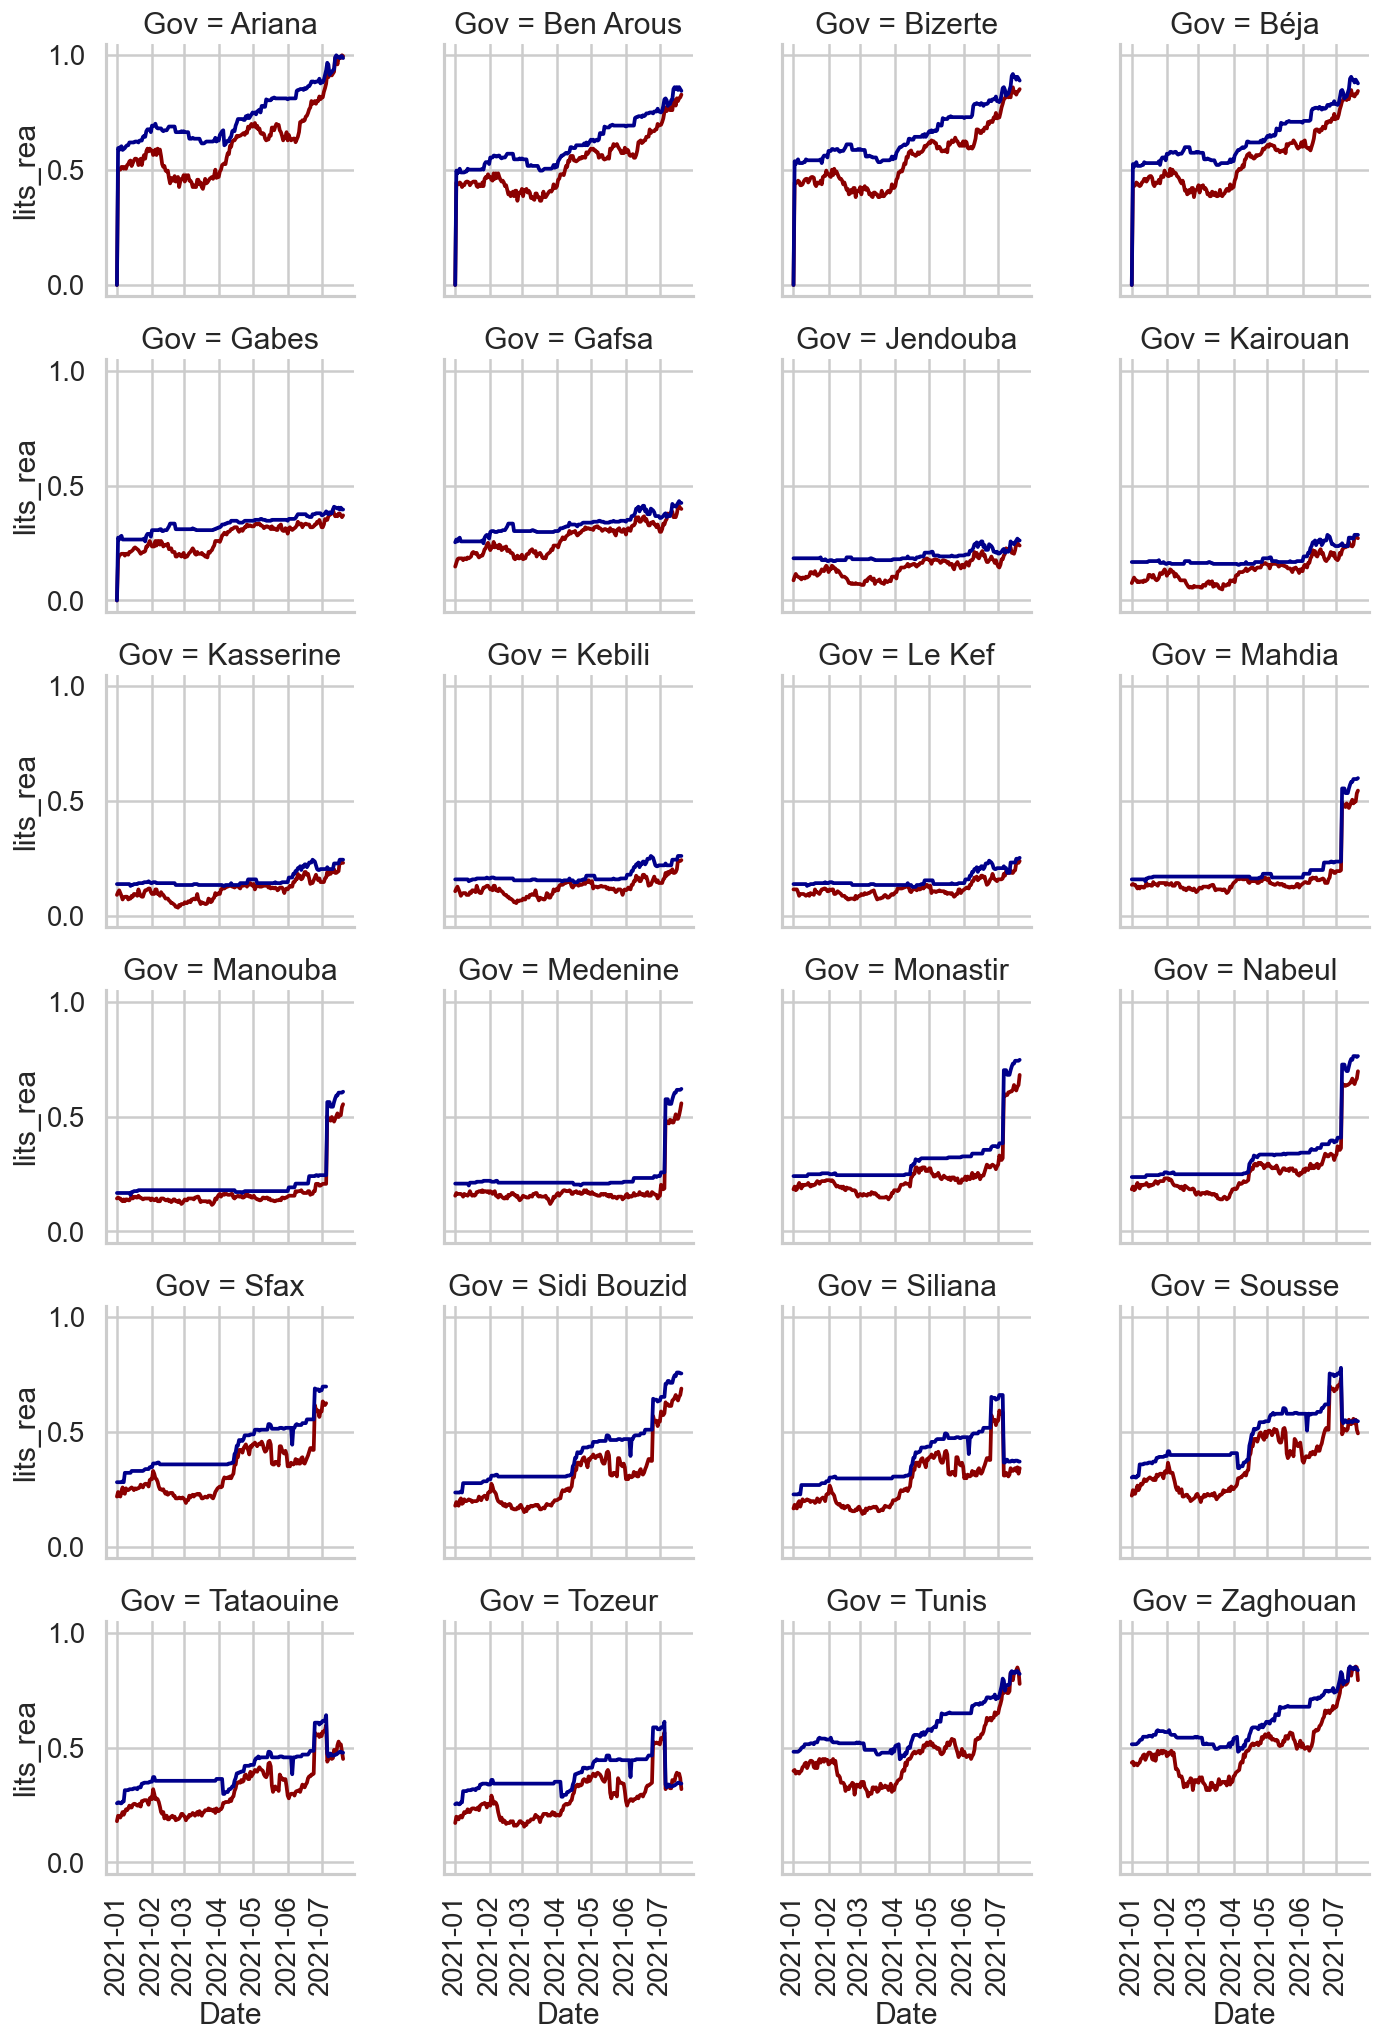

In [113]:
df_norm=df_norm.reset_index()
cond_plot = sns.FacetGrid(data=df_norm, col='Gov',col_wrap=4)

cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

In [ ]:
'''cond_plot = sns.FacetGrid(data=df_2_100, col='Gov',col_wrap=4)
cond_plot.map(sns.lineplot,'Date','lits_rea_disp', color='Darkgreen');
cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);'''

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_50, col='Gov',col_wrap=4)

#cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
#plt.subplots_adjust(top=0.9)


#cond_plot.set_xticklabels(rotation=90);

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_25, col='Gov',col_wrap=4)

#cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
#plt.subplots_adjust(top=0.9)

#cond_plot.set_xticklabels(rotation=90);

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_10, col='Gov',col_wrap=4)

#cond_plot.map(sns.lineplot,'Date','lits_rea_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_rea', color='Darkblue');
#plt.subplots_adjust(top=0.9)
#cond_plot.set_xticklabels(rotation=90);

### Evolution du nombre de lits de O2 disponibles par gouvernerat

In [ ]:
Govs = df_Reg['Gov'].drop_duplicates()

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

df_Reg_interv100_p = df_Reg[df_Reg['lits_o2'] > 100]
Govs_100_p = df_Reg_interv100_p['Gov'].drop_duplicates()
set1 = set(Govs)
set2 = set(Govs_100_p)
listGovs_100_p = set(Govs_100_p)
res_not_100_p = list(set1 - set2)

df_Reg_interv100 = df_Reg[(df_Reg['lits_o2'] <= 100) & (df_Reg['lits_o2'] > 50)]
Govs_100 = df_Reg_interv100['Gov'].drop_duplicates()
set1 = set(res_not_100_p)
set2 = set(Govs_100)
listGovs_100 = set(intersection(set1, set2))
res_not_100 = list(set1 - set2)

df_Reg_interv50 = df_Reg[(df_Reg['lits_o2'] <= 50) & (df_Reg['lits_o2'] > 25)]
Govs_50 = df_Reg_interv50['Gov'].drop_duplicates()
set1 = set(res_not_100)
set2 = set(Govs_50)
listGovs_50 = set(intersection(set1, set2))
res_not_50 = list(set1 - set2)

df_Reg_interv25 = df_Reg[(df_Reg['lits_o2'] <= 25) & (df_Reg['lits_o2'] > 10)]
Govs_25 = df_Reg_interv25['Gov'].drop_duplicates()
set1 = set(res_not_50)
set2 = set(Govs_25)
listGovs_25 = set(intersection(set1, set2))
res_not_25 = list(set1 - set2)

df_Reg_interv10 = df_Reg[df_Reg['lits_o2'] <= 10]
Govs_10 = df_Reg_interv10['Gov'].drop_duplicates()
set1 = set(res_not_25)
set2 = set(Govs_10)
listGovs_10 = set(intersection(set1, set2))


df_Reg_100_p = df_Reg[df_Reg['Gov'].isin(listGovs_100_p)]
df_Reg_100 = df_Reg[df_Reg['Gov'].isin(listGovs_100)]
df_Reg_50 = df_Reg[df_Reg['Gov'].isin(listGovs_50)]
df_Reg_25 = df_Reg[df_Reg['Gov'].isin(listGovs_25)]
df_Reg_10 = df_Reg[df_Reg['Gov'].isin(listGovs_10)]

#NOT en cas de necessite de drop
#not_df_Reg_100_p = df_Reg[~df_Reg['Gov'].isin(listGovs_100_p)]

df_Reg_10.Gov

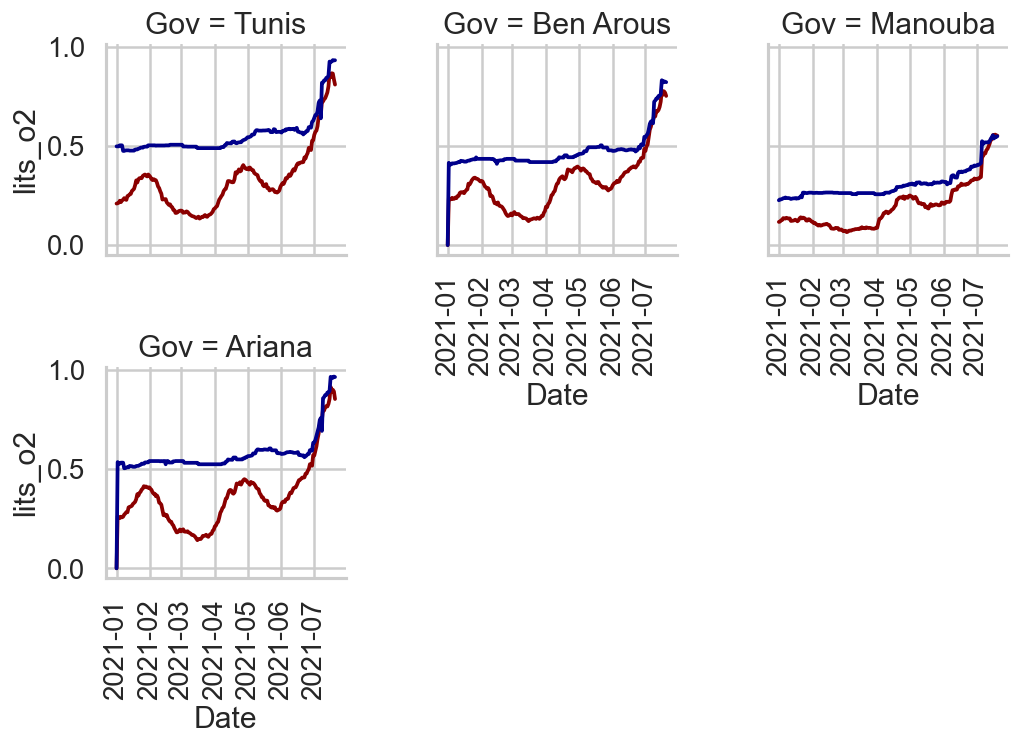

In [114]:
#df_t1=df_norm[df_norm.Gov=='Tunis']
#df_t2=df_norm[df_norm.Gov=='Ben Arous']
#df_t3=df_norm[df_norm.Gov=='Manouba']
#df_t4=df_norm[df_norm.Gov=='Ariana']
#df_tunis=pd.DataFrame()
#df_tunis=df_tunis.append(df_t1)
#df_tunis=df_tunis.append(df_t2)
#df_tunis=df_tunis.append(df_t3)
#df_tunis=df_tunis.append(df_t4)
cond_plot = sns.FacetGrid(data=df_tunis, col='Gov',col_wrap=3)

cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

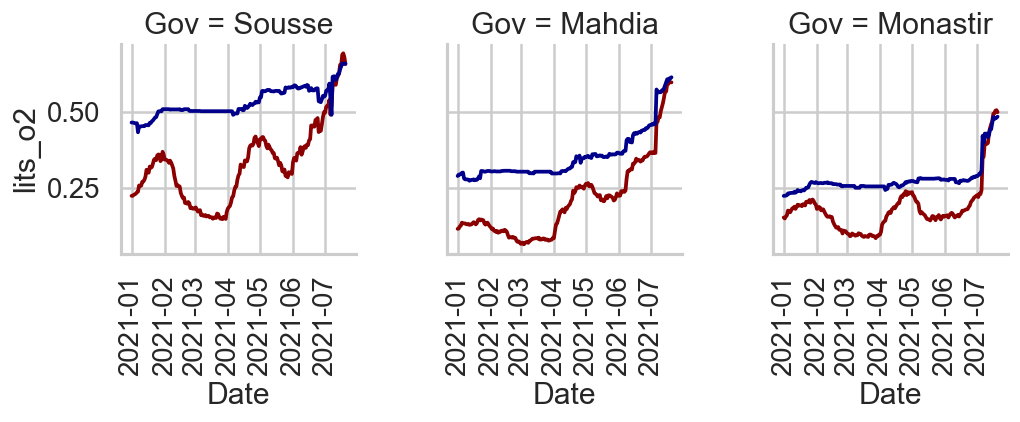

In [115]:
#df_s1=df_norm[df_norm.Gov=='Sousse']
#df_s2=df_norm[df_norm.Gov=='Mahdia']
#df_s3=df_norm[df_norm.Gov=='Monastir']
#df_sahel=pd.DataFrame()
#df_sahel=df_sahel.append(df_s1)
#df_sahel=df_sahel.append(df_s2)
#df_sahel=df_sahel.append(df_s3)
cond_plot = sns.FacetGrid(data=df_sahel, col='Gov',col_wrap=3)

cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

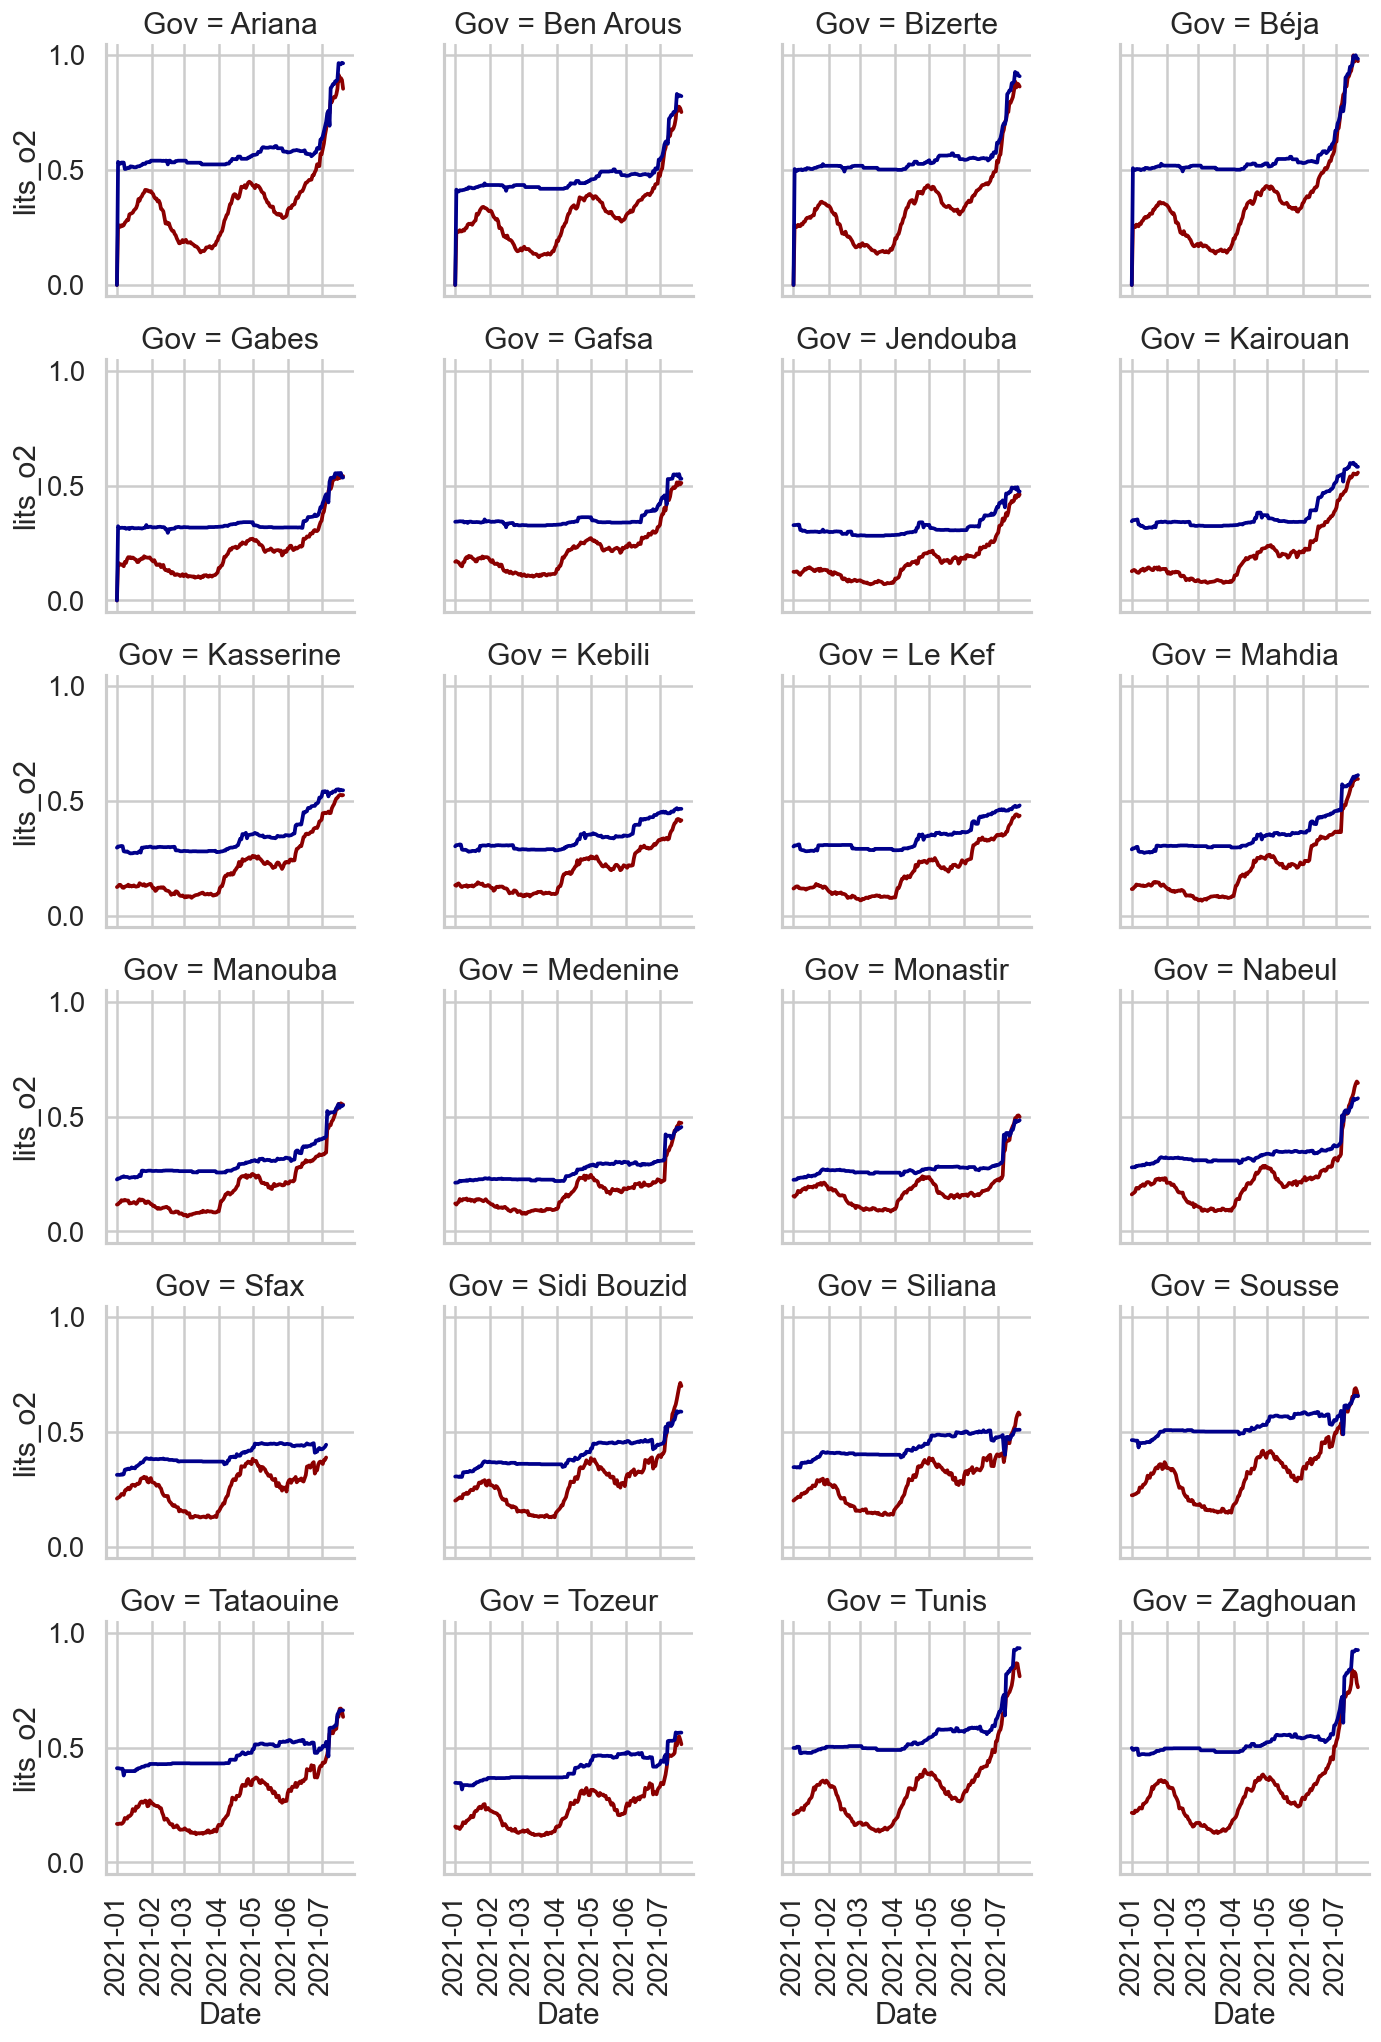

In [116]:
cond_plot = sns.FacetGrid(data=df_norm, col='Gov',col_wrap=4)
cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
plt.subplots_adjust(top=0.9)
cond_plot.set_xticklabels(rotation=90);

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_50, col='Gov',col_wrap=4)

#cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
#plt.subplots_adjust(top=0.9)


#cond_plot.set_xticklabels(rotation=90);

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_100, col='Gov',col_wrap=4)
#cond_plot.map(sns.lineplot,'Date','lits_o2_disp', color='Darkgreen');
#cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
#plt.subplots_adjust(top=0.9)
#cond_plot.set_xticklabels(rotation=90);

In [ ]:
#cond_plot = sns.FacetGrid(data=df_2_25_test, col='Gov',col_wrap=4)

#cond_plot.map(sns.lineplot,'Date','lits_o2_occ', color='Darkred');
#cond_plot.map(sns.lineplot,'Date','lits_o2', color='Darkblue');
#plt.subplots_adjust(top=0.9)
#cond_plot.set_xticklabels(rotation=90);